In [1]:
import numpy as np
import pandas as pd
import polars as pl
import sys
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

pd.set_option('display.max_columns',None)
import psycopg2


#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
import pandas as pd
df = pd.read_excel("~/Downloads/Haplo_SNPs_Unique.xlsx")
df['ALT'] = df['ALT'].str.split(',')
df = df.explode('ALT')
df = df.drop_duplicates(subset=['CHROM', 'POS', 'REF', 'ALT'])
vcf = pd.read_csv("/run/media/administrator/Expansion1/azure_backup/final_vcf/s3_uploaded_snps/1721_samples/PRX/Pharmacogenomics/PGx_Genes_Variants_DP15/{}_final_DP.vcf".format(sys.argv[1], sys.argv[1]), comment= '#', sep = '\t', header=None, low_memory=False)
vcf.columns = ['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
vcf['DP'] = vcf['SAMPLE'].str.split(':').str[3].fillna('0').astype(int)
vcf['HET'] = vcf['INFO'].str.extract(r'HET=(\d)')
vcf['HOM'] = vcf['INFO'].str.extract(r'HOM=(\d)')
# Create a new column 'Zygosity' based on conditions
vcf['Zygosity'] = ''
vcf.loc[vcf['HOM'] == '1', 'Zygosity'] = 'Homozygous'
vcf.loc[vcf['HET'] == '1', 'Zygosity'] = 'Heterozygous'
vcf.drop(columns=['HET', 'HOM'], inplace=True)
common = pd.merge(vcf, df, on = ['CHROM', 'POS', 'REF', 'ALT'], how = 'inner', sort = False)
common.to_excel("/run/media/administrator/Expansion1/azure_backup/final_vcf/s3_uploaded_snps/1721_samples/PRX/Pharmacogenomics/PGx_Genes_Key_Variants/Cond3_All_Star_Alleles/new_distance_files_mul_pos/{}_snp.xlsx".format(sys.argv[1], sys.argv[1]), index = False)
common

In [10]:
import pandas as pd
df = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Haplo_SNPs_Unique.xlsx')
df['ALT'] = df['ALT'].str.split(',')
df = df.explode('ALT')
df = df.drop_duplicates(subset=['CHROM', 'POS', 'REF', 'ALT'])
df

Covered/Not_Covered  CHROM        POS     Gene      Variant REF ALT
0               Covered   chr7  117587806     CFTR   rs75527207   G   A
1               Covered   chr7  117606695     CFTR  rs141033578   C   T
1               Covered   chr7  117606695     CFTR  rs141033578   C   G
2               Covered   chr7  117611650     CFTR   rs78769542   G   A
2               Covered   chr7  117611650     CFTR   rs78769542   G   C
..                  ...    ...        ...      ...          ...  ..  ..
141             Covered  chr21   45537880  SLC19A1    rs1051266   T   C
142             Covered   chr7   99763843   CYP3A4    rs2242480   C   T
143             Covered   chr7  117614699     CFTR   rs75541969   G   C
144             Covered   chr7  117642528     CFTR   rs11971167   G   A
144             Covered   chr7  117642528     CFTR   rs11971167   G   T

[215 rows x 7 columns]

In [11]:
vcf = pd.read_csv(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/KHAIGPRX1_final.vcf', comment= '#', sep = '\t', header=None, low_memory=False)
vcf.columns = ['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
vcf

CHROM       POS         rsID REF ALT QUAL FILTER  \
0      chr1     14752   rs17855866   G   A    .   PASS   
1      chr1     14907    rs6682375   A   G    .   PASS   
2      chr1     14930    rs6682385   A   G    .   PASS   
3      chr1     14933  rs199856693   G   A    .   PASS   
4      chr1     14976   rs71252251   G   A    .   PASS   
...     ...       ...          ...  ..  ..  ...    ...   
60484  chrY  57208367            .   A   G    .   PASS   
60485  chrY  57208553            .   G   A    .   PASS   
60486  chrY  57209591            .   A   G    .   PASS   
60487  chrY  57209806            .   G   A    .   PASS   
60488  chrY  57211636            .   G   A    .   PASS   

                                                    INFO  \
0      ADP=62;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...   
1      ADP=31;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...   
2      ADP=27;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.5178,0....   
3      ADP=28;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9716,0....   
4      ADP=26;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=WASH...   
...                                                  ...   
60484  ADP=20;WT=0;HET=0;HOM=1;NC=0;CSQ=G|intron_vari...   
60485  ADP=22;WT=0;HET=1;HOM=0;NC=0;CSQ=A|non_coding_...   
60486  ADP=18;WT=0;HET=1;HOM=0;NC=0;CSQ=G|non_coding_...   
60487  ADP=13;WT=0;HET=0;HOM=1;NC=0;CSQ=A|splice_poly...   
60488  ADP=28;WT=0;HET=0;HOM=1;NC=0;CSQ=A|intron_vari...   

                                                  FORMAT  \
0      GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
1      GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
2      GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
3      GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
4      GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
...                                                  ...   
60484  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
60485  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
60486  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
60487  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
60488  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   

                                                  SAMPLE  
0      0/1:60:62:62:44:18:29.03%:9.0099E-7:54:54:32:1...  
1      0/1:64:31:31:14:17:54.84%:3.5853E-7:51:53:7:7:...  
2      0/1:79:27:27:8:19:70.37%:1.2089E-8:54:55:4:4:15:4  
3       0/1:26:28:28:20:8:28.57%:2.188E-3:52:54:12:8:7:1  
4       0/1:26:26:26:18:8:30.77%:2.076E-3:55:39:10:8:4:4  
...                                                  ...  
60484      1/1:64:20:20:5:15:75%:3.8543E-7:47:47:2:3:6:9  
60485  0/1:35:22:22:12:10:45.45%:2.6061E-4:52:46:12:0...  
60486   0/1:28:18:18:10:8:44.44%:1.4461E-3:45:60:6:4:7:1  
60487     1/1:70:13:13:0:13:100%:9.6148E-8:0:48:0:0:11:2  
60488  1/1:132:28:28:2:26:92.86%:5.6872E-14:37:45:0:2...  

[60489 rows x 10 columns]

In [12]:
vcf['DP'] = vcf['SAMPLE'].str.split(':').str[3].fillna('0').astype(int)
vcf['HET'] = vcf['INFO'].str.extract(r'HET=(\d)')
vcf['HOM'] = vcf['INFO'].str.extract(r'HOM=(\d)')

# Create a new column 'Zygosity' based on conditions
vcf['Zygosity'] = ''

vcf.loc[vcf['HOM'] == '1', 'Zygosity'] = 'Homozygous'
vcf.loc[vcf['HET'] == '1', 'Zygosity'] = 'Heterozygous'
vcf.drop(columns=['HET', 'HOM'], inplace=True)
vcf

CHROM       POS         rsID REF ALT QUAL FILTER  \
0      chr1     14752   rs17855866   G   A    .   PASS   
1      chr1     14907    rs6682375   A   G    .   PASS   
2      chr1     14930    rs6682385   A   G    .   PASS   
3      chr1     14933  rs199856693   G   A    .   PASS   
4      chr1     14976   rs71252251   G   A    .   PASS   
...     ...       ...          ...  ..  ..  ...    ...   
60484  chrY  57208367            .   A   G    .   PASS   
60485  chrY  57208553            .   G   A    .   PASS   
60486  chrY  57209591            .   A   G    .   PASS   
60487  chrY  57209806            .   G   A    .   PASS   
60488  chrY  57211636            .   G   A    .   PASS   

                                                    INFO  \
0      ADP=62;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...   
1      ADP=31;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=DDX1...   
2      ADP=27;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.5178,0....   
3      ADP=28;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.9716,0....   
4      ADP=26;WT=0;HET=1;HOM=0;NC=0;ASP;GENEINFO=WASH...   
...                                                  ...   
60484  ADP=20;WT=0;HET=0;HOM=1;NC=0;CSQ=G|intron_vari...   
60485  ADP=22;WT=0;HET=1;HOM=0;NC=0;CSQ=A|non_coding_...   
60486  ADP=18;WT=0;HET=1;HOM=0;NC=0;CSQ=G|non_coding_...   
60487  ADP=13;WT=0;HET=0;HOM=1;NC=0;CSQ=A|splice_poly...   
60488  ADP=28;WT=0;HET=0;HOM=1;NC=0;CSQ=A|intron_vari...   

                                                  FORMAT  \
0      GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
1      GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
2      GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
3      GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
4      GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
...                                                  ...   
60484  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
60485  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
60486  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
60487  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
60488  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   

                                                  SAMPLE  DP      Zygosity  
0      0/1:60:62:62:44:18:29.03%:9.0099E-7:54:54:32:1...  62  Heterozygous  
1      0/1:64:31:31:14:17:54.84%:3.5853E-7:51:53:7:7:...  31  Heterozygous  
2      0/1:79:27:27:8:19:70.37%:1.2089E-8:54:55:4:4:15:4  27  Heterozygous  
3       0/1:26:28:28:20:8:28.57%:2.188E-3:52:54:12:8:7:1  28  Heterozygous  
4       0/1:26:26:26:18:8:30.77%:2.076E-3:55:39:10:8:4:4  26  Heterozygous  
...                                                  ...  ..           ...  
60484      1/1:64:20:20:5:15:75%:3.8543E-7:47:47:2:3:6:9  20    Homozygous  
60485  0/1:35:22:22:12:10:45.45%:2.6061E-4:52:46:12:0...  22  Heterozygous  
60486   0/1:28:18:18:10:8:44.44%:1.4461E-3:45:60:6:4:7:1  18  Heterozygous  
60487     1/1:70:13:13:0:13:100%:9.6148E-8:0:48:0:0:11:2  13    Homozygous  
60488  1/1:132:28:28:2:26:92.86%:5.6872E-14:37:45:0:2...  28    Homozygous  

[60489 rows x 12 columns]

In [13]:
common = pd.merge(vcf, df, on = ['CHROM', 'POS', 'REF', 'ALT'], how = 'inner', sort = False)
common

CHROM        POS        rsID REF ALT QUAL FILTER  \
0   chr1   97883329   rs1801265   A   G    .   PASS   
1   chr1  161544752    rs396991   A   C    .   PASS   
2  chr16   31091000      rs7294   C   T    .   PASS   
3  chr16   31092475   rs2359612   A   G    .   PASS   
4  chr19   39244283  rs11881222   A   G    .   PASS   
5  chr19   39248147  rs12979860   C   T    .   PASS   
6  chr19   39252525   rs8099917   T   G    .   PASS   
7  chr19   43551574     rs25487   T   C    .   PASS   
8   chr2  166053034   rs3812718   C   T    .   PASS   
9   chr7   99763843   rs2242480   C   T    .   PASS   

                                                INFO  \
0  ADP=11;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.2602,0....   
1  ADP=50;WT=0;HET=1;HOM=0;NC=0;ASP;G5;GENEINFO=F...   
2  ADP=17;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5803,0....   
3  ADP=14;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3904,0....   
4  ADP=36;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.7488,0....   
5  ADP=42;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.6442,0....   
6  ADP=13;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.8688,0....   
7  ADP=15;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.2604,0....   
8  ADP=19;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.5066,0....   
9  ADP=26;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5783,0....   

                                              FORMAT  \
0  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
1  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
2  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
3  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
4  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
5  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
6  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
7  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
8  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
9  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   

                                              SAMPLE  DP      Zygosity  \
0     0/1:27:11:11:4:7:63.64%:1.935E-3:61:60:3:1:5:2  11  Heterozygous   
1  0/1:92:50:50:25:25:50%:5.2124E-10:49:54:20:5:24:1  50  Heterozygous   
2    1/1:93:17:17:0:17:100%:4.2852E-10:0:46:0:0:10:7  17    Homozygous   
3      1/1:76:14:14:0:14:100%:2.4927E-8:0:50:0:0:8:6  14    Homozygous   
4  0/1:86:36:36:14:22:61.11%:2.1194E-9:41:40:10:4...  36  Heterozygous   
5   0/1:77:42:42:21:21:50%:1.6451E-8:59:44:16:5:15:6  42  Heterozygous   
6    0/1:21:13:13:7:6:46.15%:7.4534E-3:52:66:6:1:5:1  13  Heterozygous   
7     1/1:81:15:15:0:15:100%:6.4467E-9:0:64:0:0:13:2  15    Homozygous   
8  0/1:53:19:19:6:13:68.42%:5.0106E-6:61:59:6:0:10:3  19  Heterozygous   
9   1/1:146:26:26:0:26:100%:2.0165E-15:0:49:0:0:21:5  26    Homozygous   

  Covered/Not_Covered         Gene     Variant  
0             Covered         DPYD   rs1801265  
1             Covered       FCGR3A    rs396991  
2             Covered       VKORC1      rs7294  
3             Covered       VKORC1   rs2359612  
4             Covered        IFNL3  rs11881222  
5             Covered  IFNL3;IFNL4  rs12979860  
6             Covered        IFNL3   rs8099917  
7             Covered        XRCC1     rs25487  
8             Covered        SCN1A   rs3812718  
9             Covered       CYP3A4   rs2242480

In [14]:
common.Zygosity.value_counts(dropna=False)

Heterozygous    6
Homozygous      4
Name: Zygosity, dtype: int64

In [15]:
common["Gene_new"] = common["INFO"].str.extract('GENEINFO=(?P<GENEINFO>.+?);')
common['Gene_new'] = common['Gene_new'].apply(lambda x: ','.join(set([segment.split(':')[0] for segment in x.split('|')])) if pd.notnull(x) else '')
common

CHROM        POS        rsID REF ALT QUAL FILTER  \
0   chr1   97883329   rs1801265   A   G    .   PASS   
1   chr1  161544752    rs396991   A   C    .   PASS   
2  chr16   31091000      rs7294   C   T    .   PASS   
3  chr16   31092475   rs2359612   A   G    .   PASS   
4  chr19   39244283  rs11881222   A   G    .   PASS   
5  chr19   39248147  rs12979860   C   T    .   PASS   
6  chr19   39252525   rs8099917   T   G    .   PASS   
7  chr19   43551574     rs25487   T   C    .   PASS   
8   chr2  166053034   rs3812718   C   T    .   PASS   
9   chr7   99763843   rs2242480   C   T    .   PASS   

                                                INFO  \
0  ADP=11;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.2602,0....   
1  ADP=50;WT=0;HET=1;HOM=0;NC=0;ASP;G5;GENEINFO=F...   
2  ADP=17;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5803,0....   
3  ADP=14;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.3904,0....   
4  ADP=36;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.7488,0....   
5  ADP=42;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.6442,0....   
6  ADP=13;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.8688,0....   
7  ADP=15;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.2604,0....   
8  ADP=19;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.5066,0....   
9  ADP=26;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5783,0....   

                                              FORMAT  \
0  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
1  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
2  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
3  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
4  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
5  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
6  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
7  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
8  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
9  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   

                                              SAMPLE  DP      Zygosity  \
0     0/1:27:11:11:4:7:63.64%:1.935E-3:61:60:3:1:5:2  11  Heterozygous   
1  0/1:92:50:50:25:25:50%:5.2124E-10:49:54:20:5:24:1  50  Heterozygous   
2    1/1:93:17:17:0:17:100%:4.2852E-10:0:46:0:0:10:7  17    Homozygous   
3      1/1:76:14:14:0:14:100%:2.4927E-8:0:50:0:0:8:6  14    Homozygous   
4  0/1:86:36:36:14:22:61.11%:2.1194E-9:41:40:10:4...  36  Heterozygous   
5   0/1:77:42:42:21:21:50%:1.6451E-8:59:44:16:5:15:6  42  Heterozygous   
6    0/1:21:13:13:7:6:46.15%:7.4534E-3:52:66:6:1:5:1  13  Heterozygous   
7     1/1:81:15:15:0:15:100%:6.4467E-9:0:64:0:0:13:2  15    Homozygous   
8  0/1:53:19:19:6:13:68.42%:5.0106E-6:61:59:6:0:10:3  19  Heterozygous   
9   1/1:146:26:26:0:26:100%:2.0165E-15:0:49:0:0:21:5  26    Homozygous   

  Covered/Not_Covered         Gene     Variant       Gene_new  
0             Covered         DPYD   rs1801265           DPYD  
1             Covered       FCGR3A    rs396991         FCGR3A  
2             Covered       VKORC1      rs7294  PRSS53,VKORC1  
3             Covered       VKORC1   rs2359612         VKORC1  
4             Covered        IFNL3  rs11881222          IFNL3  
5             Covered  IFNL3;IFNL4  rs12979860          IFNL4  
6             Covered        IFNL3   rs8099917                 
7             Covered        XRCC1     rs25487          XRCC1  
8             Covered        SCN1A   rs3812718          SCN1A  
9             Covered       CYP3A4   rs2242480         CYP3A4

In [16]:
DP_filter = common[common['DP'] >= 15]
DP_filter

CHROM        POS        rsID REF ALT QUAL FILTER  \
1   chr1  161544752    rs396991   A   C    .   PASS   
2  chr16   31091000      rs7294   C   T    .   PASS   
4  chr19   39244283  rs11881222   A   G    .   PASS   
5  chr19   39248147  rs12979860   C   T    .   PASS   
7  chr19   43551574     rs25487   T   C    .   PASS   
8   chr2  166053034   rs3812718   C   T    .   PASS   
9   chr7   99763843   rs2242480   C   T    .   PASS   

                                                INFO  \
1  ADP=50;WT=0;HET=1;HOM=0;NC=0;ASP;G5;GENEINFO=F...   
2  ADP=17;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5803,0....   
4  ADP=36;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.7488,0....   
5  ADP=42;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.6442,0....   
7  ADP=15;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.2604,0....   
8  ADP=19;WT=0;HET=1;HOM=0;NC=0;ASP;CAF=0.5066,0....   
9  ADP=26;WT=0;HET=0;HOM=1;NC=0;ASP;CAF=0.5783,0....   

                                              FORMAT  \
1  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
2  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
4  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
5  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
7  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
8  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   
9  GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:A...   

                                              SAMPLE  DP      Zygosity  \
1  0/1:92:50:50:25:25:50%:5.2124E-10:49:54:20:5:24:1  50  Heterozygous   
2    1/1:93:17:17:0:17:100%:4.2852E-10:0:46:0:0:10:7  17    Homozygous   
4  0/1:86:36:36:14:22:61.11%:2.1194E-9:41:40:10:4...  36  Heterozygous   
5   0/1:77:42:42:21:21:50%:1.6451E-8:59:44:16:5:15:6  42  Heterozygous   
7     1/1:81:15:15:0:15:100%:6.4467E-9:0:64:0:0:13:2  15    Homozygous   
8  0/1:53:19:19:6:13:68.42%:5.0106E-6:61:59:6:0:10:3  19  Heterozygous   
9   1/1:146:26:26:0:26:100%:2.0165E-15:0:49:0:0:21:5  26    Homozygous   

  Covered/Not_Covered         Gene     Variant       Gene_new  
1             Covered       FCGR3A    rs396991         FCGR3A  
2             Covered       VKORC1      rs7294  PRSS53,VKORC1  
4             Covered        IFNL3  rs11881222          IFNL3  
5             Covered  IFNL3;IFNL4  rs12979860          IFNL4  
7             Covered        XRCC1     rs25487          XRCC1  
8             Covered        SCN1A   rs3812718          SCN1A  
9             Covered       CYP3A4   rs2242480         CYP3A4

In [17]:
DP_filter['Zygosity'].value_counts(dropna=False)

Heterozygous    4
Homozygous      3
Name: Zygosity, dtype: int64

In [25]:
df = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/All_1232_snps_updated_26_12_2023.xlsx')
df['CSQ'] = df['INFO'].str.extract(r'CSQ=(.*)')
df['Gene_new'] = df['CSQ'].str.split('|').str[3]
df['Gene'].fillna(df['Gene_new'], inplace=True)
df_new = df[['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'DP', 'Zygosity', 'Gene', 'Sample']]
df_new

CHROM       POS        rsID REF ALT   DP      Zygosity     Gene  \
0      chr8  18400581  rs79050330   C   T   47  Heterozygous     NAT2   
1     chr10  94775367  rs12769205   A   G  298  Heterozygous  CYP2C19   
2     chr10  94781859   rs4244285   G   A  243  Heterozygous  CYP2C19   
3      chr7  99672916    rs776746   T   C  102    Homozygous   CYP3A5   
4     chr10  94761900  rs12248560   C   T   33  Heterozygous  CYP2C19   
...     ...       ...         ...  ..  ..  ...           ...      ...   
2586  chr10  94781859   rs4244285   G   A   16  Heterozygous  CYP2C19   
2587  chr10  94981296   rs1057910   A   C   23  Heterozygous   CYP2C9   
2588  chr10  94775367  rs12769205   A   G   39    Homozygous  CYP2C19   
2589  chr10  94775367  rs12769205   A   G   65    Homozygous  CYP2C19   
2590   chr7  99672916    rs776746   T   C   11  Heterozygous   CYP3A5   

            Sample  
0        KHAIGPRX9  
1       KHAIGPRX99  
2       KHAIGPRX99  
3       KHAIGPRX99  
4      KHAIGPRX999  
...            ...  
2586  KHAIGPRX1005  
2587  KHAIGPRX1005  
2588  KHAIGPRX1002  
2589  KHAIGPRX1001  
2590  KHAIGPRX1000  

[2591 rows x 9 columns]

In [26]:
# Group by specified columns and aggregate using a dictionary
agg_dict = {'Sample': lambda x: ','.join(x.unique()),
            'DP': 'mean'}

result_df = df_new.groupby(['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'Zygosity', 'Gene']).agg(agg_dict).reset_index()
result_df['Sample_count'] = result_df['Sample'].apply(lambda x: len(x.split(',')))

# Print the result
result_df

CHROM       POS        rsID REF ALT      Zygosity     Gene  \
0   chr10  94761900  rs12248560   C   T  Heterozygous  CYP2C19   
1   chr10  94761900  rs12248560   C   T    Homozygous  CYP2C19   
2   chr10  94775367  rs12769205   A   G  Heterozygous  CYP2C19   
3   chr10  94775367  rs12769205   A   G    Homozygous  CYP2C19   
4   chr10  94780653   rs4986893   G   A  Heterozygous  CYP2C19   
5   chr10  94781859   rs4244285   G   A  Heterozygous  CYP2C19   
6   chr10  94781859   rs4244285   G   A    Homozygous  CYP2C19   
7   chr10  94981296   rs1057910   A   C  Heterozygous   CYP2C9   
8   chr10  94981296   rs1057910   A   C    Homozygous   CYP2C9   
9   chr12  21178615   rs4149056   T   C  Heterozygous  SLCO1B1   
10  chr12  21178615   rs4149056   T   C    Homozygous  SLCO1B1   
11  chr22  42127856   rs5030867   T   G  Heterozygous   CYP2D6   
12  chr22  42127856   rs5030867   T   G    Homozygous   CYP2D6   
13   chr7  99665212  rs10264272   C   T  Heterozygous   CYP3A5   
14   chr7  99672916    rs776746   T   C  Heterozygous   CYP3A5   
15   chr7  99672916    rs776746   T   C    Homozygous   CYP3A5   
16   chr8  18400581  rs79050330   C   T  Heterozygous     NAT2   

                                               Sample         DP  Sample_count  
0   KHAIGPRX999,KHAIGPRX996,KHAIGPRX995,KHAIGPRX99...  46.799283           279  
1   KHAIGPRX947,KHAIGPRX912,KHAIGPRX870,KHAIGPRX85...  36.500000            36  
2   KHAIGPRX99,KHAIGPRX997,KHAIGPRX996,KHAIGPRX989...  71.362816           554  
3   KHAIGPRX990,KHAIGPRX98,KHAIGPRX981,KHAIGPRX976...  77.731579           190  
4   KHAIGPRX445,KHAIGPRX439,KHAIGPRX401,KHAIGPRX32...  44.333333             6  
5   KHAIGPRX99,KHAIGPRX997,KHAIGPRX989,KHAIGPRX986...  48.354839           434  
6   KHAIGPRX935,KHAIGPRX911,KHAIGPRX910,KHAIGPRX85...  50.552632            38  
7   KHAIGPRX994,KHAIGPRX991,KHAIGPRX989,KHAIGPRX96...  61.909091           198  
8   KHAIGPRX942,KHAIGPRX803,KHAIGPRX795,KHAIGPRX46...  68.625000             8  
9   KHAIGPRX972,KHAIGPRX965,KHAIGPRX953_RS,KHAIGPR...  39.848214           112  
10  KHAIGPRX95,KHAIGPRX866,KHAIGPRX555,KHAIGPRX414...  53.375000             8  
11  KHAIGPRX98,KHAIGPRX883,KHAIGPRX881,KHAIGPRX785...  29.500000             8  
12                KHAIGPRX886,KHAIGPRX297,KHAIGPRX290  18.333333             3  
13                                        KHAIGPRX136  39.000000             1  
14  KHAIGPRX994,KHAIGPRX993,KHAIGPRX990,KHAIGPRX98...  22.345763           295  
15  KHAIGPRX99,KHAIGPRX997,KHAIGPRX992,KHAIGPRX98,...  19.639225           413  
16  KHAIGPRX9,KHAIGPRX743,KHAIGPRX609,KHAIGPRX15,K...  53.875000             8

In [27]:
result_df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Snp_counts_new_variants_26_12_2023.xlsx', index=False)

In [28]:
result_df.Sample_count.sum()

2591

In [29]:
df_DP = df_new[df_new['DP'] >= 15]
df_DP

CHROM       POS        rsID REF ALT   DP      Zygosity     Gene  \
0      chr8  18400581  rs79050330   C   T   47  Heterozygous     NAT2   
1     chr10  94775367  rs12769205   A   G  298  Heterozygous  CYP2C19   
2     chr10  94781859   rs4244285   G   A  243  Heterozygous  CYP2C19   
3      chr7  99672916    rs776746   T   C  102    Homozygous   CYP3A5   
4     chr10  94761900  rs12248560   C   T   33  Heterozygous  CYP2C19   
...     ...       ...         ...  ..  ..  ...           ...      ...   
2585  chr10  94775367  rs12769205   A   G   29  Heterozygous  CYP2C19   
2586  chr10  94781859   rs4244285   G   A   16  Heterozygous  CYP2C19   
2587  chr10  94981296   rs1057910   A   C   23  Heterozygous   CYP2C9   
2588  chr10  94775367  rs12769205   A   G   39    Homozygous  CYP2C19   
2589  chr10  94775367  rs12769205   A   G   65    Homozygous  CYP2C19   

            Sample  
0        KHAIGPRX9  
1       KHAIGPRX99  
2       KHAIGPRX99  
3       KHAIGPRX99  
4      KHAIGPRX999  
...            ...  
2585  KHAIGPRX1005  
2586  KHAIGPRX1005  
2587  KHAIGPRX1005  
2588  KHAIGPRX1002  
2589  KHAIGPRX1001  

[2363 rows x 9 columns]

In [30]:
# Group by specified columns and aggregate using a dictionary
agg_dict = {'Sample': lambda x: ','.join(x.unique()),
            'DP': 'mean'}

result_df_DP = df_DP.groupby(['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'Zygosity', 'Gene']).agg(agg_dict).reset_index()
result_df_DP['Sample_count'] = result_df_DP['Sample'].apply(lambda x: len(x.split(',')))

# Print the result
result_df_DP

CHROM       POS        rsID REF ALT      Zygosity     Gene  \
0   chr10  94761900  rs12248560   C   T  Heterozygous  CYP2C19   
1   chr10  94761900  rs12248560   C   T    Homozygous  CYP2C19   
2   chr10  94775367  rs12769205   A   G  Heterozygous  CYP2C19   
3   chr10  94775367  rs12769205   A   G    Homozygous  CYP2C19   
4   chr10  94780653   rs4986893   G   A  Heterozygous  CYP2C19   
5   chr10  94781859   rs4244285   G   A  Heterozygous  CYP2C19   
6   chr10  94781859   rs4244285   G   A    Homozygous  CYP2C19   
7   chr10  94981296   rs1057910   A   C  Heterozygous   CYP2C9   
8   chr10  94981296   rs1057910   A   C    Homozygous   CYP2C9   
9   chr12  21178615   rs4149056   T   C  Heterozygous  SLCO1B1   
10  chr12  21178615   rs4149056   T   C    Homozygous  SLCO1B1   
11  chr22  42127856   rs5030867   T   G  Heterozygous   CYP2D6   
12  chr22  42127856   rs5030867   T   G    Homozygous   CYP2D6   
13   chr7  99665212  rs10264272   C   T  Heterozygous   CYP3A5   
14   chr7  99672916    rs776746   T   C  Heterozygous   CYP3A5   
15   chr7  99672916    rs776746   T   C    Homozygous   CYP3A5   
16   chr8  18400581  rs79050330   C   T  Heterozygous     NAT2   

                                               Sample         DP  Sample_count  
0   KHAIGPRX999,KHAIGPRX996,KHAIGPRX995,KHAIGPRX99...  47.163043           276  
1   KHAIGPRX947,KHAIGPRX912,KHAIGPRX870,KHAIGPRX85...  41.500000            30  
2   KHAIGPRX99,KHAIGPRX997,KHAIGPRX996,KHAIGPRX989...  71.362816           554  
3   KHAIGPRX990,KHAIGPRX98,KHAIGPRX981,KHAIGPRX976...  77.731579           190  
4   KHAIGPRX445,KHAIGPRX439,KHAIGPRX401,KHAIGPRX32...  44.333333             6  
5   KHAIGPRX99,KHAIGPRX997,KHAIGPRX989,KHAIGPRX986...  49.035211           426  
6   KHAIGPRX935,KHAIGPRX855,KHAIGPRX81,KHAIGPRX818...  55.294118            34  
7   KHAIGPRX994,KHAIGPRX991,KHAIGPRX989,KHAIGPRX96...  61.909091           198  
8   KHAIGPRX942,KHAIGPRX803,KHAIGPRX795,KHAIGPRX46...  68.625000             8  
9   KHAIGPRX972,KHAIGPRX965,KHAIGPRX953_RS,KHAIGPR...  39.848214           112  
10  KHAIGPRX95,KHAIGPRX414,KHAIGPRX409,KHAIGPRX122...  68.333333             6  
11  KHAIGPRX98,KHAIGPRX883,KHAIGPRX881,KHAIGPRX301...  35.333333             6  
12                                        KHAIGPRX297  33.000000             1  
13                                        KHAIGPRX136  39.000000             1  
14  KHAIGPRX994,KHAIGPRX990,KHAIGPRX982,KHAIGPRX97...  24.516529           242  
15  KHAIGPRX99,KHAIGPRX98,KHAIGPRX96,KHAIGPRX95,KH...  24.516981           265  
16  KHAIGPRX9,KHAIGPRX743,KHAIGPRX609,KHAIGPRX15,K...  53.875000             8

In [31]:
result_df_DP.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Snp_counts_DP_15_new_variants_26_12_2023.xlsx', index=False)

In [32]:
result_df_DP.Sample_count.sum()

2363

In [33]:
15713 - 14801

912

# Haplo and Diplotype and Metabolizer

In [ ]:
# Function to generate combinations
def get_combinations(group):
    return list(combinations_with_replacement(group, 2))

# Apply the function to each group of rsID
result = df.groupby('Gene')['Haplotype'].apply(get_combinations).explode().reset_index(name='Diplotype')

# Extract the relevant portions of the haplotypes and keep the asterisk (*)
result['Diplotype'] = result['Diplotype'].apply(lambda x: '/'.join([hap.replace(hap.split('*')[0], '') if len(hap.split('*')) > 1 else hap for hap in x]))

# Filter out reversed combinations
result = result[result['Diplotype'].apply(lambda x: x[0] != x[2])]

# Drop duplicates
result = result.drop_duplicates(subset=['Gene', 'Diplotype'], keep='first').reset_index(drop=True)

# Print the result
result

In [40]:
import pandas as pd

# Replace 'your_file.txt' with the actual path to your text file
file_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/KDR_Gene_Variants.txt'

# Assuming your file is tab-delimited, you can specify the delimiter with the sep parameter
df = pd.read_csv(file_path, sep='\t')

# Display the DataFrame
df['Chr'] = df['Chr'].str.split(':').str[1]
df['REF'] = df['Ref'].str.split('(').str[0]
df['ALT'] = df['Alt'].str.split('(').str[0]
df_new = df[['Chr', 'Pos', 'Gene', 'VCF_Rsids', 'REF', 'ALT', 'Gender_M', 'Gender_F', 'HET_Mean(%)']]
df_new['HET_Mean(%)'].replace({1.0: 'HET', 0.0: 'HOM'}, inplace=True)
df_new

Chr       Pos      Gene    VCF_Rsids REF ALT  Gender_M  Gender_F  \
0     chr4  55079971  KDR:3791  rs777208249   C   T         0         2   
1     chr4  55079971  KDR:3791  rs777208249   C   T         1         0   
2     chr4  55080004  KDR:3791   rs35961234   G   A         0         3   
3     chr4  55080004  KDR:3791   rs35961234   G   A         8         0   
4     chr4  55080079  KDR:3791  rs774371518   G   A         0         1   
..     ...       ...       ...          ...  ..  ..       ...       ...   
97    chr4  55118792  KDR:3791  rs139047809   C   G         0         2   
98    chr4  55118792  KDR:3791  rs139047809   C   G         1         0   
99    chr4  55121166  KDR:3791  rs375465295   A   G         0         1   
100   chr4  55125294  KDR:3791   rs56233104   C   A         0         1   
101   chr4  55125294  KDR:3791   rs56233104   C   A        17         0   

    HET_Mean(%)  
0           HET  
1           HET  
2           HET  
3           HET  
4           HET  
..          ...  
97          HET  
98          HET  
99          HET  
100         HOM  
101         HET  

[102 rows x 9 columns]

In [44]:
# Group by specified columns and aggregate using a dictionary
agg_dict = {'Gender_M': 'sum',
            'Gender_F': 'sum'}

result_df_DP = df_new.groupby(['Chr', 'Pos', 'VCF_Rsids', 'REF', 'ALT', 'HET_Mean(%)', 'Gene']).agg(agg_dict).reset_index()
# Print the result
result_df_DP['Sample_count'] = result_df_DP['Gender_M'] + result_df_DP['Gender_F']
result_df_DP = result_df_DP[['Chr', 'Pos', 'Gene', 'VCF_Rsids', 'REF', 'ALT', 'HET_Mean(%)', 'Sample_count']]
result_df_DP

Chr       Pos      Gene    VCF_Rsids REF ALT HET_Mean(%)  Sample_count
0    chr4  55079971  KDR:3791  rs777208249   C   T         HET             3
1    chr4  55080004  KDR:3791   rs35961234   G   A         HET            11
2    chr4  55080079  KDR:3791  rs774371518   G   A         HET             4
3    chr4  55080090  KDR:3791  rs761896566   C   T         HET             1
4    chr4  55081940  KDR:3791  rs537549131   T   C         HET             3
..    ...       ...       ...          ...  ..  ..         ...           ...
73   chr4  55118722  KDR:3791  rs141577956   G   A         HET            14
74   chr4  55118792  KDR:3791  rs139047809   C   G         HET             3
75   chr4  55121166  KDR:3791  rs375465295   A   G         HET             1
76   chr4  55125294  KDR:3791   rs56233104   C   A         HET            17
77   chr4  55125294  KDR:3791   rs56233104   C   A         HOM             1

[78 rows x 8 columns]

In [45]:
result_df_DP.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/KDR_gene.xlsx', index=False)

In [46]:
df = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/KDR_gene.xlsx')
df

CHROM       POS      Gene         rsID REF ALT Zygosity  Sample_count
0    chr4  55079971  KDR:3791  rs777208249   C   T      HET             3
1    chr4  55080004  KDR:3791   rs35961234   G   A      HET            11
2    chr4  55080079  KDR:3791  rs774371518   G   A      HET             4
3    chr4  55080090  KDR:3791  rs761896566   C   T      HET             1
4    chr4  55081940  KDR:3791  rs537549131   T   C      HET             3
..    ...       ...       ...          ...  ..  ..      ...           ...
73   chr4  55118722  KDR:3791  rs141577956   G   A      HET            14
74   chr4  55118792  KDR:3791  rs139047809   C   G      HET             3
75   chr4  55121166  KDR:3791  rs375465295   A   G      HET             1
76   chr4  55125294  KDR:3791   rs56233104   C   A      HET            17
77   chr4  55125294  KDR:3791   rs56233104   C   A      HOM             1

[78 rows x 8 columns]

In [52]:
df_5 = df[df['Sample_count'] >= 5]
df_5

CHROM       POS      Gene         rsID REF ALT Zygosity  Sample_count
1    chr4  55080004  KDR:3791   rs35961234   G   A      HET            11
5    chr4  55081941  KDR:3791    rs2412617   A   G      HOM           886
7    chr4  55082038  KDR:3791  rs758699792   T   C      HET             6
13   chr4  55089425  KDR:3791  rs560674167   C   T      HET             6
32   chr4  55098757  KDR:3791  rs376263503   C   T      HET            22
34   chr4  55101886  KDR:3791    rs7655964   A   C      HET           370
35   chr4  55101886  KDR:3791    rs7655964   A   C      HOM            96
39   chr4  55102493  KDR:3791  rs199774865   G   A      HET            17
41   chr4  55104884  KDR:3791  rs561326865   T   A      HET             8
48   chr4  55106779  KDR:3791   rs34231037   A   G      HET             7
50   chr4  55106807  KDR:3791    rs1870377   T   A      HET           429
51   chr4  55106807  KDR:3791    rs1870377   T   A      HOM            70
55   chr4  55107903  KDR:3791  rs192508718   G   A      HET             7
58   chr4  55110572  KDR:3791  rs200041532   A   G      HET            23
60   chr4  55113391  KDR:3791    rs2305948   C   T      HET           328
61   chr4  55113391  KDR:3791    rs2305948   C   T      HOM            28
73   chr4  55118722  KDR:3791  rs141577956   G   A      HET            14
76   chr4  55125294  KDR:3791   rs56233104   C   A      HET            17

In [51]:
df_5.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/KDR_lessthan5_genes_data.xlsx')

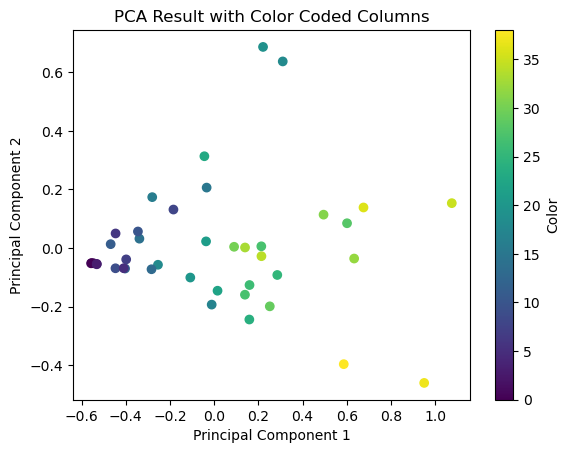

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
# Extract the numerical data for PCA
X = df.iloc[:, 1:].values

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['Dim1', 'Dim2'])

# Concatenate rsID and color columns to the principal components DataFrame
result_df = pd.concat([df[['rsID', 'Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']], pc_df], axis=1)

# Convert categorical columns to numeric values using LabelEncoder
label_encoder = LabelEncoder()
for col in ['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']:
    result_df[col] = label_encoder.fit_transform(result_df[col])

# Plot the PCA result with different colors
plt.scatter(result_df['Dim1'], result_df['Dim2'], c=result_df['Alt_Freq_MAF_K&H'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result with Color Coded Columns')
plt.colorbar(label='Color')
plt.show()

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.decomposition import PCA

# Assuming your genetic variation matrix is stored in a DataFrame named 'genetic_matrix'
# Modify the code accordingly if your DataFrame has a different name

# Calculate the Spearman rank correlation matrix
corr_matrix, _ = spearmanr(genetic_matrix)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(corr_matrix)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['Dim1', 'Dim2'])

# Concatenate column names to the principal components DataFrame
result_df = pd.concat([pd.DataFrame(genetic_matrix.columns, columns=['Column']), pc_df], axis=1)

# Plot the individual factor maps in a four-quadrant graph
plt.figure(figsize=(8, 8))
scatter = plt.scatter(
    result_df['Dim1'],
    result_df['Dim2'],
    c=result_df['Dim1'].apply(lambda x: 1 if x > 0 else 0),  # Color points based on Dim1 quadrant
    cmap='coolwarm',
    alpha=0.7
)

# Add labels for each point
for i, row in result_df.iterrows():
    plt.text(row['Dim1'], row['Dim2'], row['Column'], fontsize=8, ha='right' if row['Dim1'] > 0 else 'left', va='bottom' if row['Dim2'] > 0 else 'top')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Add a vertical line at x=0
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('Individual Factor Map - PCA (Genetic Variation)')
plt.colorbar(scatter, label='Dim1')
#plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/cluster_PCA_GeneticVariation.png', dpi=450, bbox_inches='tight')
plt.show()

NameError: name 'genetic_matrix' is not defined

# PCA for Prevalence_SNPs

In [2]:
import pandas as pd
df = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/rsID_maf_file_28_12_2023.xlsx')
df = df[['rsID', 'Alt_Freq_MAF_KH', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']]
df

rsID  Alt_Freq_MAF_KH    Global  East_Asian  European_non_Finnish  \
0     rs2231142         0.102679  0.111900    0.298200              0.110900   
1        rs4961         0.194399  0.198400    0.508000              0.198900   
2     rs1042713         0.373782  0.388300    0.527600              0.365200   
3        rs7412         0.034903  0.074240    0.060500              0.078300   
4     rs4673993         0.430195  0.319500    0.261700              0.328000   
5    rs71647871         0.003653  0.011760    0.000067              0.012970   
6    rs78769542         0.003247  0.000307    0.000156              0.000023   
7    rs16969968         0.172078  0.301600    0.026760              0.335400   
8    rs12777823         0.365260  0.190500    0.311900              0.151300   
9     rs3745274         0.276380  0.256400    0.190500              0.240800   
10    rs2242480         0.327110  0.153300    0.252100              0.090310   
11    rs2108622         0.421266  0.287500    0.266700              0.297800   
12    rs1801160         0.043425  0.046750    0.018620              0.045000   
13    rs3918290         0.002435  0.005061    0.000000              0.004832   
14   rs17376848         0.024756  0.046580    0.129800              0.045270   
15    rs1801159         0.036120  0.194700    0.269400              0.199500   
16   rs56038477         0.011769  0.018780    0.000134              0.022080   
17    rs2297595         0.064935  0.089500    0.017700              0.093810   
18    rs1801265         0.123782  0.226200    0.053940              0.219000   
19    rs7557402         0.262987  0.469100    0.159400              0.510600   
20       rs6025         0.009740  0.021430    0.000067              0.024720   
21     rs396991         0.288961  0.319600    0.303600              0.320300   
22   rs11881222         0.193182  0.280700    0.078680              0.286000   
23    rs8099917         0.124594  0.156300    0.065390              0.194700   
24   rs12979860         0.206981  0.310400    0.066870              0.283900   
25    rs1127354         0.092938  0.075050    0.155300              0.073700   
26    rs7270101         0.017451  0.115500    0.000267              0.135000   
27      rs20455         0.419237  0.386300    0.476600              0.356900   
28    rs1801133         0.095779  0.318200    0.348400              0.337100   
29  rs116855232         0.056006  0.011740    0.103300              0.002550   
30    rs3812718         0.561688  0.534100    0.554500              0.550000   
31    rs1051266         0.321023  0.556100    0.453500              0.568100   
32    rs4149056         0.051948  0.142300    0.137300              0.152800   
33   rs10929302         0.288961  0.299600    0.122700              0.289200   
34       rs7294         0.741477  0.391400    0.096450              0.378300   
35    rs2359612         0.600649  0.649400    0.108000              0.621700   
36    rs8050894         0.124594  0.391300    0.903400              0.383700   
37    rs9934438         0.141234  0.374000    0.902100              0.378400   
38    rs2884737         0.068588  0.227300    0.000605              0.258600   
39    rs3788853         0.185471  0.217900    0.240600              0.208600   
40      rs25487         0.462662  0.657500    0.740400              0.637900   

    South_Asian  African_African_American  
0      0.090180                  0.026770  
1      0.175000                  0.075980  
2      0.448300                  0.493500  
3      0.041640                  0.105600  
4      0.472500                  0.120800  
5      0.006593                  0.002414  
6      0.004678                  0.000200  
7      0.237600                  0.056080  
8      0.334500                  0.249600  
9      0.386900                  0.377100  
10     0.321000                  0.741500  
11     0.390300                  0.097730  
12     0.096250                  0.024980  
13     0.003996                  0

In [3]:
vcf = pd.read_csv(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/new_vr_rsID_41.vcf', comment= '#', sep = '\t', header=None, low_memory=False)
vcf.columns = ['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']
vcf['CHROM'] = 'chr' + vcf['CHROM']
vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
vcf['Consequence'] = vcf['CSQ'].str.split('|').str[1]
vcf = vcf[['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'Consequence']]
vcf.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Consequence_41_rsID.xlsx', index=False)
vcf

CHROM        POS         rsID REF    ALT  \
0   chr16   55823658   rs71647871   C    A,T   
1    chr7  117611650   rs78769542   G    A,C   
2    chr1   97450058    rs3918290   C  A,G,T   
3    chr1   97573863   rs56038477   C    G,T   
4   chr16   31093188    rs8050894   C  A,G,T   
5    chr1   11796321    rs1801133   G    A,C   
6    chr1   97305364    rs1801160   C    G,T   
7    chr1   97450068   rs17376848   A      G   
8    chr1   97515839    rs1801159   T  A,C,G   
9    chr1   97699535    rs2297595   T    A,C   
10   chr1   97883329    rs1801265   A    G,T   
11   chr1  161544752     rs396991   A  C,G,T   
12   chr1  169549811       rs6025   C    A,T   
13  chr10   94645745   rs12777823   G    A,T   
14  chr12   21178615    rs4149056   T    A,C   
15  chr13   48045719  rs116855232   C      T   
16  chr15   78590583   rs16969968   G      A   
17  chr16   31091000       rs7294   C      T   
18  chr16   31092475    rs2359612   A    G,T   
19  chr16   31093557    rs9934438   G    A,C   
20  chr16   31094233    rs2884737   A      C   
21  chr19   15879621    rs2108622   C  A,G,T   
22  chr19   39244283   rs11881222   A      G   
23  chr19   39248147   rs12979860   C    G,T   
24  chr19   39252525    rs8099917   T      G   
25  chr19   41006936    rs3745274   G  A,C,T   
26  chr19   43551574      rs25487   T    C,G   
27  chr19   44908822       rs7412   C      T   
28   chr2   46376532    rs7557402   C  A,G,T   
29   chr2  166053034    rs3812718   C    A,T   
30   chr2  215347616    rs4673993   T  A,C,G   
31   chr2  233757136   rs10929302   G      A   
32  chr20    3213196    rs1127354   C  A,G,T   
33  chr20    3213247    rs7270101   A      C   
34  chr21   45537880    rs1051266   T    C,G   
35   chr4    2904980       rs4961   G    A,T   
36   chr4   88131171    rs2231142   G  A,C,T   
37   chr5  148826877    rs1042713   G    A,C   
38   chr6   39357302      rs20455   A      G   
39   chr7   99763843    rs2242480   C      T   
40   chrX  129736814    rs3788853   C    A,T   

                                          Consequence  
0                                    missense_variant  
1                                    missense_variant  
2                                splice_donor_variant  
3                                    missense_variant  
4                               upstream_gene_variant  
5                                    missense_variant  
6                                    missense_variant  
7                                  synonymous_variant  
8                                    missense_variant  
9                                    missense_variant  
10                                   missense_variant  
11                                   missense_variant  
12                                   missense_variant  
13                            downstream_gene_variant  
14                                   missense_variant  
15                                   missense_variant  
16                                   missense_variant  
17                              upstream_gene_variant  
18                              upstream_gene_variant  
19                              upstream_gene_variant  
20                                     intron_variant  
21                                   missense_variant  
22                                     intron_variant  
23                              upstream_gene_variant  
24                            downstream_gene_variant  
25                                 synonymous_variant  
26                                   missense_variant  
27                                   missense_variant  
28  splice_region_variant&splice_polypyrimidine_tr...  
29                                     intron_variant  
30                                     intron_variant  
31                                     intron_variant  
32                                   missense_variant  
33                                     intron_variant  
34                         

In [4]:
df = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/rsID_data_individual_populations.xlsx')
df

rsID               Nearest_MAF               Another_MAF
0     rs2231142                    Global      European_non_Finnish
1        rs4961                    Global                    Global
2     rs1042713                East_Asian      European_non_Finnish
3        rs7412               South_Asian               South_Asian
4     rs4673993           Alt_Freq_MAF_KH               South_Asian
5    rs71647871      European_non_Finnish  African_African_American
6    rs78769542      European_non_Finnish               South_Asian
7    rs16969968               South_Asian               South_Asian
8    rs12777823           Alt_Freq_MAF_KH               South_Asian
9     rs3745274           Alt_Freq_MAF_KH                    Global
10    rs2242480           Alt_Freq_MAF_KH               South_Asian
11    rs2108622           Alt_Freq_MAF_KH               South_Asian
12    rs1801160      European_non_Finnish      European_non_Finnish
13    rs3918290      European_non_Finnish               South_Asian
14   rs17376848      European_non_Finnish  African_African_American
15    rs1801159                    Global               South_Asian
16   rs56038477      European_non_Finnish               South_Asian
17    rs2297595               South_Asian               South_Asian
18    rs1801265           Alt_Freq_MAF_KH                East_Asian
19    rs7557402           Alt_Freq_MAF_KH  African_African_American
20       rs6025      European_non_Finnish               South_Asian
21     rs396991           Alt_Freq_MAF_KH                East_Asian
22   rs11881222           Alt_Freq_MAF_KH               South_Asian
23    rs8099917               South_Asian               South_Asian
24   rs12979860           Alt_Freq_MAF_KH               South_Asian
25    rs1127354               South_Asian                    Global
26    rs7270101               South_Asian               South_Asian
27      rs20455                East_Asian               South_Asian
28    rs1801133                    Global  African_African_American
29  rs116855232      European_non_Finnish               South_Asian
30    rs3812718                East_Asian                East_Asian
31    rs1051266                East_Asian  African_African_American
32    rs4149056               South_Asian               South_Asian
33   rs10929302           Alt_Freq_MAF_KH      European_non_Finnish
34       rs7294                East_Asian               South_Asian
35    rs2359612                East_Asian      European_non_Finnish
36    rs8050894  African_African_American               South_Asian
37    rs9934438  African_African_American  African_African_American
38    rs2884737               South_Asian  African_African_American
39    rs3788853                    Global               South_Asian
40      rs25487                East_Asian      European_non_Finnish

In [11]:
merged = pd.merge(df, vcf, on = 'rsID', how = 'left', sort=False)
merged.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Consequence_mapped_rsID.xlsx', index=False)
merged

rsID               Nearest_MAF               Another_MAF  CHROM  \
0     rs2231142                    Global      European_non_Finnish   chr4   
1        rs4961                    Global                    Global   chr4   
2     rs1042713                East_Asian      European_non_Finnish   chr5   
3        rs7412               South_Asian               South_Asian  chr19   
4     rs4673993           Alt_Freq_MAF_KH               South_Asian   chr2   
5    rs71647871      European_non_Finnish  African_African_American  chr16   
6    rs78769542      European_non_Finnish               South_Asian   chr7   
7    rs16969968               South_Asian               South_Asian  chr15   
8    rs12777823           Alt_Freq_MAF_KH               South_Asian  chr10   
9     rs3745274           Alt_Freq_MAF_KH                    Global  chr19   
10    rs2242480           Alt_Freq_MAF_KH               South_Asian   chr7   
11    rs2108622           Alt_Freq_MAF_KH               South_Asian  chr19   
12    rs1801160      European_non_Finnish      European_non_Finnish   chr1   
13    rs3918290      European_non_Finnish               South_Asian   chr1   
14   rs17376848      European_non_Finnish  African_African_American   chr1   
15    rs1801159                    Global               South_Asian   chr1   
16   rs56038477      European_non_Finnish               South_Asian   chr1   
17    rs2297595               South_Asian               South_Asian   chr1   
18    rs1801265           Alt_Freq_MAF_KH                East_Asian   chr1   
19    rs7557402           Alt_Freq_MAF_KH  African_African_American   chr2   
20       rs6025      European_non_Finnish               South_Asian   chr1   
21     rs396991           Alt_Freq_MAF_KH                East_Asian   chr1   
22   rs11881222           Alt_Freq_MAF_KH               South_Asian  chr19   
23    rs8099917               South_Asian               South_Asian  chr19   
24   rs12979860           Alt_Freq_MAF_KH               South_Asian  chr19   
25    rs1127354               South_Asian                    Global  chr20   
26    rs7270101               South_Asian               South_Asian  chr20   
27      rs20455                East_Asian               South_Asian   chr6   
28    rs1801133                    Global  African_African_American   chr1   
29  rs116855232      European_non_Finnish               South_Asian  chr13   
30    rs3812718                East_Asian                East_Asian   chr2   
31    rs1051266                East_Asian  African_African_American  chr21   
32    rs4149056               South_Asian               South_Asian  chr12   
33   rs10929302           Alt_Freq_MAF_KH      European_non_Finnish   chr2   
34       rs7294                East_Asian               South_Asian  chr16   
35    rs2359612                East_Asian      European_non_Finnish  chr16   
36    rs8050894  African_African_American               South_Asian  chr16   
37    rs9934438  African_African_American  African_African_American  chr16   
38    rs2884737               South_Asian  African_African_American  chr16   
39    rs3788853                    Global               South_Asian   chrX   
40      rs25487                East_Asian      European_non_Finnish  chr19   

          POS REF    ALT                                        Consequence  
0    88131171   G  A,C,T                                        stop_gained  
1     2904980   G    A,T                                   missense_variant  
2   148826877   G    A,C                                   missense_variant  
3    44908822   C      T                                   missense_variant  
4   215347616   T  A,C,G                                     intron_variant  
5    55823658   C    A,T                                   missense_variant  
6   117611650   G    A,C                                   missense_variant  
7    78590583   G      A                                   missense_variant  
8    94645745   G    A,T        

           rsID  cluster
0     rs2231142        5
1        rs4961        5
2     rs1042713        3
3        rs7412        0
4     rs4673993        1
5    rs71647871        2
6    rs78769542        2
7    rs16969968        0
8    rs12777823        1
9     rs3745274        1
10    rs2242480        1
11    rs2108622        1
12    rs1801160        2
13    rs3918290        2
14   rs17376848        2
15    rs1801159        5
16   rs56038477        2
17    rs2297595        0
18    rs1801265        1
19    rs7557402        1
20       rs6025        2
21     rs396991        1
22   rs11881222        1
23    rs8099917        0
24   rs12979860        1
25    rs1127354        0
26    rs7270101        0
27      rs20455        3
28    rs1801133        5
29  rs116855232        2
30    rs3812718        3
31    rs1051266        3
32    rs4149056        0
33   rs10929302        1
34       rs7294        3
35    rs2359612        3
36    rs8050894        4
37    rs9934438        4
38    rs2884737        0


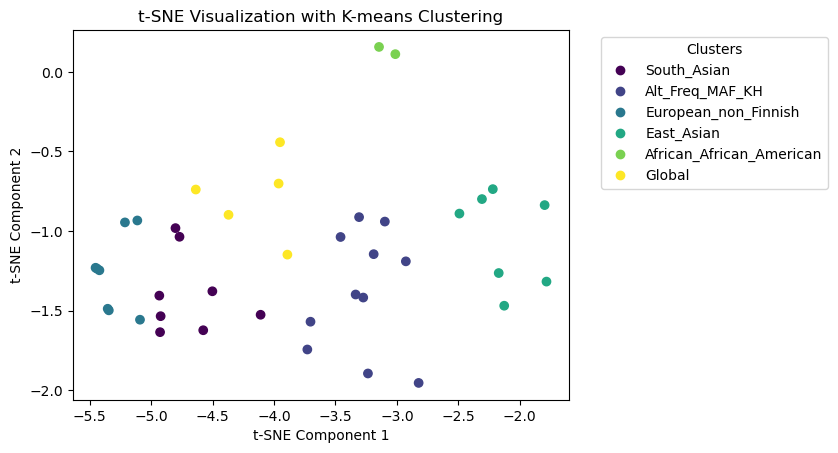

In [69]:
# Extract relevant columns for t-SNE
X = df[['Alt_Freq_MAF_KH', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']]

# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Apply K-means clustering
num_clusters = 6  # Adjust based on your understanding of the data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tsne)

# Create a scatter plot with colored clusters
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis')

# Add legends with column names as cluster labels outside the plot
legend_labels = ['South_Asian', 'Alt_Freq_MAF_KH', 'European_non_Finnish', 'East_Asian', 'African_African_American', 'Global']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE Visualization with K-means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Display the rsID and corresponding cluster assignment
print(df[['rsID', 'cluster']])
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/t_SNE_Distance.png', dpi=2500, bbox_inches='tight')  # Replace with your file path
plt.show()

In [70]:
df.cluster.value_counts()

1    11
0     8
2     8
3     7
5     5
4     2
Name: cluster, dtype: int64

In [47]:
df.cluster.value_counts()

1    11
0     8
2     8
3     7
5     5
4     2
Name: cluster, dtype: int64

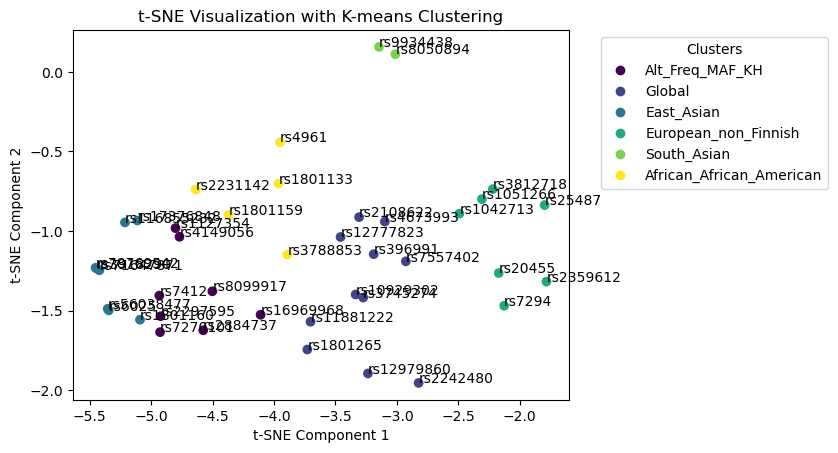

           rsID  cluster
0     rs2231142        5
1        rs4961        5
2     rs1042713        3
3        rs7412        0
4     rs4673993        1
5    rs71647871        2
6    rs78769542        2
7    rs16969968        0
8    rs12777823        1
9     rs3745274        1
10    rs2242480        1
11    rs2108622        1
12    rs1801160        2
13    rs3918290        2
14   rs17376848        2
15    rs1801159        5
16   rs56038477        2
17    rs2297595        0
18    rs1801265        1
19    rs7557402        1
20       rs6025        2
21     rs396991        1
22   rs11881222        1
23    rs8099917        0
24   rs12979860        1
25    rs1127354        0
26    rs7270101        0
27      rs20455        3
28    rs1801133        5
29  rs116855232        2
30    rs3812718        3
31    rs1051266        3
32    rs4149056        0
33   rs10929302        1
34       rs7294        3
35    rs2359612        3
36    rs8050894        4
37    rs9934438        4
38    rs2884737        0


In [28]:
# Extract relevant columns for t-SNE
X = df[['Alt_Freq_MAF_KH', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']]

# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Apply K-means clustering
num_clusters = 6  # Adjust based on your understanding of the data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tsne)

# Create a scatter plot with colored clusters
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis')

# Annotate each point with the rsID
for i, rsID in enumerate(df['rsID']):
    plt.annotate(rsID, (X_tsne[i, 0], X_tsne[i, 1]))

# Add legends with column names as cluster labels outside the plot
legend_labels = ['Alt_Freq_MAF_KH', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE Visualization with K-means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Display the rsID and corresponding cluster assignment
print(df[['rsID', 'cluster']])

In [31]:
df.cluster.value_counts()

1    11
0     8
2     8
3     7
5     5
4     2
Name: cluster, dtype: int64

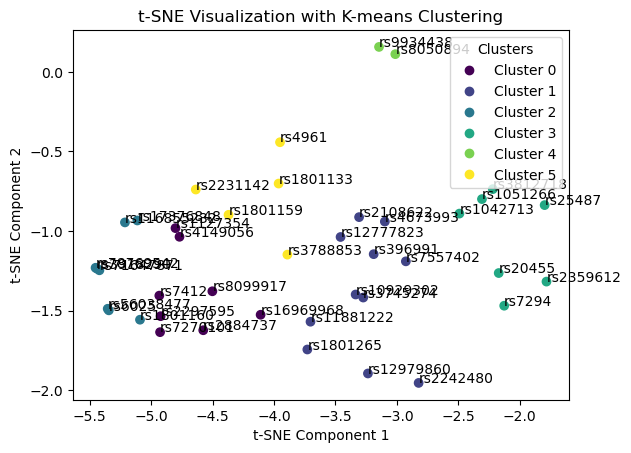

           rsID  cluster
0     rs2231142        5
1        rs4961        5
2     rs1042713        3
3        rs7412        0
4     rs4673993        1
5    rs71647871        2
6    rs78769542        2
7    rs16969968        0
8    rs12777823        1
9     rs3745274        1
10    rs2242480        1
11    rs2108622        1
12    rs1801160        2
13    rs3918290        2
14   rs17376848        2
15    rs1801159        5
16   rs56038477        2
17    rs2297595        0
18    rs1801265        1
19    rs7557402        1
20       rs6025        2
21     rs396991        1
22   rs11881222        1
23    rs8099917        0
24   rs12979860        1
25    rs1127354        0
26    rs7270101        0
27      rs20455        3
28    rs1801133        5
29  rs116855232        2
30    rs3812718        3
31    rs1051266        3
32    rs4149056        0
33   rs10929302        1
34       rs7294        3
35    rs2359612        3
36    rs8050894        4
37    rs9934438        4
38    rs2884737        0


In [24]:
# Extract relevant columns for t-SNE
X = df[['Alt_Freq_MAF_KH', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']]

# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Apply K-means clustering
num_clusters = 6  # Adjust based on your understanding of the data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tsne)

# Create a scatter plot with colored clusters
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis')

# Annotate each point with the rsID
for i, rsID in enumerate(df['rsID']):
    plt.annotate(rsID, (X_tsne[i, 0], X_tsne[i, 1]))

# Add legends
legend_labels = [f'Cluster {i}' for i in range(num_clusters)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.title('t-SNE Visualization with K-means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Display the rsID and corresponding cluster assignment
print(df[['rsID', 'cluster']])

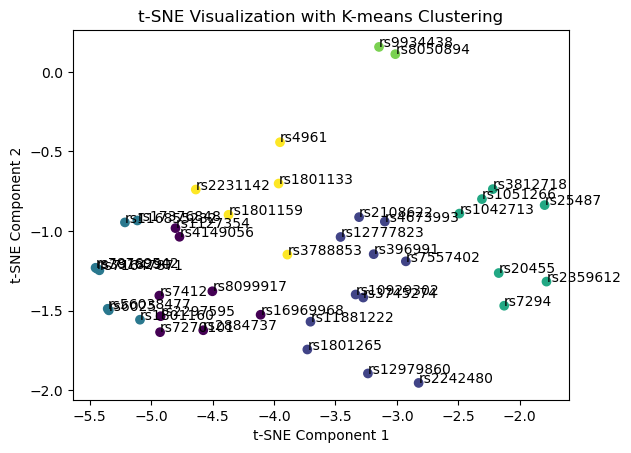

           rsID  cluster
0     rs2231142        5
1        rs4961        5
2     rs1042713        3
3        rs7412        0
4     rs4673993        1
5    rs71647871        2
6    rs78769542        2
7    rs16969968        0
8    rs12777823        1
9     rs3745274        1
10    rs2242480        1
11    rs2108622        1
12    rs1801160        2
13    rs3918290        2
14   rs17376848        2
15    rs1801159        5
16   rs56038477        2
17    rs2297595        0
18    rs1801265        1
19    rs7557402        1
20       rs6025        2
21     rs396991        1
22   rs11881222        1
23    rs8099917        0
24   rs12979860        1
25    rs1127354        0
26    rs7270101        0
27      rs20455        3
28    rs1801133        5
29  rs116855232        2
30    rs3812718        3
31    rs1051266        3
32    rs4149056        0
33   rs10929302        1
34       rs7294        3
35    rs2359612        3
36    rs8050894        4
37    rs9934438        4
38    rs2884737        0


In [22]:
# Extract relevant columns for t-SNE
X = df[['Alt_Freq_MAF_KH', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']]

# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Apply K-means clustering
num_clusters = 6  # Adjust based on your understanding of the data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tsne)

# Create a scatter plot with colored clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis')

# Annotate each point with the rsID
for i, rsID in enumerate(df['rsID']):
    plt.annotate(rsID, (X_tsne[i, 0], X_tsne[i, 1]))

plt.title('t-SNE Visualization with K-means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Display the rsID and corresponding cluster assignment
print(df[['rsID', 'cluster']])

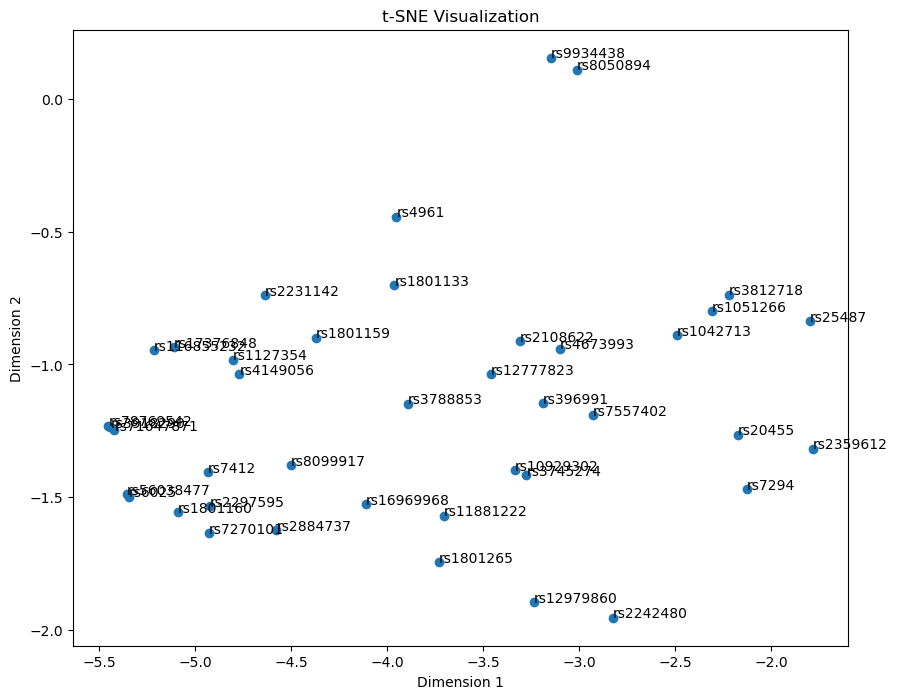

In [3]:
# Extract features (excluding the rsID column)
features = df.drop('rsID', axis=1)

# Initialize t-SNE with 2 components (2D representation)
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_result = tsne.fit_transform(features)

# Create a new DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension 1', 'Dimension 2'])

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'])
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Annotate points with rsID
for i, rsid in enumerate(df['rsID']):
    plt.annotate(rsid, (tsne_df.iloc[i]['Dimension 1'], tsne_df.iloc[i]['Dimension 2']))

plt.show()

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Get column names for MAF population columns
maf_columns = ['Alt_Freq_MAF_KH', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']

# Create new columns for all combinations of MAF population columns
for combo in combinations(maf_columns, 2):
    column_name = f'ED_{combo[0]}/{combo[1]}'
    arr1 = df[combo[0]].values.reshape(-1, 1)
    arr2 = df[combo[1]].values.reshape(-1, 1)
    df[column_name] = np.linalg.norm(arr1 - arr2, axis=1)

# Display the DataFrame with new columns
#df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Euclidean_Distance_rsID.xlsx', index=False)
df = df[['rsID', 'ED_Alt_Freq_MAF_KH/Global', 'ED_Alt_Freq_MAF_KH/East_Asian', 'ED_Alt_Freq_MAF_KH/European_non_Finnish', 'ED_Alt_Freq_MAF_KH/South_Asian', 'ED_Alt_Freq_MAF_KH/African_African_American']]
df

rsID  ED_Alt_Freq_MAF_KH/Global  ED_Alt_Freq_MAF_KH/East_Asian  \
0     rs2231142                   0.009221                       0.195521   
1        rs4961                   0.004001                       0.313601   
2     rs1042713                   0.014518                       0.153818   
3        rs7412                   0.039337                       0.025597   
4     rs4673993                   0.110695                       0.168495   
5    rs71647871                   0.008107                       0.003586   
6    rs78769542                   0.002939                       0.003091   
7    rs16969968                   0.129522                       0.145318   
8    rs12777823                   0.174760                       0.053360   
9     rs3745274                   0.019980                       0.085880   
10    rs2242480                   0.173810                       0.075010   
11    rs2108622                   0.133766                       0.154566   
12    rs1801160                   0.003325                       0.024805   
13    rs3918290                   0.002626                       0.002435   
14   rs17376848                   0.021824                       0.105044   
15    rs1801159                   0.158580                       0.233280   
16   rs56038477                   0.007011                       0.011636   
17    rs2297595                   0.024565                       0.047235   
18    rs1801265                   0.102418                       0.069842   
19    rs7557402                   0.206113                       0.103587   
20       rs6025                   0.011690                       0.009673   
21     rs396991                   0.030639                       0.014639   
22   rs11881222                   0.087518                       0.114502   
23    rs8099917                   0.031706                       0.059204   
24   rs12979860                   0.103419                       0.140111   
25    rs1127354                   0.017888                       0.062362   
26    rs7270101                   0.098049                       0.017184   
27      rs20455                   0.032937                       0.057363   
28    rs1801133                   0.222421                       0.252621   
29  rs116855232                   0.044266                       0.047294   
30    rs3812718                   0.027588                       0.007188   
31    rs1051266                   0.235077                       0.132477   
32    rs4149056                   0.090352                       0.085352   
33   rs10929302                   0.010639                       0.166261   
34       rs7294                   0.350077                       0.645027   
35    rs2359612                   0.048751                       0.492649   
36    rs8050894                   0.266706                       0.778806   
37    rs9934438                   0.232766                       0.760866   
38    rs2884737                   0.158712                       0.067983   
39    rs3788853                   0.032429                       0.055129   
40      rs25487                   0.194838                       0.277738   

    ED_Alt_Freq_MAF_KH/European_non_Finnish  ED_Alt_Freq_MAF_KH/South_Asian  \
0                                  0.008221                        0.012499   
1                                  0.004501                        0.019399   
2                                  0.008582                        0.074518   
3                                  0.043397                        0.006737   
4                                  0.102195                        0.042305   
5                                  0.009317                        0.002940   
6                                  0.003224                        0.001431   
7                                  0.163322                        0.065522   
8                                  0.213960                      

In [75]:
# Extracting distance column names
distance_columns = df.columns[1:]

# Create a new column for the nearest distance column name
df['nearest_distance_column'] = df.apply(lambda row: min(distance_columns, key=lambda col: row[col]), axis=1)

# Display the resulting DataFrame
df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/rsID_nearest_maf.xlsx', index=False)
df

rsID  ED_Alt_Freq_MAF_KH/Global  ED_Alt_Freq_MAF_KH/East_Asian  \
0     rs2231142                   0.009221                       0.195521   
1        rs4961                   0.004001                       0.313601   
2     rs1042713                   0.014518                       0.153818   
3        rs7412                   0.039337                       0.025597   
4     rs4673993                   0.110695                       0.168495   
5    rs71647871                   0.008107                       0.003586   
6    rs78769542                   0.002939                       0.003091   
7    rs16969968                   0.129522                       0.145318   
8    rs12777823                   0.174760                       0.053360   
9     rs3745274                   0.019980                       0.085880   
10    rs2242480                   0.173810                       0.075010   
11    rs2108622                   0.133766                       0.154566   
12    rs1801160                   0.003325                       0.024805   
13    rs3918290                   0.002626                       0.002435   
14   rs17376848                   0.021824                       0.105044   
15    rs1801159                   0.158580                       0.233280   
16   rs56038477                   0.007011                       0.011636   
17    rs2297595                   0.024565                       0.047235   
18    rs1801265                   0.102418                       0.069842   
19    rs7557402                   0.206113                       0.103587   
20       rs6025                   0.011690                       0.009673   
21     rs396991                   0.030639                       0.014639   
22   rs11881222                   0.087518                       0.114502   
23    rs8099917                   0.031706                       0.059204   
24   rs12979860                   0.103419                       0.140111   
25    rs1127354                   0.017888                       0.062362   
26    rs7270101                   0.098049                       0.017184   
27      rs20455                   0.032937                       0.057363   
28    rs1801133                   0.222421                       0.252621   
29  rs116855232                   0.044266                       0.047294   
30    rs3812718                   0.027588                       0.007188   
31    rs1051266                   0.235077                       0.132477   
32    rs4149056                   0.090352                       0.085352   
33   rs10929302                   0.010639                       0.166261   
34       rs7294                   0.350077                       0.645027   
35    rs2359612                   0.048751                       0.492649   
36    rs8050894                   0.266706                       0.778806   
37    rs9934438                   0.232766                       0.760866   
38    rs2884737                   0.158712                       0.067983   
39    rs3788853                   0.032429                       0.055129   
40      rs25487                   0.194838                       0.277738   

    ED_Alt_Freq_MAF_KH/European_non_Finnish  ED_Alt_Freq_MAF_KH/South_Asian  \
0                                  0.008221                        0.012499   
1                                  0.004501                        0.019399   
2                                  0.008582                        0.074518   
3                                  0.043397                        0.006737   
4                                  0.102195                        0.042305   
5                                  0.009317                        0.002940   
6                                  0.003224                        0.001431   
7                                  0.163322                        0.065522   
8                                  0.213960                      

In [16]:
df['nearest_distance_column'].value_counts()

ED_Alt_Freq_MAF_KH/South_Asian                 22
ED_Alt_Freq_MAF_KH/African_African_American     7
ED_Alt_Freq_MAF_KH/European_non_Finnish         6
ED_Alt_Freq_MAF_KH/Global                       3
ED_Alt_Freq_MAF_KH/East_Asian                   3
Name: nearest_distance_column, dtype: int64

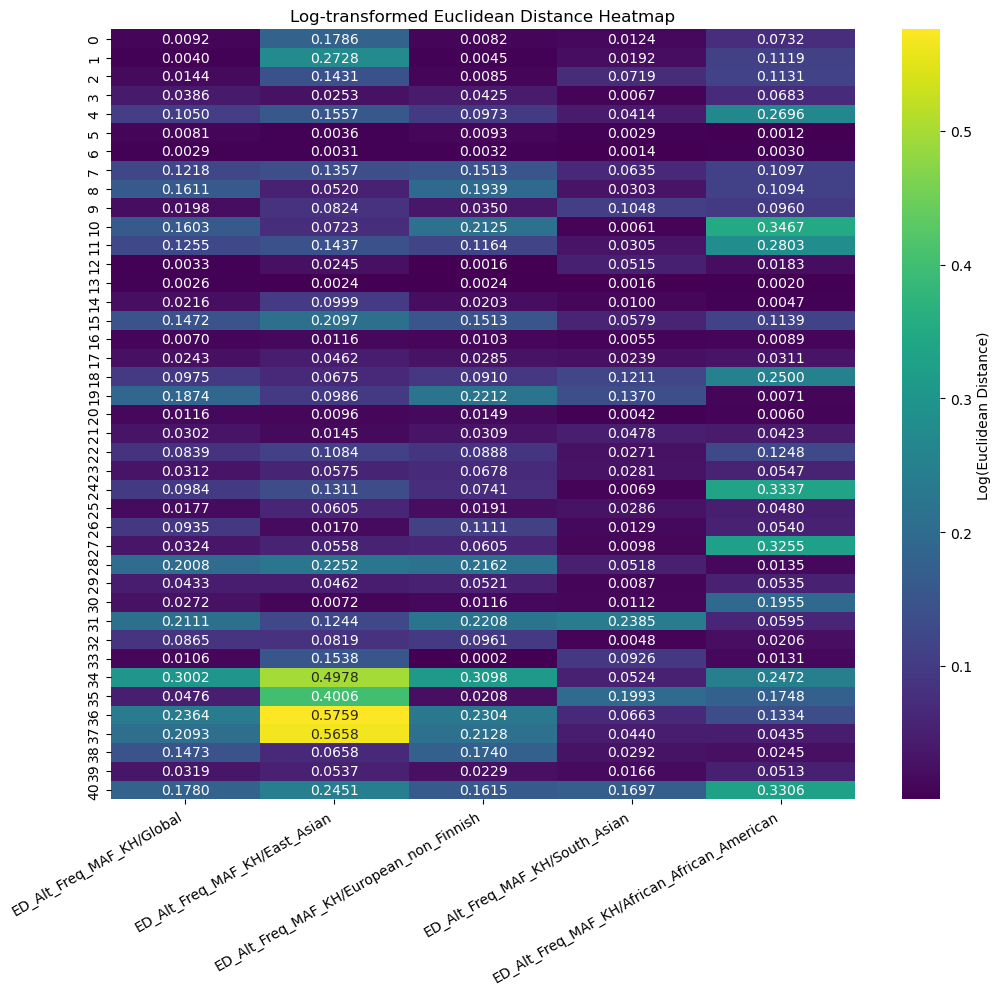

In [57]:
# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Replace zeros with a small non-zero value (e.g., 1e-10)
df[numeric_columns] = df[numeric_columns].replace(0, 1e-10)

# Apply log transformation to the dataframe
log_df = np.log1p(df[numeric_columns])

# Plotting the log-transformed heatmap with rotated x-axis labels
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(log_df, cmap='viridis', annot=True, fmt='.4f', cbar_kws={'label': 'Log(Euclidean Distance)'})

# Rotate x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.title('Log-transformed Euclidean Distance Heatmap')
#plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Log_Euclidean_Distance.png', dpi=250, bbox_inches='tight')  # Replace with your file path
plt.show()

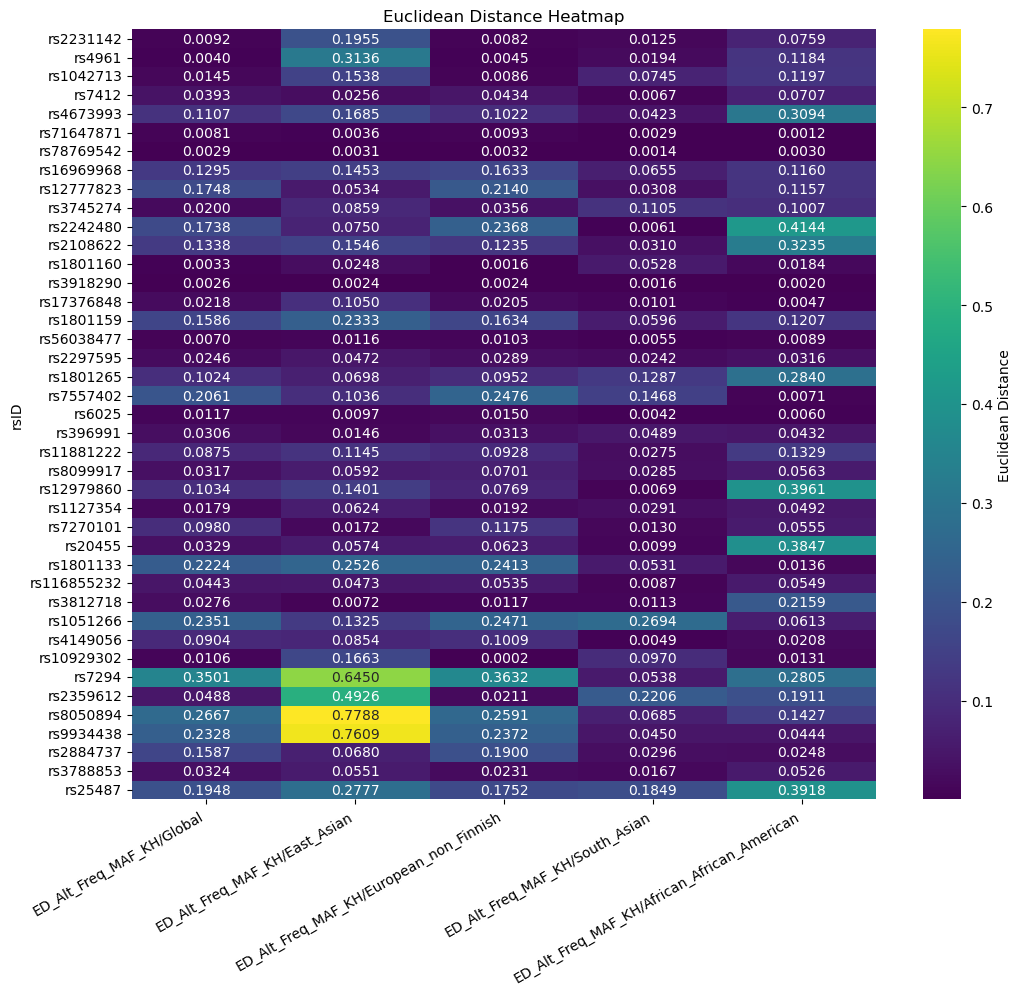

In [51]:
# Set rsID as the index
df.set_index('rsID', inplace=True)

# Plotting the heatmap with rotated x-axis labels
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df, cmap='viridis', annot=True, fmt='.4f', cbar_kws={'label': 'Euclidean Distance'})

# Rotate x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.title('Euclidean Distance Heatmap')
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Euclidean_Distance.png', dpi=250, bbox_inches='tight') # Replace with your file path
plt.show()

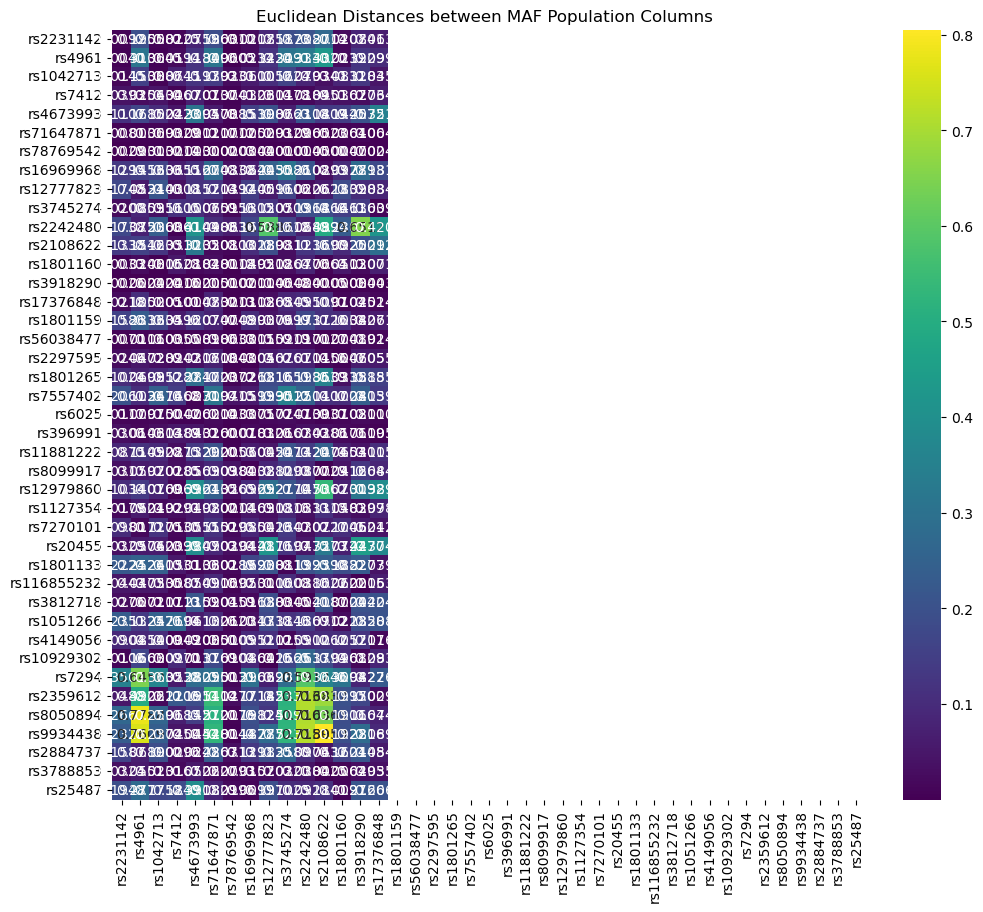

In [3]:
# Get column names for MAF population columns
maf_columns = ['Alt_Freq_MAF_KH', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']

# Create new columns for all combinations of MAF population columns
for combo in combinations(maf_columns, 2):
    column_name = f'Euclidean_Distance_{combo[0]}_{combo[1]}'
    arr1 = df[combo[0]].values.reshape(-1, 1)
    arr2 = df[combo[1]].values.reshape(-1, 1)
    distance = np.linalg.norm(arr1 - arr2, axis=1)
    df[column_name] = distance

# Extract the Euclidean distance columns for visualization
distance_columns = [col for col in df.columns if 'Euclidean_Distance' in col]

# Check for zero-size arrays or NaN values
if np.any(np.isnan(df[distance_columns].values)):
    raise ValueError("NaN values found in Euclidean distance columns.")
elif np.any(df[distance_columns].values.size == 0):
    raise ValueError("Zero-size array found in Euclidean distance columns.")
else:
    # Plotting heatmap
    plt.figure(figsize=(12, 10))
    heatmap_data = df[distance_columns].values
    sns.heatmap(heatmap_data, annot=True, fmt=".4f", xticklabels=df['rsID'], yticklabels=df['rsID'], cmap="viridis")
    plt.title("Euclidean Distances between MAF Population Columns")
    plt.show()


In [9]:
euclidean_distance = ((0.10 - 0.18)**2)**0.5
euclidean_distance

0.07999999999999999

In [7]:
import pandas as pd
import numpy as np
from itertools import combinations

# Sample data
data = {'rsID': ['rs123', 'rs456', 'rs789'],
        'MAF_Population1': [0.1, 0.05, 0.2],
        'MAF_Population2': [0.15, 0.12, 0.08],
        'MAF_Population3': [0.18, 0.25, 0.1],
        'MAF_Population4': [0.08, 0.15, 0.12],
        'MAF_Population5': [0.12, 0.1, 0.18]}

# Creating a DataFrame
df = pd.DataFrame(data)

# Get column names for MAF population columns
maf_columns = [col for col in df.columns if 'MAF_Population' in col]

# Create new columns for all combinations of MAF population columns
for combo in combinations(maf_columns, 2):
    column_name = f'Euclidean_Distance_{combo[0][-1]}_{combo[1][-1]}'
    arr1 = df[combo[0]].values.reshape(-1, 1)
    arr2 = df[combo[1]].values.reshape(-1, 1)
    df[column_name] = np.linalg.norm(arr1 - arr2, axis=1)

# Display the DataFrame with new columns
df

rsID  MAF_Population1  MAF_Population2  MAF_Population3  MAF_Population4  \
0  rs123             0.10             0.15             0.18             0.08   
1  rs456             0.05             0.12             0.25             0.15   
2  rs789             0.20             0.08             0.10             0.12   

   MAF_Population5  Euclidean_Distance_1_2  Euclidean_Distance_1_3  \
0             0.12                    0.05                    0.08   
1             0.10                    0.07                    0.20   
2             0.18                    0.12                    0.10   

   Euclidean_Distance_1_4  Euclidean_Distance_1_5  Euclidean_Distance_2_3  \
0                    0.02                    0.02                    0.03   
1                    0.10                    0.05                    0.13   
2                    0.08                    0.02                    0.02   

   Euclidean_Distance_2_4  Euclidean_Distance_2_5  Euclidean_Distance_3_4  \
0                    0.07                    0.03                    0.10   
1                    0.03                    0.02                    0.10   
2                    0.04                    0.10                    0.02   

   Euclidean_Distance_3_5  Euclidean_Distance_4_5  
0                    0.06                    0.04  
1                    0.15                    0.05  
2                    0.08                    0.06

In [5]:
import pandas as pd
from itertools import combinations

# Sample data
data = {'rsID': ['rs123', 'rs456', 'rs789'],
        'MAF_Population1': [0.1, 0.05, 0.2],
        'MAF_Population2': [0.15, 0.12, 0.08],
        'MAF_Population3': [0.18, 0.25, 0.1],
        'MAF_Population4': [0.08, 0.15, 0.12],
        'MAF_Population5': [0.12, 0.1, 0.18]}

# Creating a DataFrame
df = pd.DataFrame(data)

# Get column names for MAF population columns
maf_columns = [col for col in df.columns if 'MAF_Population' in col]

# Create new columns for all combinations of MAF population columns
for combo in combinations(maf_columns, 2):
    df[f'Combined_MAF_{combo[0][-1]}_{combo[1][-1]}'] = df[combo[0]] + df[combo[1]]

# Display the DataFrame with new columns
df

rsID  MAF_Population1  MAF_Population2  MAF_Population3  MAF_Population4  \
0  rs123             0.10             0.15             0.18             0.08   
1  rs456             0.05             0.12             0.25             0.15   
2  rs789             0.20             0.08             0.10             0.12   

   MAF_Population5  Combined_MAF_1_2  Combined_MAF_1_3  Combined_MAF_1_4  \
0             0.12              0.25              0.28              0.18   
1             0.10              0.17              0.30              0.20   
2             0.18              0.28              0.30              0.32   

   Combined_MAF_1_5  Combined_MAF_2_3  Combined_MAF_2_4  Combined_MAF_2_5  \
0              0.22              0.33              0.23              0.27   
1              0.15              0.37              0.27              0.22   
2              0.38              0.18              0.20              0.26   

   Combined_MAF_3_4  Combined_MAF_3_5  Combined_MAF_4_5  
0              0.26              0.30              0.20  
1              0.40              0.35              0.25  
2              0.22              0.28              0.30

In [16]:
from itertools import combinations
from scipy.spatial.distance import euclidean
import pandas as pd

# Sample data
data = {
    'rsID': ['rs1', 'rs2', 'rs3', 'rs4'],
    'MAF_Population1': [0.1, 0.05, 0.2, 0.15],
    'MAF_Population2': [0.12, 0.08, 0.18, 0.14],
    'MAF_Population3': [0.11, 0.07, 0.19, 0.13],
    'MAF_Population4': [0.09, 0.06, 0.21, 0.16],
    'MAF_Population5': [0.08, 0.09, 0.22, 0.17]
}

# Create a DataFrame
df = pd.DataFrame(data)

from itertools import combinations

# Function to get combinations of populations
def get_population_combinations(row):
    populations = [f'MAF_{i}' for i in range(1, 6)]
    return list(combinations(populations, 2))

# Apply the function to create a new column
df['PopulationCombinations'] = df.apply(get_population_combinations, axis=1)

# Expand the combinations into separate columns
for i, combination in enumerate(df['PopulationCombinations'].explode().unique(), start=1):
    df[f'Combination_{i}'] = df['PopulationCombinations'].apply(lambda x: combination in x).astype(int)

# Drop the intermediate column
df = df.drop(columns='PopulationCombinations')

# Display the updated DataFrame
df

rsID  MAF_Population1  MAF_Population2  MAF_Population3  MAF_Population4  \
0  rs1             0.10             0.12             0.11             0.09   
1  rs2             0.05             0.08             0.07             0.06   
2  rs3             0.20             0.18             0.19             0.21   
3  rs4             0.15             0.14             0.13             0.16   

   MAF_Population5  Combination_1  Combination_2  Combination_3  \
0             0.08              1              1              1   
1             0.09              1              1              1   
2             0.22              1              1              1   
3             0.17              1              1              1   

   Combination_4  Combination_5  Combination_6  Combination_7  Combination_8  \
0              1              1              1              1              1   
1              1              1              1              1              1   
2              1              1              1              1              1   
3              1              1              1              1              1   

   Combination_9  Combination_10  
0              1               1  
1              1               1  
2              1               1  
3              1               1

In [12]:
import pandas as pd
from itertools import combinations

# Sample data
data = {
    'rsID': ['rs123', 'rs456', 'rs789', 'rs101', 'rs202'],
    'MAF_Population1': [0.05, 0.15, 0.25, 0.08, 0.18],
    'MAF_Population2': [0.05, 0.08, 0.20, 0.10, 0.15],
    'MAF_Population3': [0.08, 0.18, 0.22, 0.05, 0.12],
    'MAF_Population4': [0.10, 0.14, 0.28, 0.15, 0.20],
    'MAF_Population5': [0.15, 0.12, 0.20, 0.18, 0.25],
}

# Creating a pandas DataFrame
df = pd.DataFrame(data)

# Function to calculate correlation for each combination
def calculate_correlation(row):
    populations = [f'MAF_Population{i}' for i in range(1, 6)]
    combinations_list = list(combinations(populations, 2))
    
    for combination in combinations_list:
        column_name = f'Corr_{combination[0]}_{combination[1]}'
        row[column_name] = df[combination[0]].corr(df[combination[1]])
    
    return row

# Apply the function to calculate correlation and create new columns
df = df.apply(calculate_correlation, axis=1)

# Display the updated DataFrame
df

rsID  MAF_Population1  MAF_Population2  MAF_Population3  MAF_Population4  \
0  rs123             0.05             0.05             0.08             0.10   
1  rs456             0.15             0.08             0.18             0.14   
2  rs789             0.25             0.20             0.22             0.28   
3  rs101             0.08             0.10             0.05             0.15   
4  rs202             0.18             0.15             0.12             0.20   

   MAF_Population5  Corr_MAF_Population1_MAF_Population2  \
0             0.15                              0.903636   
1             0.12                              0.903636   
2             0.20                              0.903636   
3             0.18                              0.903636   
4             0.25                              0.903636   

   Corr_MAF_Population1_MAF_Population3  Corr_MAF_Population1_MAF_Population4  \
0                              0.863634                              0.926962   
1                              0.863634                              0.926962   
2                              0.863634                              0.926962   
3                              0.863634                              0.926962   
4                              0.863634                              0.926962   

   Corr_MAF_Population1_MAF_Population5  Corr_MAF_Population2_MAF_Population3  \
0                              0.449309                              0.601111   
1                              0.449309                              0.601111   
2                              0.449309                              0.601111   
3                              0.449309                              0.601111   
4                              0.449309                              0.601111   

   Corr_MAF_Population2_MAF_Population4  Corr_MAF_Population2_MAF_Population5  \
0                              0.990816                              0.697081   
1                              0.990816                              0.697081   
2                              0.990816                              0.697081   
3                              0.990816                              0.697081   
4                              0.990816                              0.697081   

   Corr_MAF_Population3_MAF_Population4  Corr_MAF_Population3_MAF_Population5  \
0                              0.681871                             -0.028862   
1                              0.681871                             -0.028862   
2                              0.681871                             -0.028862   
3                              0.681871                             -0.028862   
4                              0.681871                             -0.028862   

   Corr_MAF_Population4_MAF_Population5  
0                              0.599041  
1                              0.599041  
2                              0.599041  
3                              0.599041  
4                              0.599041

In [77]:
import pandas as pd
import numpy as np

# Create a DataFrame with your data
data = {
    'rsID': ['rs2231142', 'rs4961', 'rs1042713', 'rs7412', 'rs4673993', 'rs71647871', 'rs78769542', 'rs16969968', 'rs12777823', 'rs3745274', 'rs2242480', 'rs2108622', 'rs1801160', 'rs3918290', 'rs17376848', 'rs1801159', 'rs56038477', 'rs2297595', 'rs1801265', 'rs7557402', 'rs6025', 'rs396991', 'rs11881222', 'rs8099917', 'rs12979860', 'rs1127354', 'rs7270101', 'rs20455', 'rs1801133', 'rs116855232', 'rs3812718', 'rs1051266', 'rs4149056', 'rs10929302', 'rs7294', 'rs2359612', 'rs8050894', 'rs9934438', 'rs2884737', 'rs3788853', 'rs25487'],
    'Alt_Freq_MAF_KH': [0.102678571, 0.194399351, 0.373782468, 0.034902597, 0.430194805, 0.003652597, 0.003246753, 0.172077922, 0.36525974, 0.27637987, 0.32711039, 0.421266234, 0.043425325, 0.002435065, 0.024756494, 0.03612013, 0.011769481, 0.064935065, 0.123782468, 0.262987013, 0.00974026, 0.288961039, 0.193181818, 0.124594156, 0.206980519, 0.092938312, 0.017451299, 0.419237013, 0.095779221, 0.056006494, 0.561688312, 0.321022727, 0.051948052, 0.288961039, 0.741477273, 0.600649351, 0.124594156, 0.141233766, 0.068587662, 0.185470779, 0.462662338],
    'Global': [0.1119, 0.1984, 0.3883, 0.07424, 0.3195, 0.01176, 0.0003074, 0.3016, 0.1905, 0.2564, 0.1533, 0.2875, 0.04675, 0.005061, 0.04658, 0.1947, 0.01878, 0.0895, 0.2262, 0.4691, 0.02143, 0.3196, 0.2807, 0.1563, 0.3104, 0.07505, 0.1155, 0.3863, 0.3182, 0.01174, 0.5341, 0.5561, 0.1423, 0.2996, 0.3914, 0.6494, 0.3913, 0.374, 0.2273, 0.2179, 0.6575],
    'East_Asian': [0.2982, 0.508, 0.5276, 0.0605, 0.2617, 0.00006684, 0.0001561, 0.02676, 0.3119, 0.1905, 0.2521, 0.2667, 0.01862, 0, 0.1298, 0.2694, 0.0001338, 0.0177, 0.05394, 0.1594, 0.00006689, 0.3036, 0.07868, 0.06539, 0.06687, 0.1553, 0.0002674, 0.4766, 0.3484, 0.1033, 0.5545, 0.4535, 0.1373, 0.1227, 0.09645, 0.108, 0.9034, 0.9021, 0.0006046, 0.2406, 0.7404],
    'European_non_Finnish': [0.1109, 0.1989, 0.3652, 0.0783, 0.328, 0.01297, 0.00002289, 0.3354, 0.1513, 0.2408, 0.09031, 0.2978, 0.045, 0.004832, 0.04527, 0.1995, 0.02208, 0.09381, 0.219, 0.5106, 0.02472, 0.3203, 0.286, 0.1947, 0.2839, 0.0737, 0.135, 0.3569, 0.3371, 0.00255, 0.55, 0.5681, 0.1528, 0.2892, 0.3783, 0.6217, 0.3837, 0.3784, 0.2586, 0.2086, 0.6379],
    'South_Asian': [0.09018, 0.175, 0.4483, 0.04164, 0.4725, 0.006593, 0.004678, 0.2376, 0.3345, 0.3869, 0.321, 0.3903, 0.09625, 0.003996, 0.03483, 0.09569, 0.01728, 0.08913, 0.2525, 0.4098, 0.01395, 0.3379, 0.2207, 0.1531, 0.2139, 0.122, 0.03048, 0.4291, 0.1489, 0.06474, 0.5504, 0.5904, 0.04709, 0.386, 0.6877, 0.8212, 0.1931, 0.1862, 0.09817, 0.2022, 0.6476],
    'African_African_American': [0.02677, 0.07598, 0.4935, 0.1056, 0.1208, 0.002414, 0.0002002, 0.05608, 0.2496, 0.3771, 0.7415, 0.09773, 0.02498, 0.0004799, 0.02006, 0.1568, 0.002867, 0.03331, 0.4078, 0.2701, 0.003759, 0.3322, 0.3261, 0.06834, 0.6031, 0.04378, 0.07293, 0.8039, 0.1094, 0.001095, 0.3458, 0.3823, 0.03111, 0.3021, 0.461, 0.7917, 0.2673, 0.09679, 0.04376, 0.2381, 0.8545]
}
df = pd.DataFrame(data)
# Drop the 'rsID' column as it is not needed for correlation calculation
df = df.drop('rsID', axis=1)
# Calculate the Pearson's correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Pearson_Correlation_Matrix.xlsx', index=False)
correlation_matrix

Alt_Freq_MAF_KH    Global  East_Asian  \
Alt_Freq_MAF_KH                  1.000000  0.774346    0.359227   
Global                           0.774346  1.000000    0.587945   
East_Asian                       0.359227  0.587945    1.000000   
European_non_Finnish             0.735432  0.993442    0.565542   
South_Asian                      0.949983  0.879155    0.384613   
African_African_American         0.716325  0.716117    0.358609   

                          European_non_Finnish  South_Asian  \
Alt_Freq_MAF_KH                       0.735432     0.949983   
Global                                0.993442     0.879155   
East_Asian                            0.565542     0.384613   
European_non_Finnish                  1.000000     0.846879   
South_Asian                           0.846879     1.000000   
African_African_American              0.645841     0.768173   

                          African_African_American  
Alt_Freq_MAF_KH                           0.716325  
Global                                    0.716117  
East_Asian                                0.358609  
European_non_Finnish                      0.645841  
South_Asian                               0.768173  
African_African_American                  1.000000

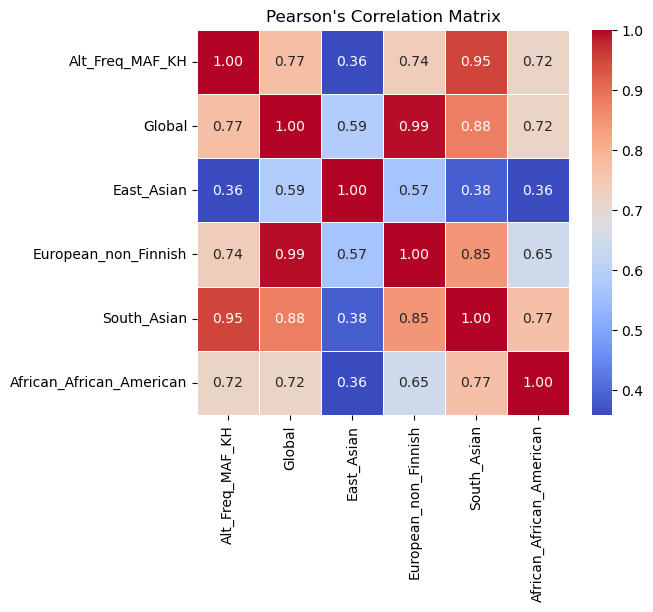

In [76]:
# Set up the matplotlib figure
plt.figure(figsize=(6, 5))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# Show the plot
plt.title("Pearson's Correlation Matrix")
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Pearson_Correlation.png', dpi=250, bbox_inches='tight') # Replace with your file path
plt.show()

In [66]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

# Your data
data = {
    'rsID': ['rs2231142', 'rs4961', 'rs1042713', 'rs7412', 'rs4673993', 'rs71647871', 'rs78769542', 'rs16969968',
             'rs12777823', 'rs3745274', 'rs2242480', 'rs2108622', 'rs1801160', 'rs3918290', 'rs17376848', 'rs1801159',
             'rs56038477', 'rs2297595', 'rs1801265', 'rs7557402', 'rs6025', 'rs396991', 'rs11881222', 'rs8099917',
             'rs12979860', 'rs1127354', 'rs7270101', 'rs20455', 'rs1801133', 'rs116855232', 'rs3812718', 'rs1051266',
             'rs4149056', 'rs10929302', 'rs7294', 'rs2359612', 'rs8050894', 'rs9934438', 'rs2884737', 'rs3788853',
             'rs25487'],
    'Alt_Freq_MAF_KH': [0.102678571, 0.194399351, 0.373782468, 0.034902597, 0.430194805, 0.003652597, 0.003246753,
                        0.172077922, 0.36525974, 0.27637987, 0.32711039, 0.421266234, 0.043425325, 0.002435065, 0.024756494,
                        0.03612013, 0.011769481, 0.064935065, 0.123782468, 0.262987013, 0.00974026, 0.288961039, 0.193181818,
                        0.124594156, 0.206980519, 0.092938312, 0.017451299, 0.419237013, 0.095779221, 0.056006494, 0.561688312,
                        0.321022727, 0.051948052, 0.288961039, 0.741477273, 0.600649351, 0.124594156, 0.141233766, 0.068587662,
                        0.185470779, 0.462662338],
    'Global': [0.1119, 0.1984, 0.3883, 0.07424, 0.3195, 0.01176, 0.0003074, 0.3016, 0.1905, 0.2564, 0.1533, 0.2875, 0.04675,
               0.005061, 0.04658, 0.1947, 0.01878, 0.0895, 0.2262, 0.4691, 0.02143, 0.3196, 0.2807, 0.1563, 0.3104, 0.07505,
               0.1155, 0.3863, 0.3182, 0.01174, 0.5341, 0.5561, 0.1423, 0.2996, 0.3914, 0.6494, 0.3913, 0.374, 0.2273, 0.2179,
               0.6575],
    'East_Asian': [0.2982, 0.508, 0.5276, 0.0605, 0.2617, 0.00006684, 0.0001561, 0.02676, 0.3119, 0.1905, 0.2521, 0.2667,
                   0.01862, 0, 0.1298, 0.2694, 0.0001338, 0.0177, 0.05394, 0.1594, 0.00006689, 0.3036, 0.07868, 0.06539, 0.06687,
                   0.1553, 0.0002674, 0.4766, 0.3484, 0.1033, 0.5545, 0.4535, 0.1373, 0.1227, 0.09645, 0.108, 0.9034, 0.9021, 0.0006046,
                   0.2406, 0.7404],
    'European_non_Finnish': [0.1109, 0.1989, 0.3652, 0.0783, 0.328, 0.01297, 0.00002289, 0.3354, 0.1513, 0.2408, 0.09031, 0.2978,
                             0.045, 0.004832, 0.04527, 0.1995, 0.02208, 0.09381, 0.219, 0.5106, 0.02472, 0.3203, 0.286, 0.1947, 0.2839,
                             0.0737, 0.135, 0.3569, 0.3371, 0.00255, 0.55, 0.5681, 0.1528, 0.2892, 0.3783, 0.6217, 0.3837, 0.3784, 0.2586,
                             0.2086, 0.6379],
    'South_Asian': [0.09018, 0.175, 0.4483, 0.04164, 0.4725, 0.006593, 0.004678, 0.2376, 0.3345, 0.3869, 0.321, 0.3903, 0.09625,
                    0.003996, 0.03483, 0.09569, 0.01728, 0.08913, 0.2525, 0.4098, 0.01395, 0.3379, 0.2207, 0.1531, 0.2139, 0.122,
                    0.03048, 0.4291, 0.1489, 0.06474, 0.5504, 0.5904, 0.04709, 0.386, 0.6877, 0.8212, 0.1931, 0.1862, 0.09817, 0.2022,
                    0.6476],
    'African_African_American': [0.02677, 0.07598, 0.4935, 0.1056, 0.1208, 0.002414, 0.0002002, 0.05608, 0.2496, 0.3771, 0.7415,
                                  0.09773, 0.02498, 0.0004799, 0.02006, 0.1568, 0.002867, 0.03331, 0.4078, 0.2701, 0.003759, 0.3322,
                                  0.3261, 0.06834, 0.6031, 0.04378, 0.07293, 0.8039, 0.1094, 0.001095, 0.3458, 0.3823, 0.03111, 0.3021,
                                  0.461, 0.7917, 0.2673, 0.09679, 0.04376, 0.2381, 0.8545]
}

df = pd.DataFrame(data)

# Extract rsID column
rsID_col = df['rsID']

# Drop 'rsID' column before PCA
df = df.drop(columns=['rsID'])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add 'rsID' column back
pca_df['rsID'] = rsID_col

# Calculate Euclidean distances and find the nearest population for each rsID
nearest_population, distances = pairwise_distances_argmin_min(pca_result, df)

# Add 'Nearest_Population' column to pca_df
pca_df['Nearest_Population'] = df.columns[nearest_population]

# Plot the scatter plot
fig, ax = plt.subplots()
for population in df.columns:
    subset = pca_df[pca_df['Nearest_Population'] == population]
    ax.scatter(subset['PC1'], subset['PC2'], label=population)

# Annotate points with rsID
for i, txt in enumerate(pca_df['rsID']):
    ax.annotate(txt, (pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i]), fontsize=8)

# Set labels and legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend()
plt.title('PCA with Nearest Populations for rsID')
plt.show()

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2 while Y.shape[1] == 6

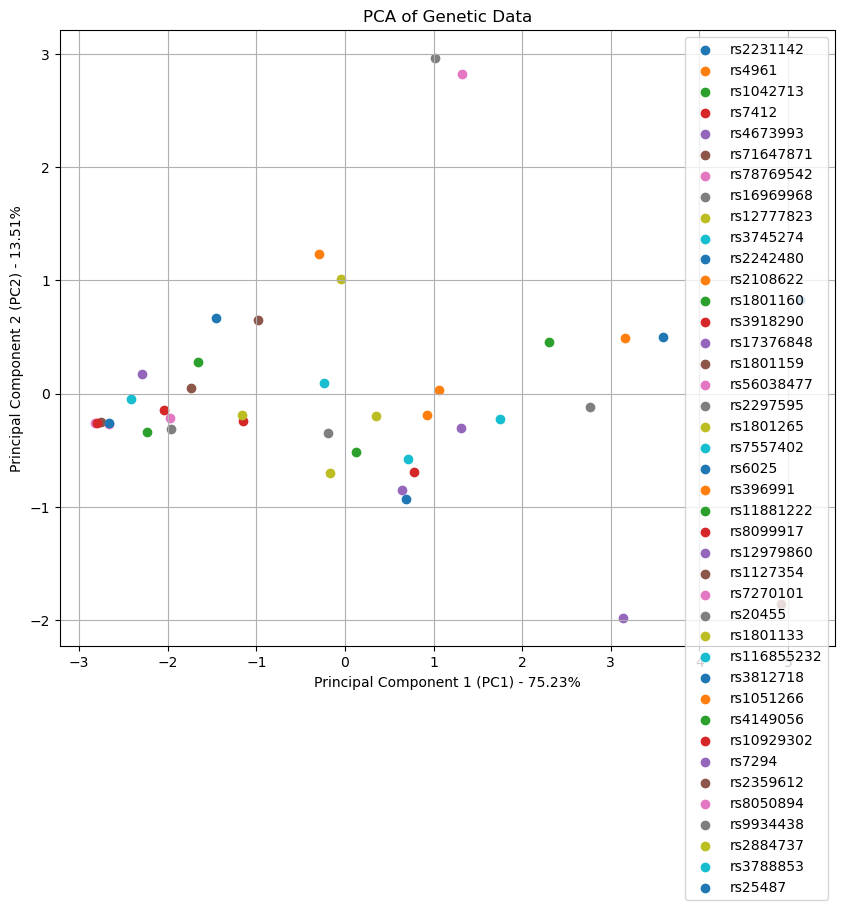

In [60]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame named 'df'
# If not, you can load your data into a DataFrame using pd.read_csv or another appropriate method

# Extract relevant columns for PCA
features = df.iloc[:, 1:].values  # Assuming columns 1 and onwards contain your frequency data

# Standardize the data (important for PCA)
features_standardized = StandardScaler().fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_standardized)
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add rsID to the PCA DataFrame
pca_df['rsID'] = df['rsID'].values

# Plot the PCA results with scatter plot
plt.figure(figsize=(10, 8))
for i, rsID in enumerate(df['rsID']):
    plt.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], label=rsID)

plt.title('PCA of Genetic Data')
plt.xlabel('Principal Component 1 (PC1) - {:.2%}'.format(explained_variance_ratio[0]))
plt.ylabel('Principal Component 2 (PC2) - {:.2%}'.format(explained_variance_ratio[1]))
plt.legend()
plt.grid(True)
plt.show()

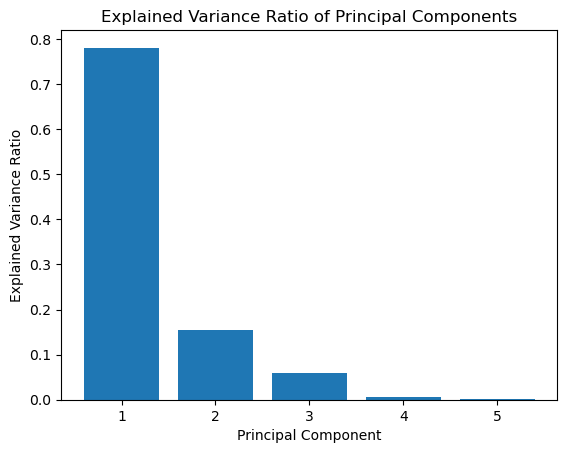

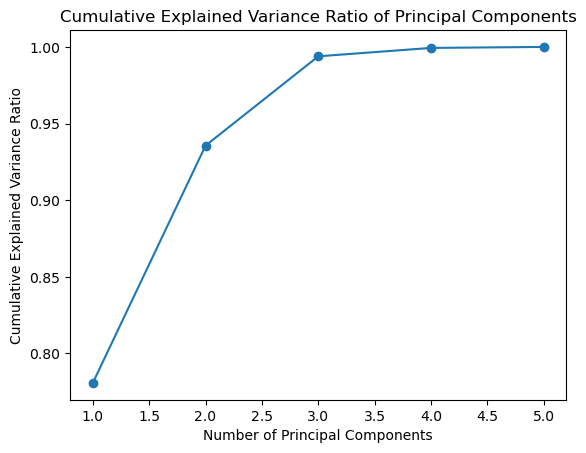

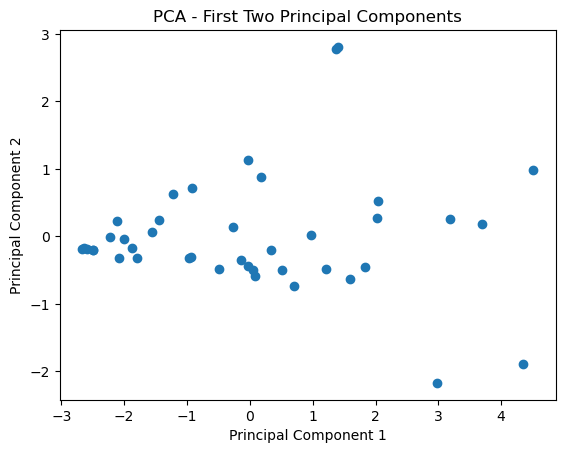

In [34]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Your genetic data
data = {
    'rsID': ['rs2231142', 'rs4961', 'rs1042713', 'rs7412', 'rs4673993', 'rs71647871', 'rs78769542', 'rs16969968', 'rs12777823', 'rs3745274',
             'rs2242480', 'rs2108622', 'rs1801160', 'rs3918290', 'rs17376848', 'rs1801159', 'rs56038477', 'rs2297595', 'rs1801265', 'rs7557402',
             'rs6025', 'rs396991', 'rs11881222', 'rs8099917', 'rs12979860', 'rs1127354', 'rs7270101', 'rs20455', 'rs1801133', 'rs116855232',
             'rs3812718', 'rs1051266', 'rs4149056', 'rs10929302', 'rs7294', 'rs2359612', 'rs8050894', 'rs9934438', 'rs2884737', 'rs3788853', 'rs25487'],
    'Alt_Freq_MAF_K&H': [0.102678571, 0.194399351, 0.373782468, 0.034902597, 0.430194805, 0.003652597, 0.003246753, 0.172077922, 0.36525974, 0.27637987,
                        0.32711039, 0.421266234, 0.043425325, 0.002435065, 0.024756494, 0.03612013, 0.011769481, 0.064935065, 0.123782468, 0.262987013,
                        0.00974026, 0.288961039, 0.193181818, 0.124594156, 0.206980519, 0.092938312, 0.017451299, 0.419237013, 0.095779221, 0.056006494,
                        0.561688312, 0.321022727, 0.051948052, 0.288961039, 0.741477273, 0.600649351, 0.124594156, 0.141233766, 0.068587662, 0.185470779, 0.462662338],
    'Global': [0.1119, 0.1984, 0.3883, 0.07424, 0.3195, 0.01176, 0.0003074, 0.3016, 0.1905, 0.2564,
               0.1533, 0.2875, 0.04675, 0.005061, 0.04658, 0.1947, 0.01878, 0.0895, 0.2262, 0.4691,
               0.02143, 0.3196, 0.2807, 0.1563, 0.3104, 0.07505, 0.1155, 0.3863, 0.3182, 0.01174,
               0.5341, 0.5561, 0.1423, 0.2996, 0.3914, 0.6494, 0.3913, 0.374, 0.2273, 0.2179, 0.6575],
    'East_Asian': [0.2982, 0.508, 0.5276, 0.0605, 0.2617, 0.00006684, 0.0001561, 0.02676, 0.3119, 0.1905,
                   0.2521, 0.2667, 0.01862, 0.0, 0.1298, 0.2694, 0.0001338, 0.0177, 0.05394, 0.1594,
                   0.00006689, 0.3036, 0.07868, 0.06539, 0.06687, 0.1553, 0.0002674, 0.4766, 0.3484, 0.1033,
                   0.5545, 0.4535, 0.1373, 0.1227, 0.09645, 0.108, 0.9034, 0.9021, 0.0006046, 0.2406, 0.7404],
    'European_non_Finnish': [0.1109, 0.1989, 0.3652, 0.0783, 0.328, 0.01297, 0.00002289, 0.3354, 0.1513, 0.2408,
                             0.09031, 0.2978, 0.045, 0.004832, 0.04527, 0.1995, 0.02208, 0.09381, 0.219, 0.5106,
                             0.02472, 0.3203, 0.286, 0.1947, 0.2839, 0.0737, 0.135, 0.3569, 0.3371, 0.00255,
                             0.55, 0.5681, 0.1528, 0.2892, 0.3783, 0.6217, 0.3837, 0.3784, 0.2586, 0.2086, 0.6379],
    'South_Asian': [0.09018, 0.175, 0.4483, 0.04164, 0.4725, 0.006593, 0.004678, 0.2376, 0.3345, 0.3869,
                    0.321, 0.3903, 0.09625, 0.003996, 0.03483, 0.09569, 0.01728, 0.08913, 0.2525, 0.4098,
                    0.01395, 0.3379, 0.2207, 0.1531, 0.2139, 0.122, 0.03048, 0.4291, 0.1489, 0.06474,
                    0.5504, 0.5904, 0.04709, 0.386, 0.6877, 0.8212, 0.1931, 0.1862, 0.09817, 0.2022, 0.6476],
    'African_African_American': [0.02677, 0.07598, 0.4935, 0.1056, 0.1208, 0.002414, 0.0002002, 0.05608, 0.2496, 0.3771,
                                  0.7415, 0.09773, 0.02498, 0.0004799, 0.02006, 0.1568, 0.002867, 0.03331, 0.4078, 0.2701,
                                  0.003759, 0.3322, 0.3261, 0.06834, 0.6031, 0.04378, 0.07293, 0.8039, 0.1094, 0.001095,
                                  0.3458, 0.3823, 0.03111, 0.3021, 0.461, 0.7917, 0.2673, 0.09679, 0.04376, 0.2381, 0.8545]
}

df = pd.DataFrame(data)

# Extract numeric columns for PCA
numeric_columns = df.columns[1:-1]

# Standardize the data
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(df[numeric_columns])

# Visualize the explained variance ratio
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.show()

# Visualize the first two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.show()


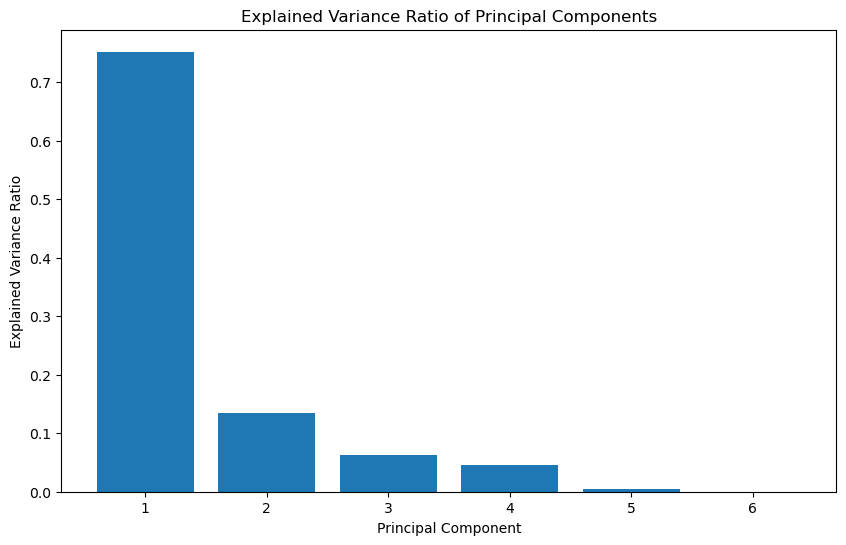

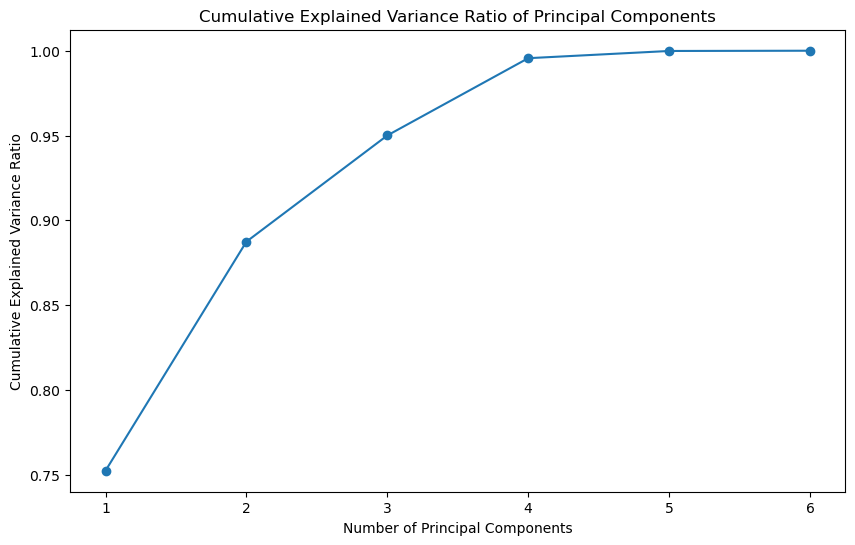

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read the data into a pandas DataFrame
data = {
    'rsID': ['rs2231142', 'rs4961', 'rs1042713', 'rs7412', 'rs4673993', 'rs71647871', 'rs78769542', 'rs16969968', 'rs12777823', 'rs3745274',
             'rs2242480', 'rs2108622', 'rs1801160', 'rs3918290', 'rs17376848', 'rs1801159', 'rs56038477', 'rs2297595', 'rs1801265', 'rs7557402',
             'rs6025', 'rs396991', 'rs11881222', 'rs8099917', 'rs12979860', 'rs1127354', 'rs7270101', 'rs20455', 'rs1801133', 'rs116855232',
             'rs3812718', 'rs1051266', 'rs4149056', 'rs10929302', 'rs7294', 'rs2359612', 'rs8050894', 'rs9934438', 'rs2884737', 'rs3788853', 'rs25487'],
    'Alt_Freq_MAF_K&H': [0.102678571, 0.194399351, 0.373782468, 0.034902597, 0.430194805, 0.003652597, 0.003246753, 0.172077922, 0.36525974, 0.27637987,
                        0.32711039, 0.421266234, 0.043425325, 0.002435065, 0.024756494, 0.03612013, 0.011769481, 0.064935065, 0.123782468, 0.262987013,
                        0.00974026, 0.288961039, 0.193181818, 0.124594156, 0.206980519, 0.092938312, 0.017451299, 0.419237013, 0.095779221, 0.056006494,
                        0.561688312, 0.321022727, 0.051948052, 0.288961039, 0.741477273, 0.600649351, 0.124594156, 0.141233766, 0.068587662, 0.185470779, 0.462662338],
    'Global': [0.1119, 0.1984, 0.3883, 0.07424, 0.3195, 0.01176, 0.0003074, 0.3016, 0.1905, 0.2564,
               0.1533, 0.2875, 0.04675, 0.005061, 0.04658, 0.1947, 0.01878, 0.0895, 0.2262, 0.4691,
               0.02143, 0.3196, 0.2807, 0.1563, 0.3104, 0.07505, 0.1155, 0.3863, 0.3182, 0.01174,
               0.5341, 0.5561, 0.1423, 0.2996, 0.3914, 0.6494, 0.3913, 0.374, 0.2273, 0.2179, 0.6575],
    'East_Asian': [0.2982, 0.508, 0.5276, 0.0605, 0.2617, 0.00006684, 0.0001561, 0.02676, 0.3119, 0.1905,
                   0.2521, 0.2667, 0.01862, 0.0, 0.1298, 0.2694, 0.0001338, 0.0177, 0.05394, 0.1594,
                   0.00006689, 0.3036, 0.07868, 0.06539, 0.06687, 0.1553, 0.0002674, 0.4766, 0.3484, 0.1033,
                   0.5545, 0.4535, 0.1373, 0.1227, 0.09645, 0.108, 0.9034, 0.9021, 0.0006046, 0.2406, 0.7404],
    'European_non_Finnish': [0.1109, 0.1989, 0.3652, 0.0783, 0.328, 0.01297, 0.00002289, 0.3354, 0.1513, 0.2408,
                             0.09031, 0.2978, 0.045, 0.004832, 0.04527, 0.1995, 0.02208, 0.09381, 0.219, 0.5106,
                             0.02472, 0.3203, 0.286, 0.1947, 0.2839, 0.0737, 0.135, 0.3569, 0.3371, 0.00255,
                             0.55, 0.5681, 0.1528, 0.2892, 0.3783, 0.6217, 0.3837, 0.3784, 0.2586, 0.2086, 0.6379],
    'South_Asian': [0.09018, 0.175, 0.4483, 0.04164, 0.4725, 0.006593, 0.004678, 0.2376, 0.3345, 0.3869,
                    0.321, 0.3903, 0.09625, 0.003996, 0.03483, 0.09569, 0.01728, 0.08913, 0.2525, 0.4098,
                    0.01395, 0.3379, 0.2207, 0.1531, 0.2139, 0.122, 0.03048, 0.4291, 0.1489, 0.06474,
                    0.5504, 0.5904, 0.04709, 0.386, 0.6877, 0.8212, 0.1931, 0.1862, 0.09817, 0.2022, 0.6476],
    'African_African_American': [0.02677, 0.07598, 0.4935, 0.1056, 0.1208, 0.002414, 0.0002002, 0.05608, 0.2496, 0.3771,
                                  0.7415, 0.09773, 0.02498, 0.0004799, 0.02006, 0.1568, 0.002867, 0.03331, 0.4078, 0.2701,
                                  0.003759, 0.3322, 0.3261, 0.06834, 0.6031, 0.04378, 0.07293, 0.8039, 0.1094, 0.001095,
                                  0.3458, 0.3823, 0.03111, 0.3021, 0.461, 0.7917, 0.2673, 0.09679, 0.04376, 0.2381, 0.8545],
}

df = pd.DataFrame(data)

# Extract numeric columns for PCA
numeric_columns = df.columns[1:]

# Standardize the data
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(df[numeric_columns])

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(len(numeric_columns))])
pc_df['rsID'] = df['rsID']

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(numeric_columns) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(numeric_columns) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.show()

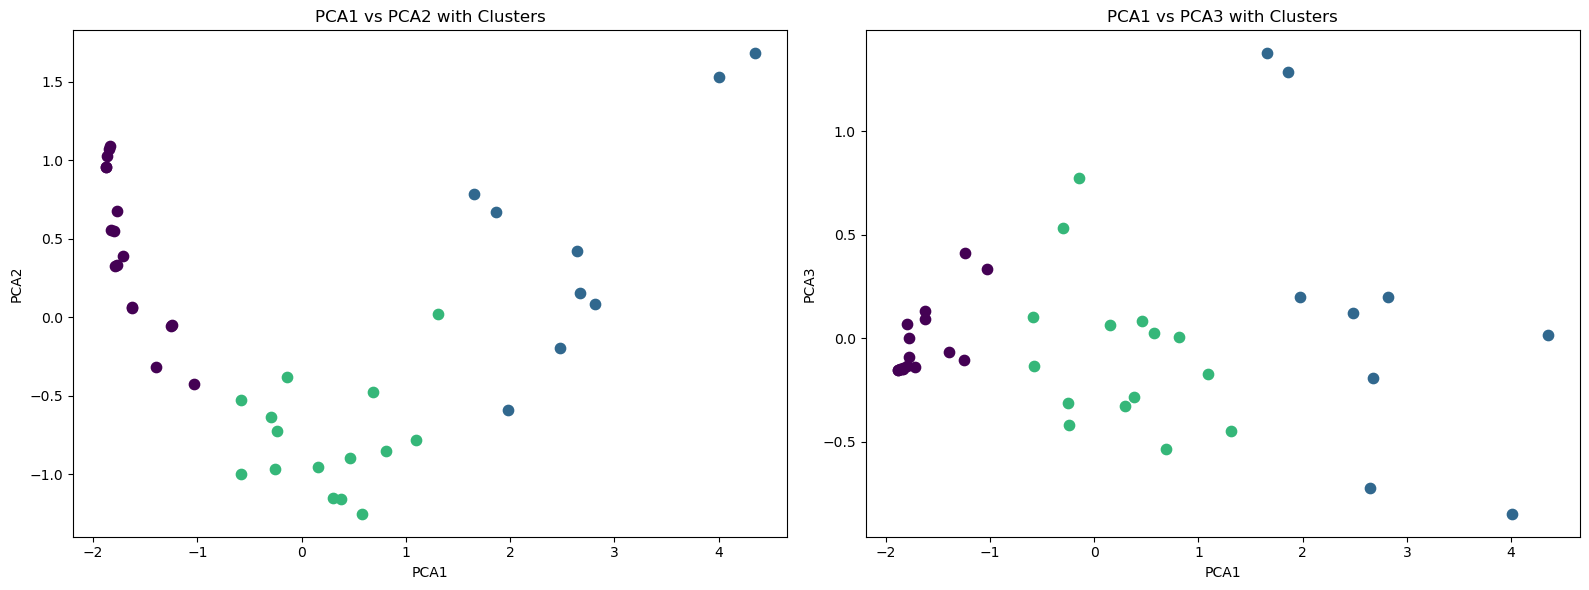

In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

# Extract rsID and MAF columns
rsIDs = df['rsID']
maf_columns = ['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']
df_maf = df[maf_columns]

# Calculate pairwise genetic distances
genetic_distances = pairwise_distances(df_maf, metric='euclidean')

# Perform PCA on the distance matrix
pca = PCA(n_components=3)
pca_result = pca.fit_transform(genetic_distances)

# Apply KMeans clustering on PCA results
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(pca_result)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cluster_assignments  # Add the cluster assignments to the DataFrame

# Create a color map for clusters
color_map = {i: plt.cm.get_cmap('viridis')(i / num_clusters) for i in range(num_clusters)}

# Visualize PCA results with cluster colors
fig = plt.figure(figsize=(16, 6))

# Plot PCA1 against PCA2 with cluster colors
ax1 = fig.add_subplot(121)
for i, rsID in enumerate(rsIDs):
    label_color = color_map[pca_df.loc[i, 'Cluster']]
    ax1.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], s=55, color=label_color)

ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_title('PCA1 vs PCA2 with Clusters')

# Plot PCA1 against PCA3 with cluster colors
ax2 = fig.add_subplot(122)
for i, rsID in enumerate(rsIDs):
    label_color = color_map[pca_df.loc[i, 'Cluster']]
    ax2.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC3'], s=55, color=label_color)

ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA3')
ax2.set_title('PCA1 vs PCA3 with Clusters')

plt.tight_layout()
plt.show()

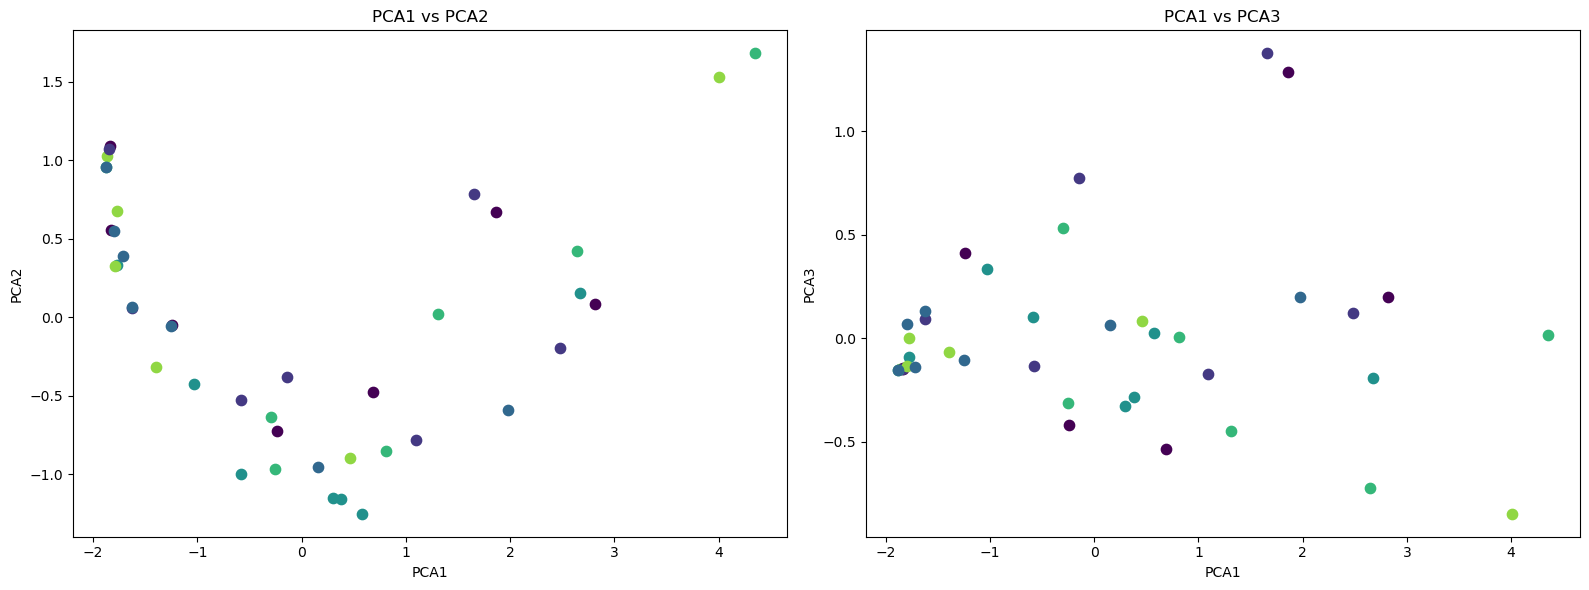

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Extract rsID and MAF columns
rsIDs = df['rsID']
maf_columns = ['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']
df_maf = df[maf_columns]

# Calculate pairwise genetic distances
genetic_distances = pairwise_distances(df_maf, metric='euclidean')

# Perform PCA on the distance matrix
pca = PCA(n_components=3)
pca_result = pca.fit_transform(genetic_distances)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Create a color map for MAF columns
color_map = {column: plt.cm.get_cmap('viridis')(i / len(maf_columns)) for i, column in enumerate(maf_columns)}

# Visualize PCA results
fig = plt.figure(figsize=(16, 6))

# Plot PCA1 against PCA2
ax1 = fig.add_subplot(121)
for i, rsID in enumerate(rsIDs):
    label_color = color_map[maf_columns[i % len(maf_columns)]]  # Corrected color assignment
    ax1.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], s=55, color=label_color)  # Set the size to 50

ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_title('PCA1 vs PCA2')

# Plot PCA1 against PCA3
ax2 = fig.add_subplot(122)
for i, rsID in enumerate(rsIDs):
    label_color = color_map[maf_columns[i % len(maf_columns)]]  # Corrected color assignment
    ax2.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC3'], s=55, color=label_color)  # Set the size to 50

ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA3')
ax2.set_title('PCA1 vs PCA3')

plt.tight_layout()
plt.show()

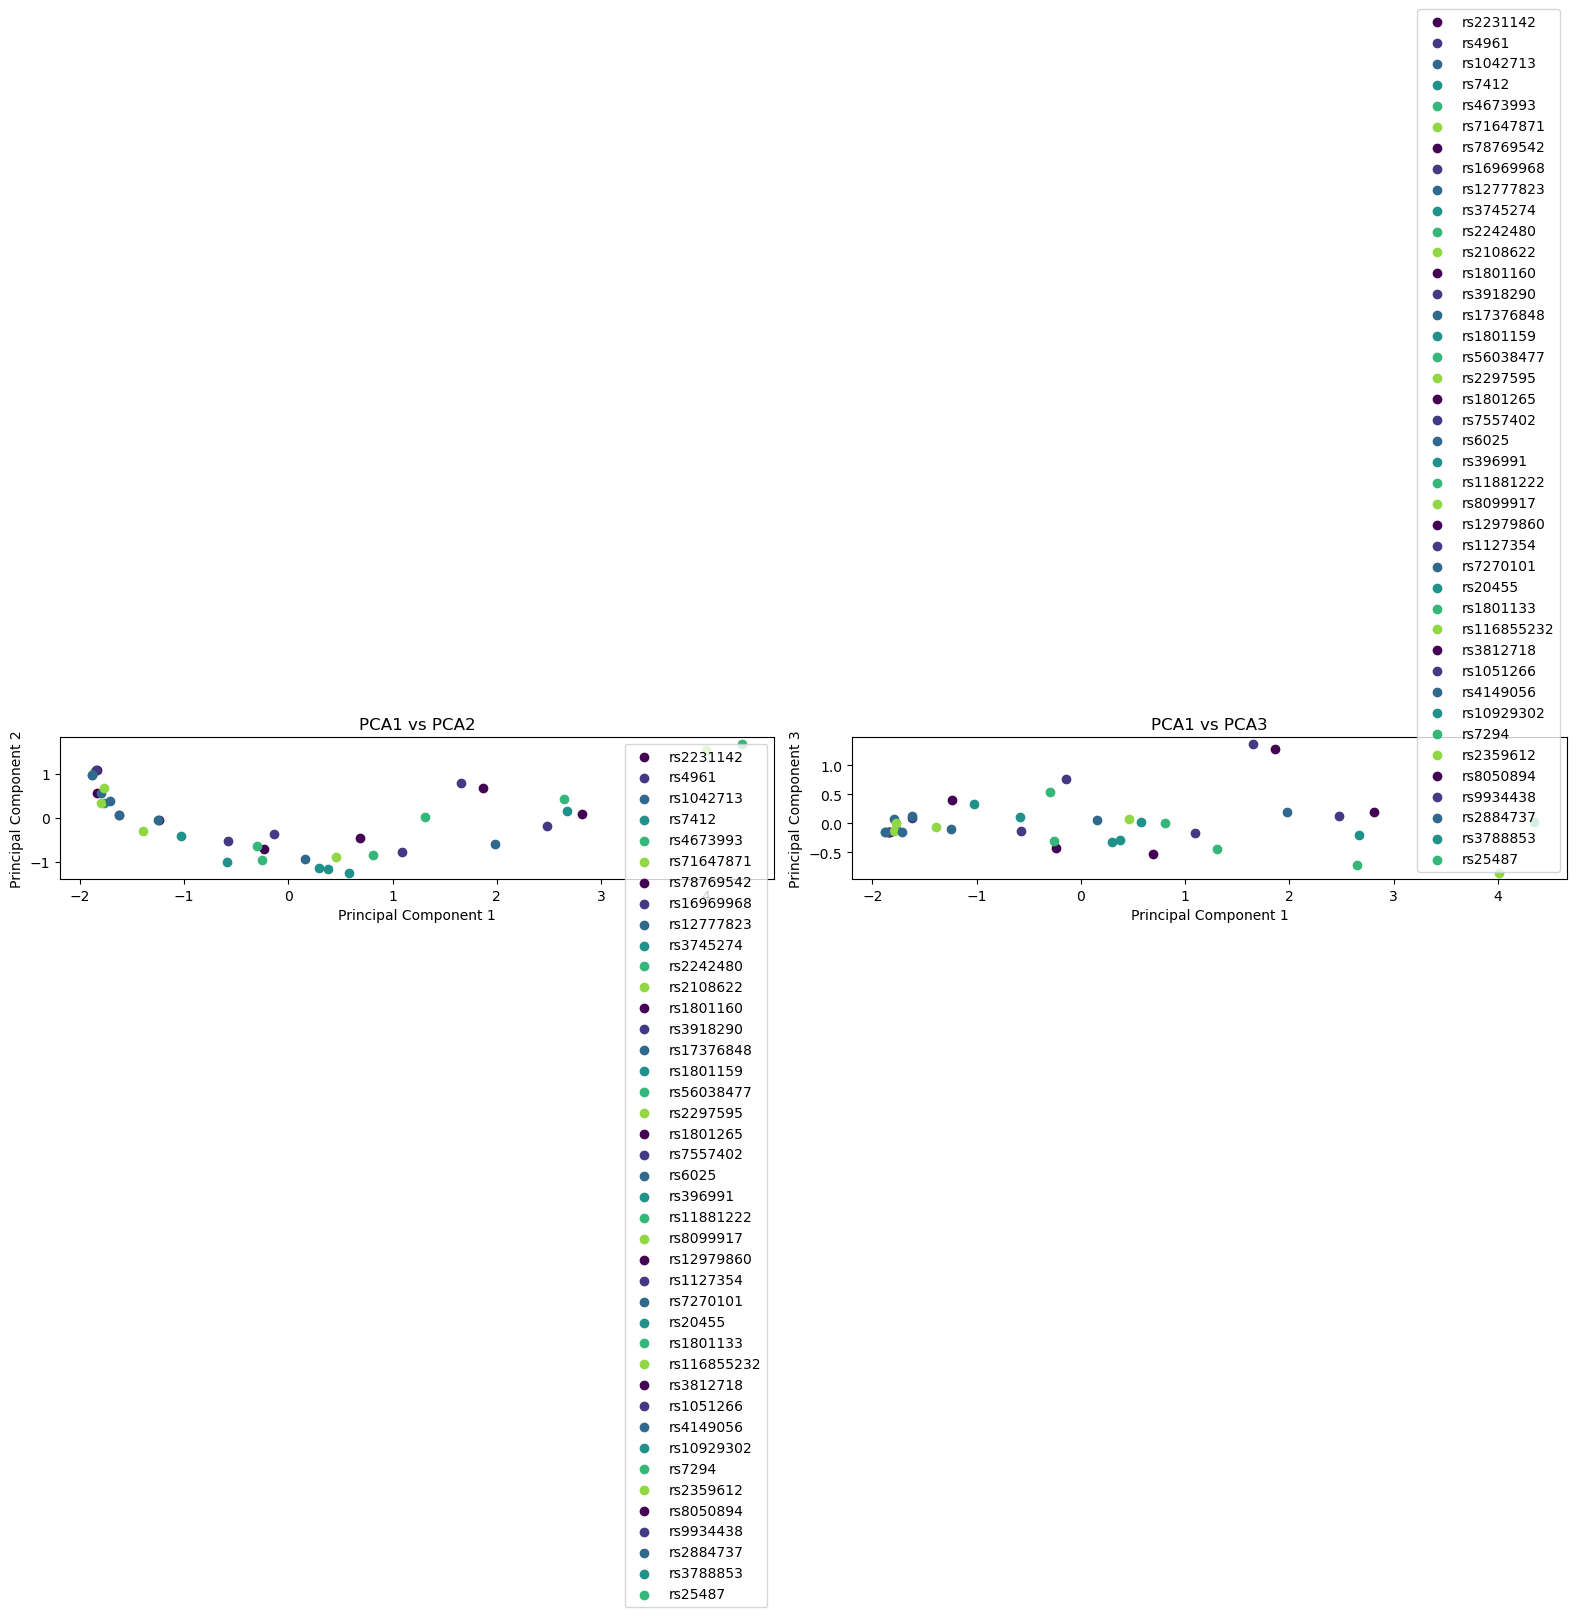

In [28]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Extract rsID and MAF columns
rsIDs = df['rsID']
maf_columns = ['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']
df_maf = df[maf_columns]

# Calculate pairwise genetic distances
genetic_distances = pairwise_distances(df_maf, metric='euclidean')

# Perform PCA on the distance matrix
pca = PCA(n_components=3)
pca_result = pca.fit_transform(genetic_distances)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Create a color map for MAF columns
color_map = {column: plt.cm.get_cmap('viridis')(i / len(maf_columns)) for i, column in enumerate(maf_columns)}

# Visualize PCA results
fig = plt.figure(figsize=(16, 6))

# Plot PCA1 against PCA2
ax1 = fig.add_subplot(121)
for i, rsID in enumerate(rsIDs):
    label_color = color_map[maf_columns[i % len(maf_columns)]]  # Corrected color assignment
    ax1.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], label=rsID, color=label_color)

ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('PCA1 vs PCA2')
ax1.legend()

# Plot PCA1 against PCA3
ax2 = fig.add_subplot(122)
for i, rsID in enumerate(rsIDs):
    label_color = color_map[maf_columns[i % len(maf_columns)]]  # Corrected color assignment
    ax2.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC3'], label=rsID, color=label_color)

ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 3')
ax2.set_title('PCA1 vs PCA3')
ax2.legend()

plt.tight_layout()
plt.show()

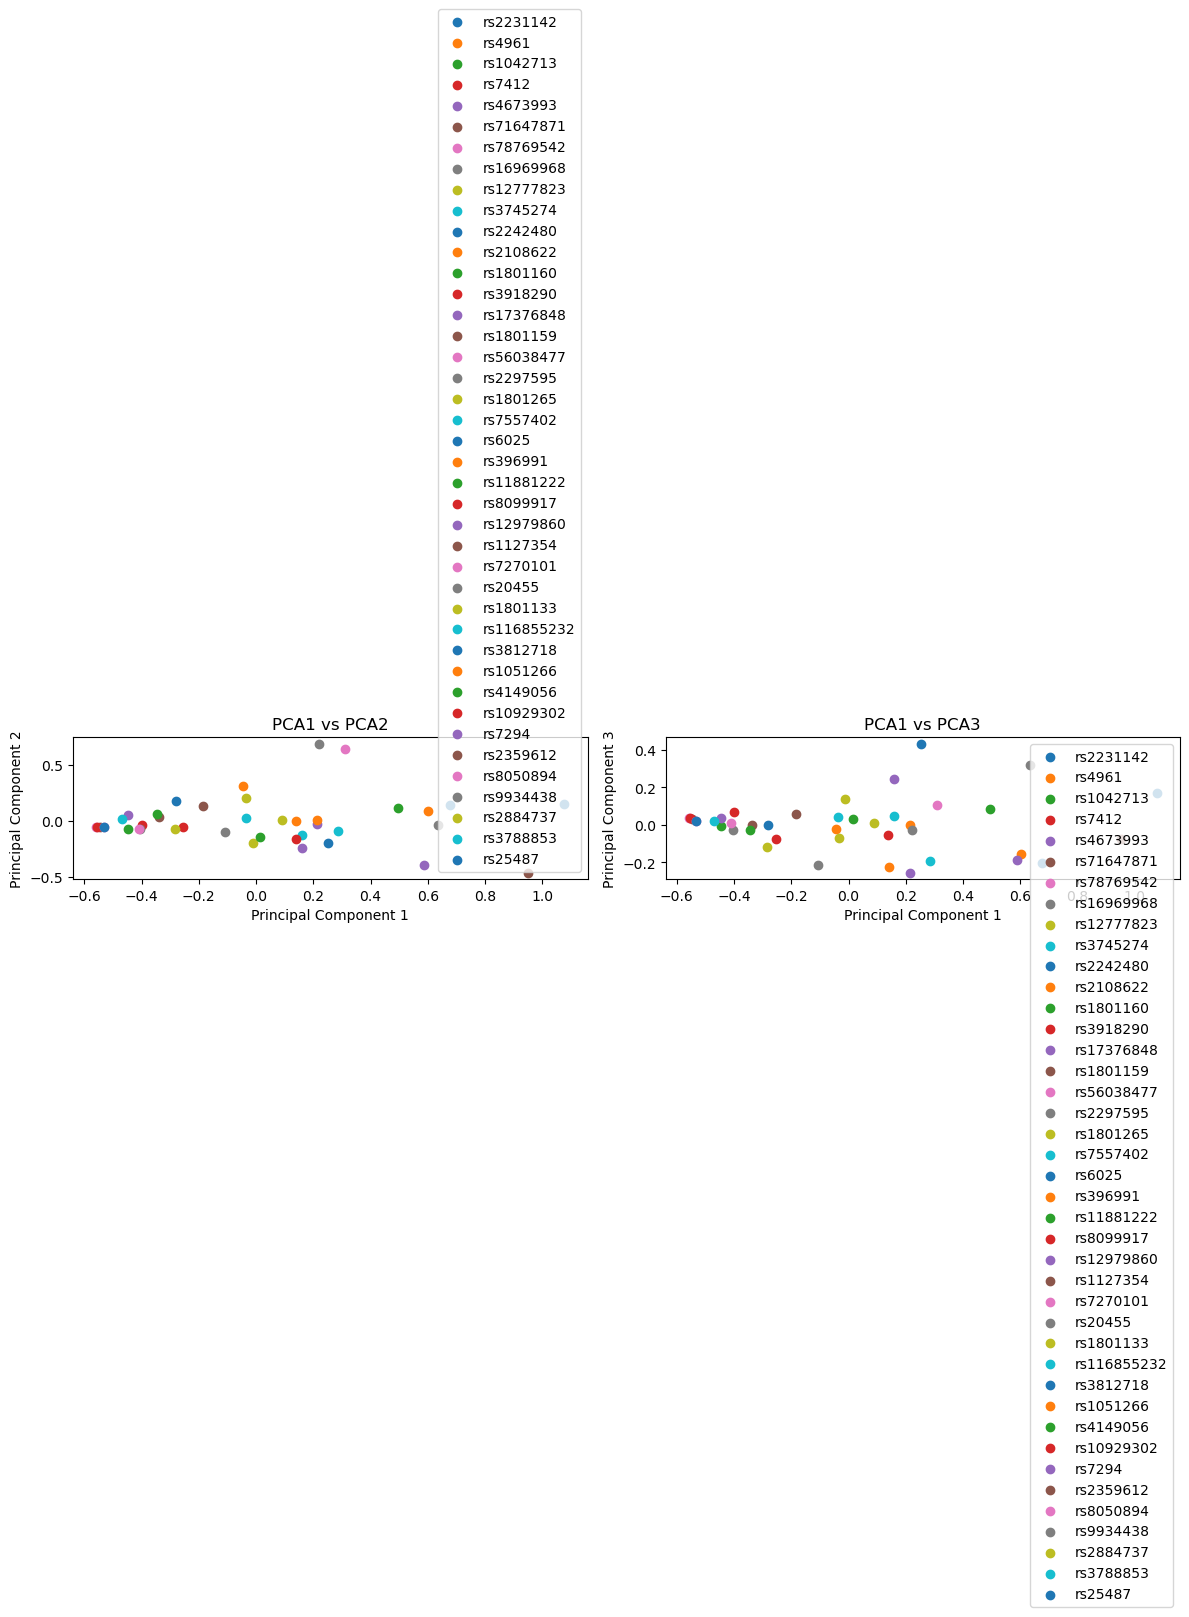

In [16]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Extract rsID and MAF columns
rsIDs = df['rsID']
maf_columns = ['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']
df_maf = df[maf_columns]

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_maf)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Plot PCA1 against PCA2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, rsID in enumerate(rsIDs):
    plt.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], label=rsID)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA1 vs PCA2')
plt.legend()

# Plot PCA1 against PCA3
plt.subplot(1, 2, 2)
for i, rsID in enumerate(rsIDs):
    plt.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC3'], label=rsID)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA1 vs PCA3')
plt.legend()

plt.tight_layout()
plt.show()

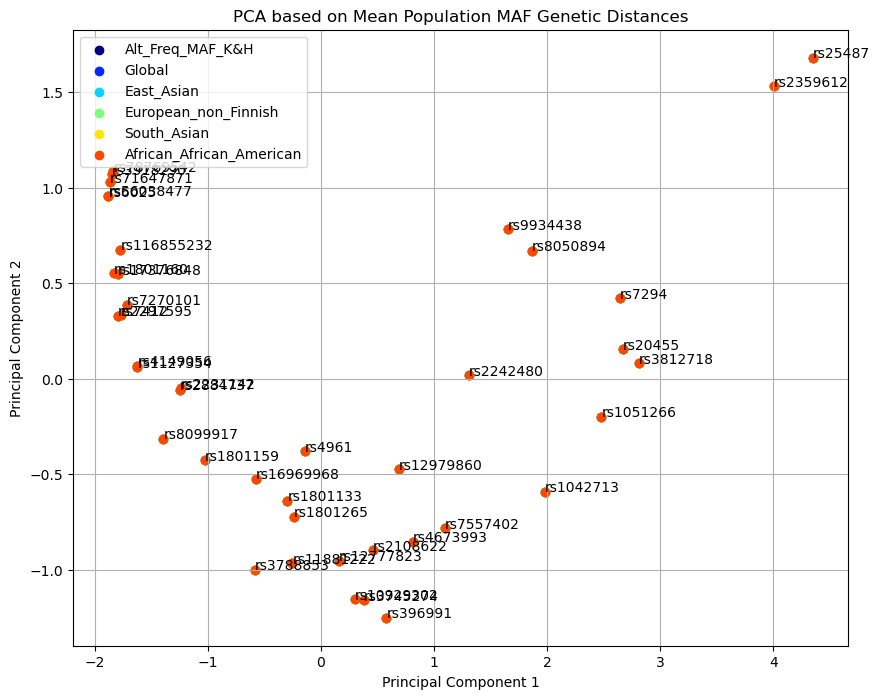

In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Extract rsID and MAF columns
rsIDs = df['rsID']
maf_columns = ['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']
df_maf = df[maf_columns]

# Calculate pairwise genetic distances (Euclidean distance in this example)
genetic_distances = pairwise_distances(df_maf, metric='euclidean')

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(genetic_distances)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Create a color map for columns
color_map = {column: plt.cm.jet(i / float(len(maf_columns))) for i, column in enumerate(maf_columns)}

# Create a scatter plot with different colors for each column
plt.figure(figsize=(10, 8))
for i, column in enumerate(maf_columns):
    indices = df[column].notna()
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], label=column, c=color_map[column])

# Annotate points with rsID
for i, rsID in enumerate(rsIDs):
    plt.annotate(rsID, (pca_df['PC1'][i], pca_df['PC2'][i]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA based on Mean Population MAF Genetic Distances')
plt.legend()
plt.grid(True)
plt.show()

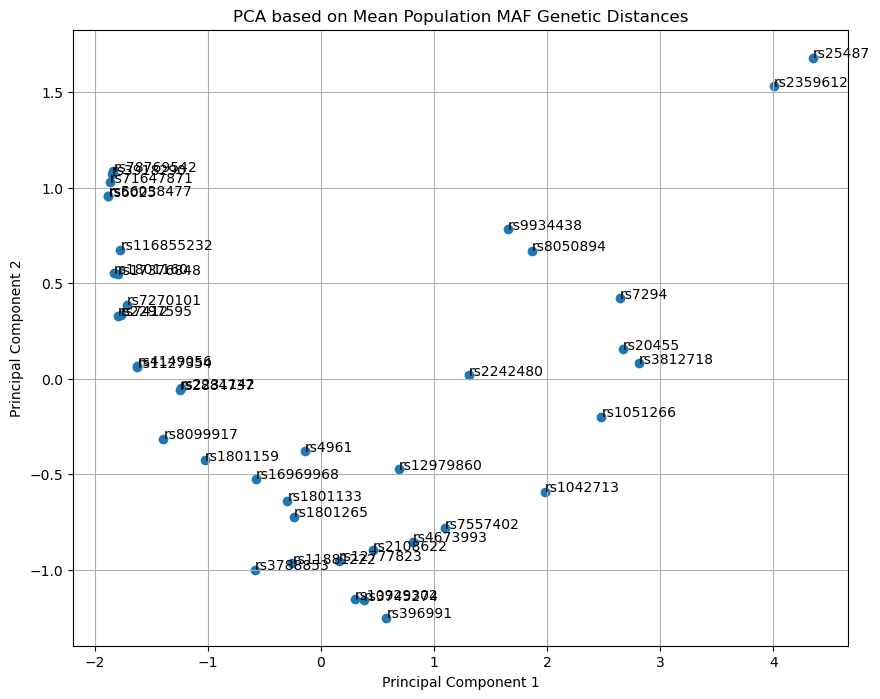

In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Extract rsID and MAF columns
rsIDs = df['rsID']
maf_columns = ['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']
df_maf = df[maf_columns]

# Calculate pairwise genetic distances (Euclidean distance in this example)
genetic_distances = pairwise_distances(df_maf, metric='euclidean')

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(genetic_distances)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualize PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

# Annotate points with rsID
for i, rsID in enumerate(rsIDs):
    plt.annotate(rsID, (pca_df['PC1'][i], pca_df['PC2'][i]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA based on Mean Population MAF Genetic Distances')
plt.grid(True)
plt.show()

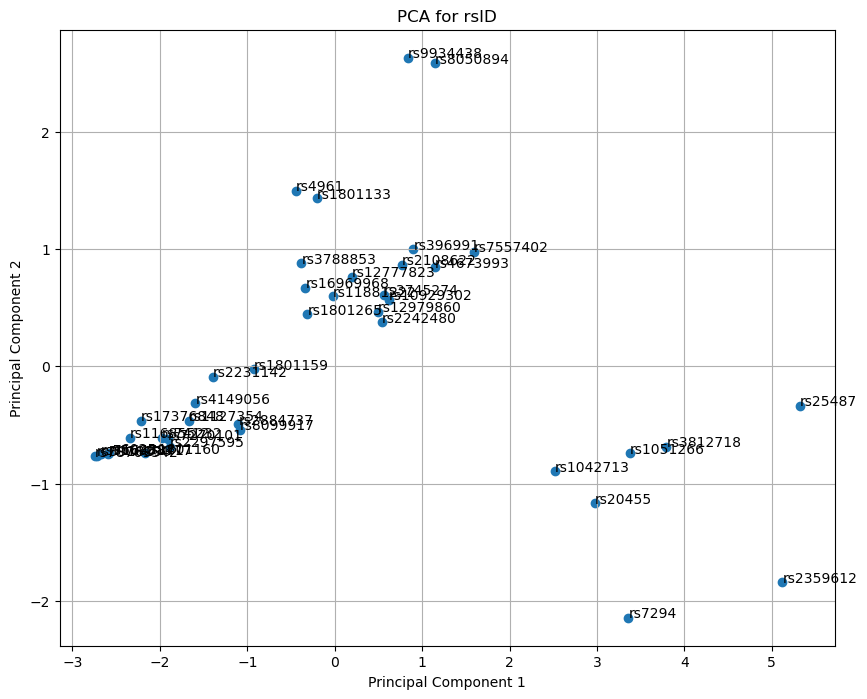

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract rsID for later use in plotting
rsIDs = df['rsID']

# Drop the rsID column for PCA
df_pca = df.drop('rsID', axis=1)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df_pca['PCA1'] = pca_result[:, 0]
df_pca['PCA2'] = pca_result[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'])

# Annotate points with rsID
for i, rsID in enumerate(rsIDs):
    plt.annotate(rsID, (df_pca['PCA1'][i], df_pca['PCA2'][i]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for rsID')
plt.grid(True)
plt.show()

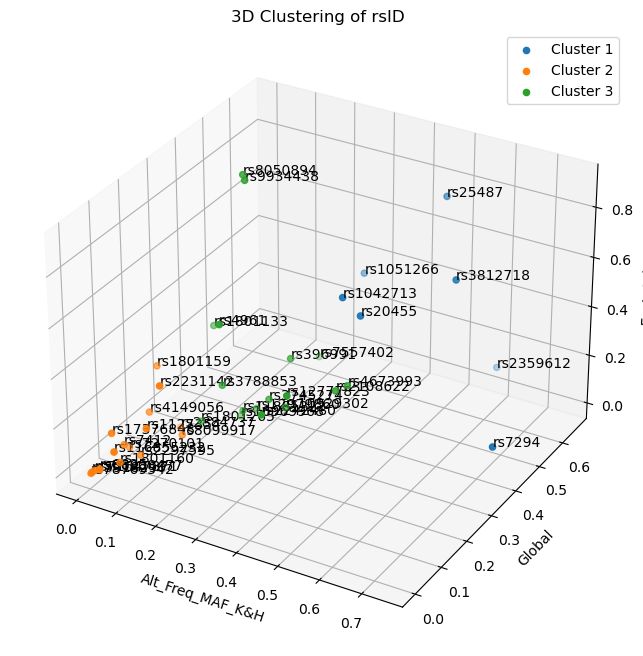

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D scatter plot

# Extract rsID for later use in plotting
rsIDs = df['rsID']

# Select columns for clustering
columns_for_clustering = ['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']
df_clustering = df[columns_for_clustering]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Perform K-means clustering (you can adjust the number of clusters as needed)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters in 3D space
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Alt_Freq_MAF_K&H'], cluster_data['Global'], cluster_data['East_Asian'], label=f'Cluster {cluster + 1}')

# Annotate points with rsID
for i, rsID in enumerate(rsIDs):
    ax.text(df['Alt_Freq_MAF_K&H'][i], df['Global'][i], df['East_Asian'][i], rsID)

ax.set_xlabel('Alt_Freq_MAF_K&H')
ax.set_ylabel('Global')
ax.set_zlabel('East_Asian')
ax.set_title('3D Clustering of rsID')
ax.legend()
plt.show()

In [106]:
df.rename(columns={'Alt_Freq_MAF_K&H':'K&H', 'European_non_Finnish':'European', 'African_African_American':'American'}, inplace=True)
df

rsID       K&H    Global  East_Asian  European  South_Asian  \
0     rs2231142  0.102679  0.111900    0.298200  0.110900     0.090180   
1        rs4961  0.194399  0.198400    0.508000  0.198900     0.175000   
2     rs1042713  0.373782  0.388300    0.527600  0.365200     0.448300   
3        rs7412  0.034903  0.074240    0.060500  0.078300     0.041640   
4     rs4673993  0.430195  0.319500    0.261700  0.328000     0.472500   
5    rs71647871  0.003653  0.011760    0.000067  0.012970     0.006593   
6    rs78769542  0.003247  0.000307    0.000156  0.000023     0.004678   
7    rs16969968  0.172078  0.301600    0.026760  0.335400     0.237600   
8    rs12777823  0.365260  0.190500    0.311900  0.151300     0.334500   
9     rs3745274  0.276380  0.256400    0.190500  0.240800     0.386900   
10    rs2242480  0.327110  0.153300    0.252100  0.090310     0.321000   
11    rs2108622  0.421266  0.287500    0.266700  0.297800     0.390300   
12    rs1801160  0.043425  0.046750    0.018620  0.045000     0.096250   
13    rs3918290  0.002435  0.005061    0.000000  0.004832     0.003996   
14   rs17376848  0.024756  0.046580    0.129800  0.045270     0.034830   
15    rs1801159  0.036120  0.194700    0.269400  0.199500     0.095690   
16   rs56038477  0.011769  0.018780    0.000134  0.022080     0.017280   
17    rs2297595  0.064935  0.089500    0.017700  0.093810     0.089130   
18    rs1801265  0.123782  0.226200    0.053940  0.219000     0.252500   
19    rs7557402  0.262987  0.469100    0.159400  0.510600     0.409800   
20       rs6025  0.009740  0.021430    0.000067  0.024720     0.013950   
21     rs396991  0.288961  0.319600    0.303600  0.320300     0.337900   
22   rs11881222  0.193182  0.280700    0.078680  0.286000     0.220700   
23    rs8099917  0.124594  0.156300    0.065390  0.194700     0.153100   
24   rs12979860  0.206981  0.310400    0.066870  0.283900     0.213900   
25    rs1127354  0.092938  0.075050    0.155300  0.073700     0.122000   
26    rs7270101  0.017451  0.115500    0.000267  0.135000     0.030480   
27      rs20455  0.419237  0.386300    0.476600  0.356900     0.429100   
28    rs1801133  0.095779  0.318200    0.348400  0.337100     0.148900   
29  rs116855232  0.056006  0.011740    0.103300  0.002550     0.064740   
30    rs3812718  0.561688  0.534100    0.554500  0.550000     0.550400   
31    rs1051266  0.321023  0.556100    0.453500  0.568100     0.590400   
32    rs4149056  0.051948  0.142300    0.137300  0.152800     0.047090   
33   rs10929302  0.288961  0.299600    0.122700  0.289200     0.386000   
34       rs7294  0.741477  0.391400    0.096450  0.378300     0.687700   
35    rs2359612  0.600649  0.649400    0.108000  0.621700     0.821200   
36    rs8050894  0.124594  0.391300    0.903400  0.383700     0.193100   
37    rs9934438  0.141234  0.374000    0.902100  0.378400     0.186200   
38    rs2884737  0.068588  0.227300    0.000605  0.258600     0.098170   
39    rs3788853  0.185471  0.217900    0.240600  0.208600     0.202200   
40      rs25487  0.462662  0.657500    0.740400  0.637900     0.647600   

    American  
0   0.026770  
1   0.075980  
2   0.493500  
3   0.105600  
4   0.120800  
5   0.002414  
6   0.000200  
7   0.056080  
8   0.249600  
9   0.377100  
10  0.741500  
11  0.097730  
12  0.024980  
13  0.000480  
14  0.020060  
15  0.156800  
16  0.002867  
17  0.033310  
18  0.407800  
19  0.270100  
20  0.003759  
21  0.332200  
22  0.326100  
23  0.068340  
24  0.603100  
25  0.043780  
26  0.072930  
27  0.803900  
28  0.109400  
29  0.001095  
30  0.345800  
31  0.382300  
32  0.031110  
33  0.302100  
34  0.461000  
35  0.791700  
36  0.267300  
37  0.096790  
38  0.043760  
39  0.238100  
40  0.854500

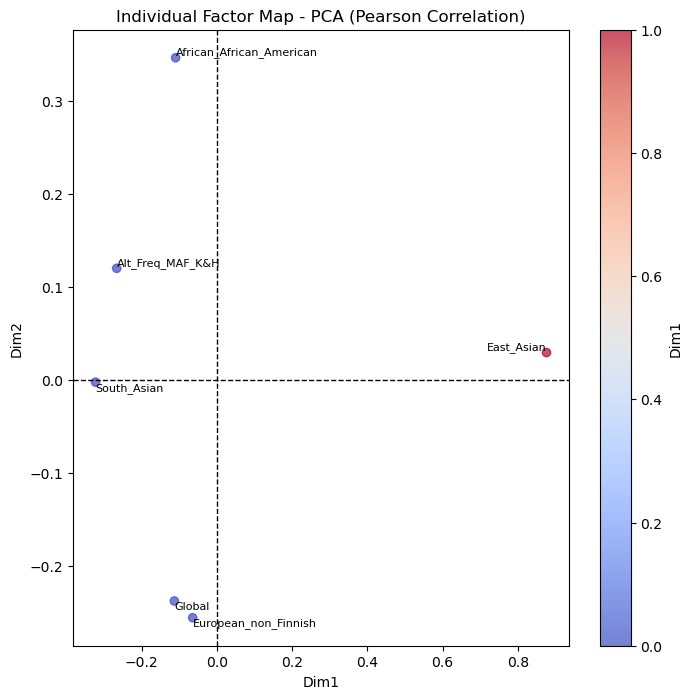

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'df' is your DataFrame
# Calculate the Pearson correlation matrix
corr_matrix = df.iloc[:, 1:].corr()

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(corr_matrix)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['Dim1', 'Dim2'])

# Concatenate column names to the principal components DataFrame
result_df = pd.concat([pd.DataFrame(df.columns[1:], columns=['Column']), pc_df], axis=1)

# Plot the individual factor maps in a four-quadrant graph
plt.figure(figsize=(8, 8))
scatter = plt.scatter(
    result_df['Dim1'],
    result_df['Dim2'],
    c=result_df['Dim1'].apply(lambda x: 1 if x > 0 else 0),  # Color points based on Dim1 quadrant
    cmap='coolwarm',
    alpha=0.7
)

# Add labels for each point
for i, row in result_df.iterrows():
    plt.text(row['Dim1'], row['Dim2'], row['Column'], fontsize=8, ha='right' if row['Dim1'] > 0 else 'left', va='bottom' if row['Dim2'] > 0 else 'top')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Add a vertical line at x=0
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('Individual Factor Map - PCA (Pearson Correlation)')
plt.colorbar(scatter, label='Dim1')
#plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/cluster_PCA_Pearson.png', dpi=450, bbox_inches='tight')
plt.show()

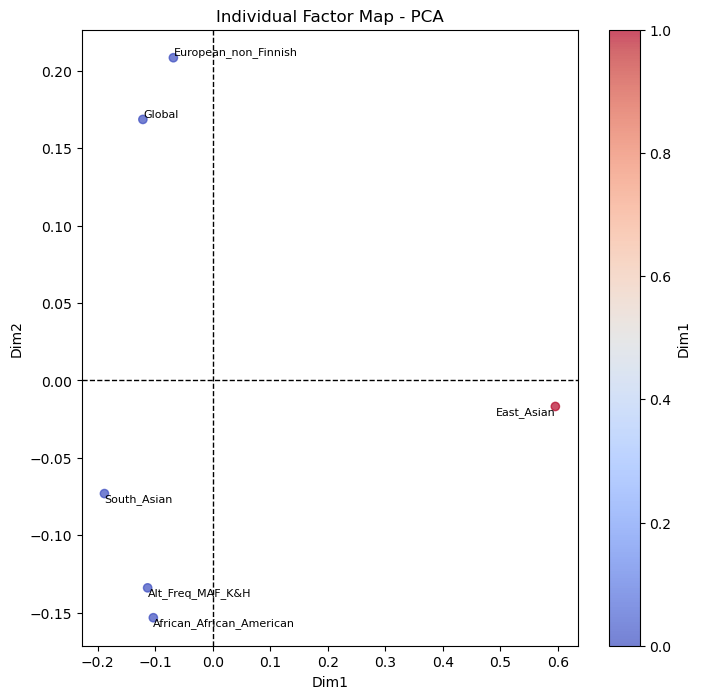

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Calculate the Spearman rank correlation matrix
corr_matrix, _ = spearmanr(df.iloc[:, 1:])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(corr_matrix)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['Dim1', 'Dim2'])

# Concatenate column names to the principal components DataFrame
result_df = pd.concat([pd.DataFrame(df.columns[1:], columns=['Column']), pc_df], axis=1)

# Plot the individual factor maps in a four-quadrant graph
plt.figure(figsize=(8, 8))
scatter = plt.scatter(
    result_df['Dim1'],
    result_df['Dim2'],
    c=result_df['Dim1'].apply(lambda x: 1 if x > 0 else 0),  # Color points based on Dim1 quadrant
    cmap='coolwarm',
    alpha=0.7
)

# Add labels for each point
for i, row in result_df.iterrows():
    plt.text(row['Dim1'], row['Dim2'], row['Column'], fontsize=8, ha='right' if row['Dim1'] > 0 else 'left', va='bottom' if row['Dim2'] > 0 else 'top')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Add a vertical line at x=0
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('Individual Factor Map - PCA')
plt.colorbar(scatter, label='Dim1')
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/cluster_PCA_Aigprx.png', dpi=450, bbox_inches='tight')
plt.show()

           rsID      Dim1      Dim2
0     rs2231142 -0.280587  0.173775
1        rs4961 -0.044449  0.313475
2     rs1042713  0.495135  0.113951
3        rs7412 -0.398485 -0.038852
4     rs4673993  0.213893 -0.027909
5    rs71647871 -0.546132 -0.052034
6    rs78769542 -0.557489 -0.052225
7    rs16969968 -0.108165 -0.100855
8    rs12777823  0.090067  0.004186
9     rs3745274  0.159887 -0.126408
10    rs2242480  0.251693 -0.199200
11    rs2108622  0.139577  0.001806
12    rs1801160 -0.447015 -0.069217
13    rs3918290 -0.554388 -0.051511
14   rs17376848 -0.446458  0.049716
15    rs1801159 -0.184550  0.131406
16   rs56038477 -0.531785 -0.055507
17    rs2297595 -0.403571 -0.070084
18    rs1801265 -0.011390 -0.193316
19    rs7557402  0.285636 -0.092089
20       rs6025 -0.531656 -0.054261
21     rs396991  0.213299  0.005837
22   rs11881222  0.015125 -0.145870
23    rs8099917 -0.254580 -0.057202
24   rs12979860  0.159091 -0.244219
25    rs1127354 -0.338634  0.031899
26    rs7270101 -0.409676 -0

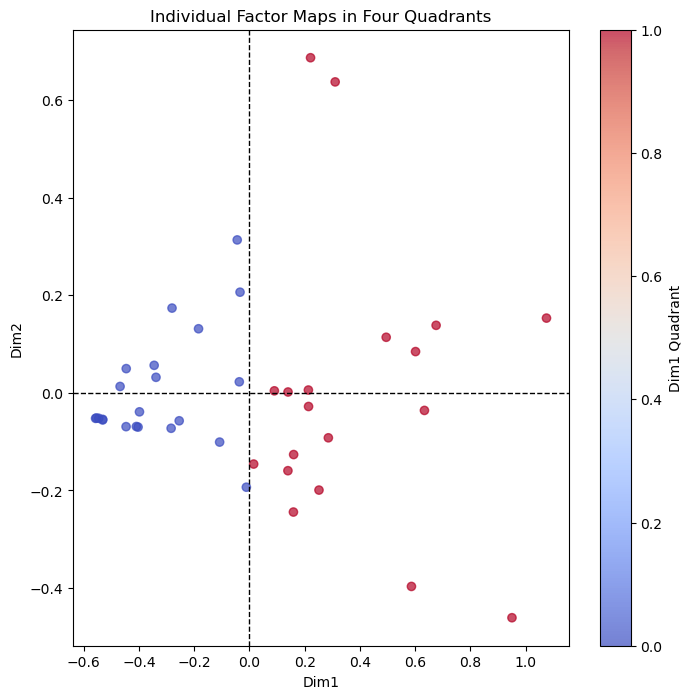

In [88]:
# Extract the numerical data for PCA
X = df.iloc[:, 1:].values

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['Dim1', 'Dim2'])

# Concatenate rsID column to the principal components DataFrame
result_df = pd.concat([df[['rsID']], pc_df], axis=1)

# Print the result
print(result_df)

# Obtain individual factor maps for Dim1 and Dim2
individual_factor_map = pca.transform(X)

# Create a DataFrame with individual factor maps
individual_factor_df = pd.DataFrame(data=individual_factor_map, columns=['Dim1', 'Dim2'])

# Concatenate rsID column to the individual factor map DataFrame
individual_factor_result_df = pd.concat([df[['rsID']], individual_factor_df], axis=1)

# Print the individual factor maps
print(individual_factor_result_df)

# Plot the individual factor maps in a four-quadrant graph
plt.figure(figsize=(8, 8))
plt.scatter(
    individual_factor_result_df['Dim1'],
    individual_factor_result_df['Dim2'],
    c=individual_factor_result_df['Dim1'].apply(lambda x: 1 if x > 0 else 0),  # Color points based on Dim1 quadrant
    cmap='coolwarm',
    alpha=0.7
)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Add a vertical line at x=0
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('Individual Factor Maps in Four Quadrants')
plt.colorbar(label='Dim1 Quadrant')
plt.show()

           rsID      Dim1      Dim2
0     rs2231142 -0.280587  0.173775
1        rs4961 -0.044449  0.313475
2     rs1042713  0.495135  0.113951
3        rs7412 -0.398485 -0.038852
4     rs4673993  0.213893 -0.027909
5    rs71647871 -0.546132 -0.052034
6    rs78769542 -0.557489 -0.052225
7    rs16969968 -0.108165 -0.100855
8    rs12777823  0.090067  0.004186
9     rs3745274  0.159887 -0.126408
10    rs2242480  0.251693 -0.199200
11    rs2108622  0.139577  0.001806
12    rs1801160 -0.447015 -0.069217
13    rs3918290 -0.554388 -0.051511
14   rs17376848 -0.446458  0.049716
15    rs1801159 -0.184550  0.131406
16   rs56038477 -0.531785 -0.055507
17    rs2297595 -0.403571 -0.070084
18    rs1801265 -0.011390 -0.193316
19    rs7557402  0.285636 -0.092089
20       rs6025 -0.531656 -0.054261
21     rs396991  0.213299  0.005837
22   rs11881222  0.015125 -0.145870
23    rs8099917 -0.254580 -0.057202
24   rs12979860  0.159091 -0.244219
25    rs1127354 -0.338634  0.031899
26    rs7270101 -0.409676 -0

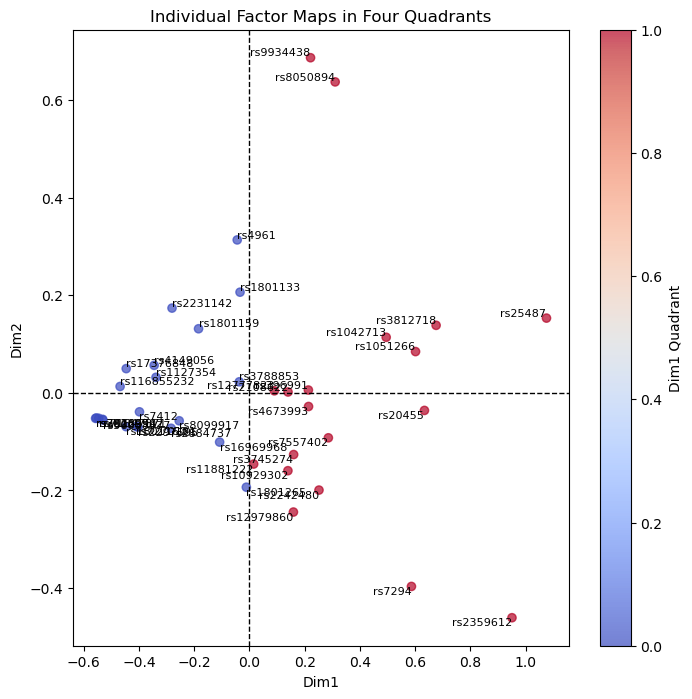

In [89]:
# Extract the numerical data for PCA
X = df.iloc[:, 1:].values

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['Dim1', 'Dim2'])

# Concatenate rsID column to the principal components DataFrame
result_df = pd.concat([df[['rsID']], pc_df], axis=1)

# Print the result
print(result_df)

# Obtain individual factor maps for Dim1 and Dim2
individual_factor_map = pca.transform(X)

# Create a DataFrame with individual factor maps
individual_factor_df = pd.DataFrame(data=individual_factor_map, columns=['Dim1', 'Dim2'])

# Concatenate rsID column to the individual factor map DataFrame
individual_factor_result_df = pd.concat([df[['rsID']], individual_factor_df], axis=1)

# Print the individual factor maps
print(individual_factor_result_df)

# Plot the individual factor maps in a four-quadrant graph
plt.figure(figsize=(8, 8))
plt.scatter(
    individual_factor_result_df['Dim1'],
    individual_factor_result_df['Dim2'],
    c=individual_factor_result_df['Dim1'].apply(lambda x: 1 if x > 0 else 0),  # Color points based on Dim1 quadrant
    cmap='coolwarm',
    alpha=0.7
)

# Add labels for each point
for i, row in individual_factor_result_df.iterrows():
    plt.text(row['Dim1'], row['Dim2'], row['rsID'], fontsize=8, ha='right' if row['Dim1'] > 0 else 'left', va='bottom' if row['Dim2'] > 0 else 'top')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Add a vertical line at x=0
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('Individual Factor Maps in Four Quadrants')
plt.colorbar(label='Dim1 Quadrant')
plt.show()

           rsID      Dim1      Dim2
0     rs2231142 -0.280587  0.173775
1        rs4961 -0.044449  0.313475
2     rs1042713  0.495135  0.113951
3        rs7412 -0.398485 -0.038852
4     rs4673993  0.213893 -0.027909
5    rs71647871 -0.546132 -0.052034
6    rs78769542 -0.557489 -0.052225
7    rs16969968 -0.108165 -0.100855
8    rs12777823  0.090067  0.004186
9     rs3745274  0.159887 -0.126408
10    rs2242480  0.251693 -0.199200
11    rs2108622  0.139577  0.001806
12    rs1801160 -0.447015 -0.069217
13    rs3918290 -0.554388 -0.051511
14   rs17376848 -0.446458  0.049716
15    rs1801159 -0.184550  0.131406
16   rs56038477 -0.531785 -0.055507
17    rs2297595 -0.403571 -0.070084
18    rs1801265 -0.011390 -0.193316
19    rs7557402  0.285636 -0.092089
20       rs6025 -0.531656 -0.054261
21     rs396991  0.213299  0.005837
22   rs11881222  0.015125 -0.145870
23    rs8099917 -0.254580 -0.057202
24   rs12979860  0.159091 -0.244219
25    rs1127354 -0.338634  0.031899
26    rs7270101 -0.409676 -0

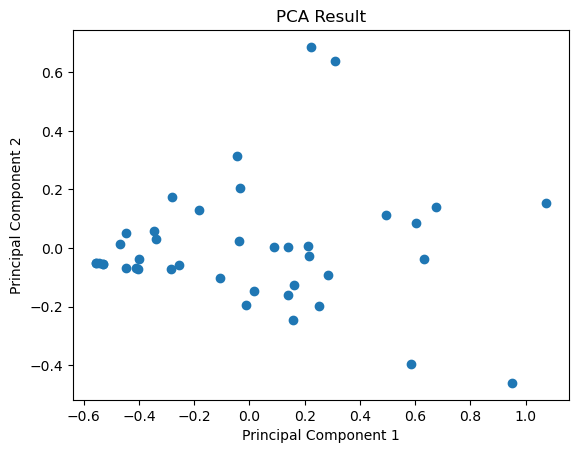

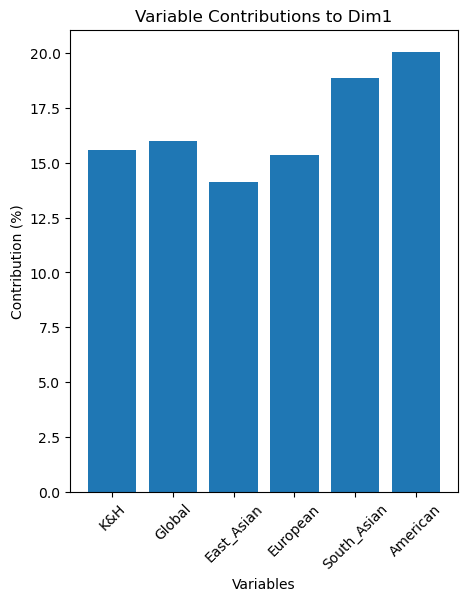

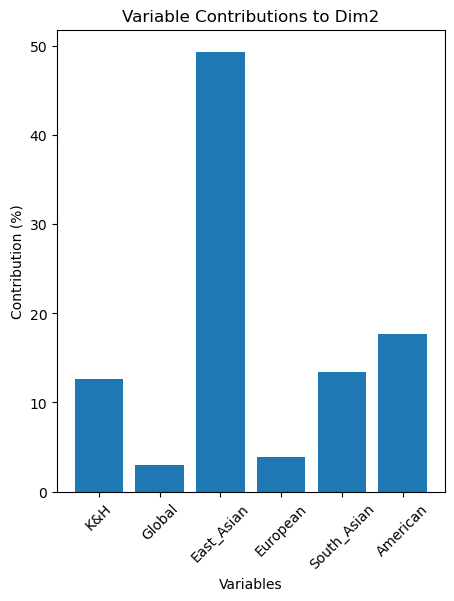

In [107]:
# Extract the numerical data for PCA
X = df.iloc[:, 1:].values

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['Dim1', 'Dim2'])

# Concatenate rsID column to the principal components DataFrame
result_df = pd.concat([df[['rsID']], pc_df], axis=1)

# Print the result
print(result_df)

# Plot the PCA result
plt.scatter(result_df['Dim1'], result_df['Dim2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')

# Plot bar graphs for variable contributions to Dim1
plt.figure(figsize=(5, 6))
contribution_dim1 = abs(pca.components_[0]) / abs(pca.components_[0]).sum() * 100
plt.bar(df.columns[1:], contribution_dim1)
plt.ylabel('Contribution (%)')
plt.xlabel('Variables')
plt.title('Variable Contributions to Dim1')
plt.xticks(rotation=45)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Dim1_PCA_Aigprx.png', dpi=450, bbox_inches='tight')

# Plot bar graphs for variable contributions to Dim2
plt.figure(figsize=(5, 6))
contribution_dim2 = abs(pca.components_[1]) / abs(pca.components_[1]).sum() * 100
plt.bar(df.columns[1:], contribution_dim2)
plt.ylabel('Contribution (%)')
plt.xlabel('Variables')
plt.title('Variable Contributions to Dim2')
plt.xticks(rotation=45)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/Dim2_PCA_Aigprx.png', dpi=450, bbox_inches='tight')

plt.show()

           rsID      Dim1      Dim2
0     rs2231142 -0.280587  0.173775
1        rs4961 -0.044449  0.313475
2     rs1042713  0.495135  0.113951
3        rs7412 -0.398485 -0.038852
4     rs4673993  0.213893 -0.027909
5    rs71647871 -0.546132 -0.052034
6    rs78769542 -0.557489 -0.052225
7    rs16969968 -0.108165 -0.100855
8    rs12777823  0.090067  0.004186
9     rs3745274  0.159887 -0.126408
10    rs2242480  0.251693 -0.199200
11    rs2108622  0.139577  0.001806
12    rs1801160 -0.447015 -0.069217
13    rs3918290 -0.554388 -0.051511
14   rs17376848 -0.446458  0.049716
15    rs1801159 -0.184550  0.131406
16   rs56038477 -0.531785 -0.055507
17    rs2297595 -0.403571 -0.070084
18    rs1801265 -0.011390 -0.193316
19    rs7557402  0.285636 -0.092089
20       rs6025 -0.531656 -0.054261
21     rs396991  0.213299  0.005837
22   rs11881222  0.015125 -0.145870
23    rs8099917 -0.254580 -0.057202
24   rs12979860  0.159091 -0.244219
25    rs1127354 -0.338634  0.031899
26    rs7270101 -0.409676 -0

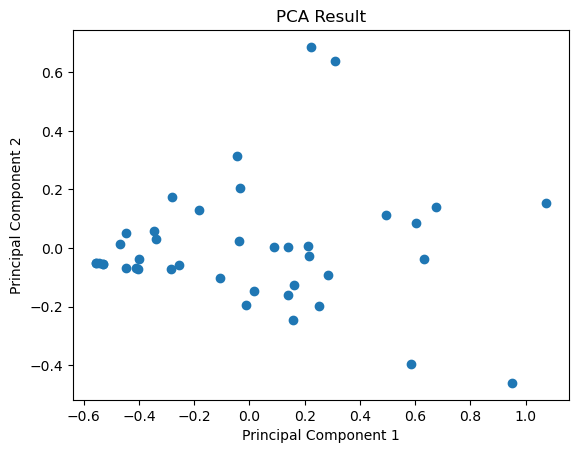

In [75]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract the numerical data for PCA
X = df.iloc[:, 1:].values

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['Dim1', 'Dim2'])

# Concatenate rsID column to the principal components DataFrame
result_df = pd.concat([df[['rsID']], pc_df], axis=1)

# Print the result
print(result_df)

# Plot the PCA result
plt.scatter(result_df['Dim1'], result_df['Dim2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

In [69]:
df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/populations_data_rsID.xlsx', index=False)

In [71]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Assuming 'data' is your DataFrame with the provided information
rsIDs = data['rsID']
attributes = data[['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']]

# Standardize the data
scaler = StandardScaler()
attributes_standardized = scaler.fit_transform(attributes)

# Perform PCA
n_components = 2  # You can choose the number of components based on explained variance
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(attributes_standardized)

# Add the results back to the DataFrame
data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
data_pca['rsID'] = rsIDs

# Find nearest points for each rsID
nearest_points = {}
for i, rsID in enumerate(rsIDs):
    point = data_pca.loc[data_pca['rsID'] == rsID, ['PC1', 'PC2']].values.reshape(1, -1)
    other_points = data_pca.loc[data_pca['rsID'] != rsID, ['PC1', 'PC2']]
    
    distances = cdist(point, other_points)
    nearest_index = distances.argmin()  # Index of the smallest distance
    nearest_rsID = data_pca.loc[data_pca.index[data_pca['rsID'] != rsID][nearest_index], 'rsID']

    nearest_points[rsID] = {'Nearest_rsID': nearest_rsID.values[0], 'Distance': distances.min()}

nearest_points

AttributeError: 'str' object has no attribute 'values'

In [66]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming df is your DataFrame with columns: rsID, Alt_Freq_MAF_K&H, Global, East_Asian, European_non_Finnish, South_Asian, African_African_American

# Extract numerical columns for PCA
numeric_columns = ['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']

# Assuming rsID is not the index
# If 'rsID' is already the index, you can skip the following line
df.set_index('rsID', inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Use k-means clustering to identify clusters
num_clusters = 5  # Adjust this based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Find the nearest population and values for each rsID within its cluster
nearest_data = {}
for rsID in df.index:
    target_data = df.loc[[rsID], numeric_columns].values
    target_pca_result = pca.transform(target_data)
    target_cluster_label = kmeans.predict(target_pca_result)[0]
    
    nearest_population = df[df['Cluster'] == target_cluster_label].index[0]
    nearest_values = df.loc[nearest_population, numeric_columns].values
    
    nearest_data[rsID] = {'Nearest_Population': nearest_population, 'Nearest_Values': nearest_values}

# Create a DataFrame with rsID, nearest population, and nearest values
nearest_data_df = pd.DataFrame(nearest_data).T

# Display or use the results as needed
nearest_data_df

KeyError: "None of ['rsID'] are in the columns"

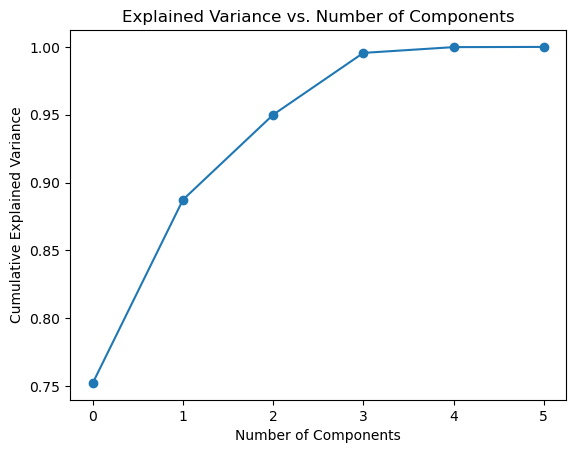

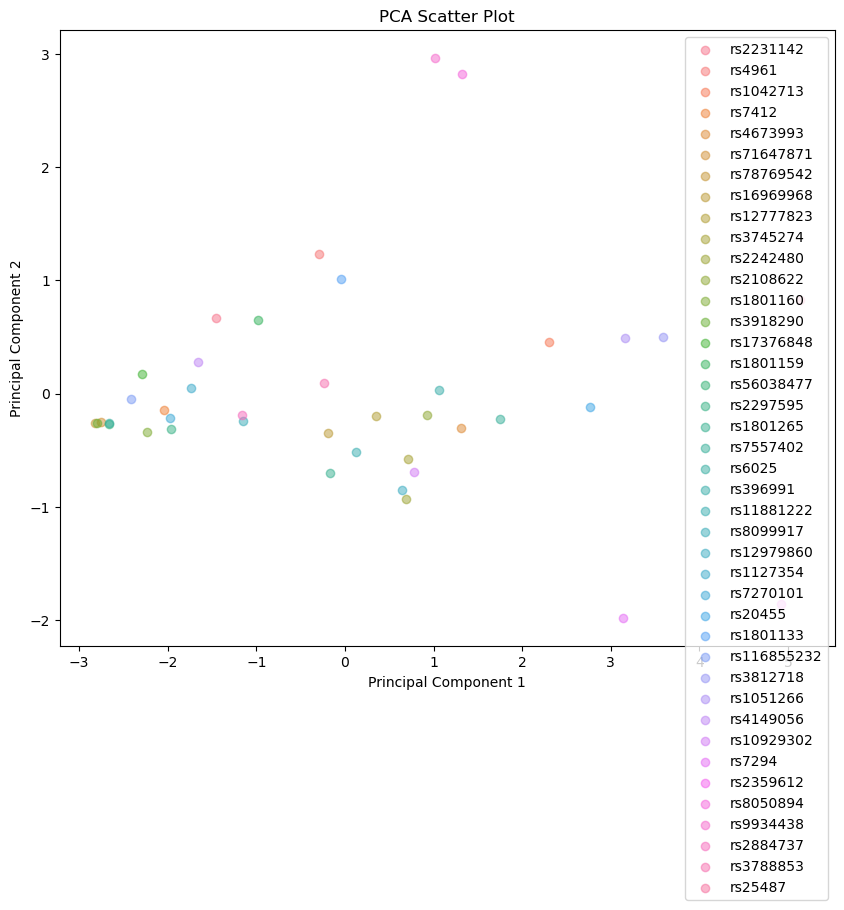

In [61]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns  # For better color palettes

# Assuming df is your DataFrame with columns: rsID, Global, Asian, ESA, SAS, maf

# Extract numerical columns for PCA
numeric_columns = ['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']
data_for_pca = df[numeric_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(data=pca_result, columns=pc_columns)

# Add rsID back to the DataFrame if needed
pca_df['rsID'] = df['rsID']

# Plot explained variance to decide on the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

# Choose the number of components based on the plot or a specific threshold (e.g., 95% explained variance)
num_components = 3  # Adjust this based on your analysis

# Retain the selected number of components
selected_pca_result = pca_result[:, :num_components]

# Create a color palette for the unique rsID values
unique_rsIDs = df['rsID'].unique()
color_palette = sns.color_palette('husl', n_colors=len(unique_rsIDs))

# Plot a 2D scatter plot with different colors for each rsID
plt.figure(figsize=(10, 8))
for i, rsID in enumerate(unique_rsIDs):
    mask = (df['rsID'] == rsID)
    plt.scatter(selected_pca_result[mask, 0], selected_pca_result[mask, 1], label=rsID, color=color_palette[i], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend()
plt.show()


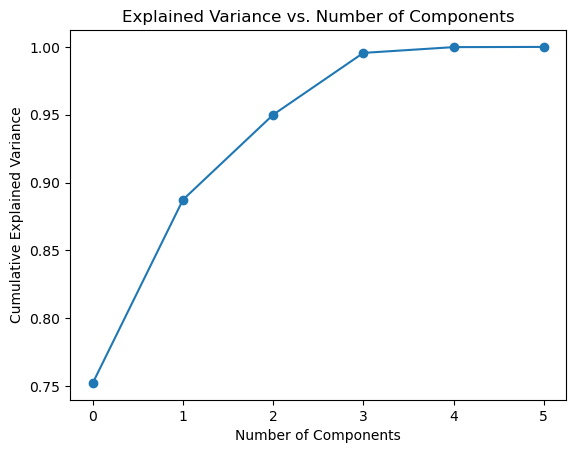

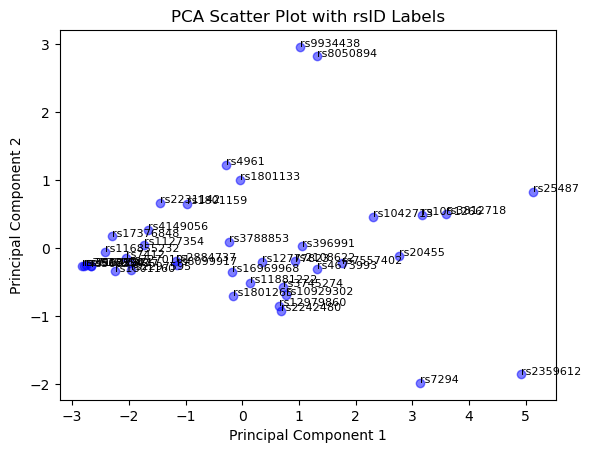

In [60]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns: rsID, Global, Asian, ESA, SAS, maf

# Extract numerical columns for PCA
numeric_columns = ['Alt_Freq_MAF_K&H', 'Global', 'East_Asian', 'European_non_Finnish', 'South_Asian', 'African_African_American']
data_for_pca = df[numeric_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(data=pca_result, columns=pc_columns)

# Add rsID back to the DataFrame if needed
pca_df['rsID'] = df['rsID']

# Plot explained variance to decide on the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

# Choose the number of components based on the plot or a specific threshold (e.g., 95% explained variance)
num_components = 3  # Adjust this based on your analysis

# Retain the selected number of components
selected_pca_result = pca_result[:, :num_components]

# Perform clustering or any further analysis using the selected principal components
# ...

# Visualize the data in 2D with rsID labels
plt.scatter(selected_pca_result[:, 0], selected_pca_result[:, 1], c='b', marker='o', alpha=0.5)

# Add rsID labels to the plot
for i, rsID in enumerate(pca_df['rsID']):
    plt.text(selected_pca_result[i, 0], selected_pca_result[i, 1], rsID, fontsize=8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot with rsID Labels')
plt.show()


In [55]:
import pandas as pd
df = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/All_ONCO_MAF_KDR_ZYGOSITY_Updated.xlsx')
df

Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  Start_Position  \
0            KDR            3791      .     GRCh38       chr4        55081488   
1            KDR            3791      .     GRCh38       chr4        55083717   
2            KDR            3791      .     GRCh38       chr4        55087695   
3            KDR            3791      .     GRCh38       chr4        55087702   
4            KDR            3791      .     GRCh38       chr4        55087704   
...          ...             ...    ...        ...        ...             ...   
4168         KDR            3791      .     GRCh38       chr4        55118975   
4169         KDR            3791      .     GRCh38       chr4        55118982   
4170         KDR            3791      .     GRCh38       chr4        55119042   
4171         KDR            3791      .     GRCh38       chr4        55125564   
4172         KDR            3791      .     GRCh38       chr4        55125612   

      End_Position Strand Variant_Classification Variant_Type  \
0         55081488      +                 Intron          SNP   
1         55083717      +                 Intron          SNP   
2         55087695      +      Missense_Mutation          SNP   
3         55087702      +      Missense_Mutation          SNP   
4         55087704      +      Missense_Mutation          SNP   
...            ...    ...                    ...          ...   
4168      55118975      +                 Intron          SNP   
4169      55118982      +                 Intron          SNP   
4170      55119042      +                 Intron          SNP   
4171      55125564      +                  5'UTR          SNP   
4172      55125612      +                5'Flank          SNP   

     Reference_Allele Tumor_Seq_Allele1 Tumor_Seq_Allele2     dbSNP_RS  \
0                   A                 A                 T        novel   
1                   T                 T                 C        novel   
2                   G                 G                 C        novel   
3                   A                 A                 T  rs768199268   
4                   C                 C                 A          NaN   
...               ...               ...               ...          ...   
4168                A                 A                 G    rs1962460   
4169                A                 A                 G    rs1962459   
4170                C                 C                 G    rs1962458   
4171                T                 T                 C    rs7667298   
4172                T                 T                 A    rs6824124   

      dbSNP_Val_Status Tumor_Sample_Barcode Matched_Norm_Sample_Barcode  \
0                  NaN                TUMOR                      NORMAL   
1                  NaN                TUMOR                      NORMAL   
2                  NaN                TUMOR                      NORMAL   
3                  NaN                TUMOR                      NORMAL   
4                  NaN                TUMOR                      NORMAL   
...                ...                  ...                         ...   
4168               NaN                TUMOR                      NORMAL   
4169               NaN                TUMOR                      NORMAL   
4170               NaN                TUMOR                      NORMAL   
4171               NaN                TUMOR                      NORMAL   
4172               NaN                TUMOR                      NORMAL   

     Match_Norm_Seq_Allele1 Match_Norm_Seq_Allele2  Tumor_Validation_Allele1  \
0                         A                      A                       NaN   
1                         T                      T                       NaN   
2                         G                      G                       NaN   
3                         A                      A                       NaN   
4                         C                      C           

In [56]:
df = df[['Variant', 'Zygosity', 'Sample']]
df

Variant      Zygosity        Sample
0           chr4_55081488_novel_A_T  Heterozygous  KHAPOLGPCSP1
1           chr4_55083717_novel_T_C  Heterozygous  KHAPOLGPCSP1
2           chr4_55087695_novel_G_C  Heterozygous  KHAPOLGPCSP1
3     chr4_55087702_rs768199268_A_T  Heterozygous  KHAPOLGPCSP1
4                chr4_55087704__C_A  Heterozygous  KHAPOLGPCSP1
...                             ...           ...           ...
4168    chr4_55118975_rs1962460_A_G    Homozygous  KHAIGHGP0NC7
4169    chr4_55118982_rs1962459_A_G    Homozygous  KHAIGHGP0NC7
4170    chr4_55119042_rs1962458_C_G    Homozygous  KHAIGHGP0NC7
4171    chr4_55125564_rs7667298_T_C    Homozygous  KHAIGHGP0NC7
4172    chr4_55125612_rs6824124_T_A    Homozygous  KHAIGHGP0NC7

[4173 rows x 3 columns]

In [57]:
df = df.sort_values(by=['Variant', 'Sample'])
df

Variant      Zygosity            Sample
2742         chr4_55073565_novel_A_C  Heterozygous     KHHSPTGPONC27
805          chr4_55073940_novel_G_T  Heterozygous  KHHSPTGPONC83RS1
508          chr4_55073980_novel_C_A  Heterozygous     KHHSPTGPONC91
2588         chr4_55074009_novel_C_T  Heterozygous     KHHSPTGPONC31
2618         chr4_55074009_novel_C_T    Homozygous     KHHSPTGPONC31
...                              ...           ...               ...
3214     chr4_55128894_rs9992737_C_T    Homozygous      KHHSPTGPONC8
3549         chr4_55129068_novel_C_A  Heterozygous     KHAIGHGPONC20
3550         chr4_55129071_novel_A_G  Heterozygous     KHAIGHGPONC20
1081         chr4_55130201_novel_C_A  Heterozygous     KHHSPTGPONC78
1082  chr4_55130205_rs1374765063_T_A  Heterozygous     KHHSPTGPONC78

[4173 rows x 3 columns]

In [58]:
# Identify and remove rows with the same "Variant" and "Sample" but "Zygosity" is Homozygous
mask = (df.duplicated(subset=['Variant', 'Sample'], keep=False) & (df['Zygosity'] == 'Homozygous'))
filtered_df = df[~mask]

# Resetting the index if needed
filtered_df = filtered_df.reset_index(drop=True)

# Displaying the resulting DataFrame
filtered_df

Variant      Zygosity            Sample
0            chr4_55073565_novel_A_C  Heterozygous     KHHSPTGPONC27
1            chr4_55073940_novel_G_T  Heterozygous  KHHSPTGPONC83RS1
2            chr4_55073980_novel_C_A  Heterozygous     KHHSPTGPONC91
3            chr4_55074009_novel_C_T  Heterozygous     KHHSPTGPONC31
4            chr4_55074051_novel_G_C  Heterozygous     KHHSPTGPONC84
...                              ...           ...               ...
3258     chr4_55128894_rs9992737_C_T  Heterozygous      KHHSPTGPONC8
3259         chr4_55129068_novel_C_A  Heterozygous     KHAIGHGPONC20
3260         chr4_55129071_novel_A_G  Heterozygous     KHAIGHGPONC20
3261         chr4_55130201_novel_C_A  Heterozygous     KHHSPTGPONC78
3262  chr4_55130205_rs1374765063_T_A  Heterozygous     KHHSPTGPONC78

[3263 rows x 3 columns]

In [59]:
filtered_df['CHROM'] = filtered_df['Variant'].str.split('_').str[0]
filtered_df['POS'] = filtered_df['Variant'].str.split('_').str[1]
filtered_df['rsID'] = filtered_df['Variant'].str.split('_').str[2]
filtered_df['REF'] = filtered_df['Variant'].str.split('_').str[3]
filtered_df['ALT'] = filtered_df['Variant'].str.split('_').str[4]
filtered_df['Gene'] = "KDR"
filtered_df

Variant      Zygosity            Sample CHROM  \
0            chr4_55073565_novel_A_C  Heterozygous     KHHSPTGPONC27  chr4   
1            chr4_55073940_novel_G_T  Heterozygous  KHHSPTGPONC83RS1  chr4   
2            chr4_55073980_novel_C_A  Heterozygous     KHHSPTGPONC91  chr4   
3            chr4_55074009_novel_C_T  Heterozygous     KHHSPTGPONC31  chr4   
4            chr4_55074051_novel_G_C  Heterozygous     KHHSPTGPONC84  chr4   
...                              ...           ...               ...   ...   
3258     chr4_55128894_rs9992737_C_T  Heterozygous      KHHSPTGPONC8  chr4   
3259         chr4_55129068_novel_C_A  Heterozygous     KHAIGHGPONC20  chr4   
3260         chr4_55129071_novel_A_G  Heterozygous     KHAIGHGPONC20  chr4   
3261         chr4_55130201_novel_C_A  Heterozygous     KHHSPTGPONC78  chr4   
3262  chr4_55130205_rs1374765063_T_A  Heterozygous     KHHSPTGPONC78  chr4   

           POS          rsID REF ALT Gene  
0     55073565         novel   A   C  KDR  
1     55073940         novel   G   T  KDR  
2     55073980         novel   C   A  KDR  
3     55074009         novel   C   T  KDR  
4     55074051         novel   G   C  KDR  
...        ...           ...  ..  ..  ...  
3258  55128894     rs9992737   C   T  KDR  
3259  55129068         novel   C   A  KDR  
3260  55129071         novel   A   G  KDR  
3261  55130201         novel   C   A  KDR  
3262  55130205  rs1374765063   T   A  KDR  

[3263 rows x 9 columns]

In [60]:
agg_dict = {'Sample': lambda x: ','.join(x.unique())}
result_df = filtered_df.groupby(['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'Zygosity', 'Gene']).agg(agg_dict).reset_index()
result_df['Sample_count'] = result_df['Sample'].apply(lambda x: len(x.split(',')))
result_df

CHROM       POS          rsID REF ALT      Zygosity Gene  \
0    chr4  55073565         novel   A   C  Heterozygous  KDR   
1    chr4  55073940         novel   G   T  Heterozygous  KDR   
2    chr4  55073980         novel   C   A  Heterozygous  KDR   
3    chr4  55074009         novel   C   T  Heterozygous  KDR   
4    chr4  55074051         novel   G   C  Heterozygous  KDR   
..    ...       ...           ...  ..  ..           ...  ...   
812  chr4  55128894     rs9992737   C   T  Heterozygous  KDR   
813  chr4  55129068         novel   C   A  Heterozygous  KDR   
814  chr4  55129071         novel   A   G  Heterozygous  KDR   
815  chr4  55130201         novel   C   A  Heterozygous  KDR   
816  chr4  55130205  rs1374765063   T   A  Heterozygous  KDR   

               Sample  Sample_count  
0       KHHSPTGPONC27             1  
1    KHHSPTGPONC83RS1             1  
2       KHHSPTGPONC91             1  
3       KHHSPTGPONC31             1  
4       KHHSPTGPONC84             1  
..                ...           ...  
812      KHHSPTGPONC8             1  
813     KHAIGHGPONC20             1  
814     KHAIGHGPONC20             1  
815     KHHSPTGPONC78             1  
816     KHHSPTGPONC78             1  

[817 rows x 9 columns]

In [61]:
print(result_df['Sample_count'].min())
print(result_df['Sample_count'].max())

1
109


In [62]:
result_df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/New_updated_counts_revised.xlsx', index=False)

In [4]:
df_combined['CHROM'] = df['Variant'].str.split('_').str[0]
df_combined['POS'] = df['Variant'].str.split('_').str[1]
df_combined['rsID'] = df['Variant'].str.split('_').str[2]
df_combined['REF'] = df['Variant'].str.split('_').str[3]
df_combined['ALT'] = df['Variant'].str.split('_').str[4]
df_combined['Gene'] = "KDR"
df_combined

Variant            Sample      Zygosity CHROM  \
0            chr4_55073565_novel_A_C     KHHSPTGPONC27  Heterozygous  chr4   
1            chr4_55073940_novel_G_T  KHHSPTGPONC83RS1  Heterozygous  chr4   
2            chr4_55073980_novel_C_A     KHHSPTGPONC91  Heterozygous  chr4   
3            chr4_55074009_novel_C_T     KHHSPTGPONC31  Heterozygous  chr4   
4            chr4_55074051_novel_G_C     KHHSPTGPONC84  Heterozygous  chr4   
...                              ...               ...           ...   ...   
2474     chr4_55128894_rs9992737_C_T      KHHSPTGPONC8  Heterozygous  chr4   
2475         chr4_55129068_novel_C_A     KHAIGHGPONC20  Heterozygous  chr4   
2476         chr4_55129071_novel_A_G     KHAIGHGPONC20  Heterozygous  chr4   
2477         chr4_55130201_novel_C_A     KHHSPTGPONC78  Heterozygous  chr4   
2478  chr4_55130205_rs1374765063_T_A     KHHSPTGPONC78  Heterozygous  chr4   

           POS         rsID REF ALT Gene  
0     55081488        novel   A   T  KDR  
1     55083717        novel   T   C  KDR  
2     55087695        novel   G   C  KDR  
3     55087702  rs768199268   A   T  KDR  
4     55087704                C   A  KDR  
...        ...          ...  ..  ..  ...  
2474  55088610        novel   A   G  KDR  
2475  55089065    rs1531289   T   C  KDR  
2476  55092073   rs77527870   A   G  KDR  
2477  55095350        novel   C   G  KDR  
2478  55099967        novel   G   A  KDR  

[2479 rows x 9 columns]

In [23]:
agg_dict = {'Sample': lambda x: ','.join(x.unique())}
result_df = df_combined.groupby(['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'Zygosity', 'Gene']).agg(agg_dict).reset_index()
result_df['Sample_count'] = result_df['Sample'].apply(lambda x: len(x.split(',')))
result_df

CHROM       POS          rsID REF ALT      Zygosity Gene  \
0    chr4  55073940         novel   G   T  Heterozygous  KDR   
1    chr4  55073980         novel   C   A  Heterozygous  KDR   
2    chr4  55074051         novel   G   C  Heterozygous  KDR   
3    chr4  55074443   rs982193177   C   A  Heterozygous  KDR   
4    chr4  55074481         novel   C   A  Heterozygous  KDR   
..    ...       ...           ...  ..  ..           ...  ...   
505  chr4  55128741         novel   A   G    Homozygous  KDR   
506  chr4  55128750         novel   C   A  Heterozygous  KDR   
507  chr4  55128750         novel   C   A    Homozygous  KDR   
508  chr4  55130201         novel   C   A  Heterozygous  KDR   
509  chr4  55130205  rs1374765063   T   A  Heterozygous  KDR   

                         Sample  Sample_count  
0                  KHAIGHGP0NC7             1  
1                 KHHSPTGPONC24             1  
2    KHHSPTGPONC7,KHHSPTGPONC12             2  
3                  KHAIGHGPONC6             1  
4                 KHAIGHGPONC17             1  
..                          ...           ...  
505               KHHSPTGPONC76             1  
506               KHHSPTGPONC54             1  
507               KHHSPTGPONC77             1  
508               KHHSPTGPONC30             1  
509               KHHSPTGPONC31             1  

[510 rows x 9 columns]

In [26]:
result_df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Snp_pharm_22_12_2023/New_updated_counts.xlsx', index=False)

In [25]:
print(result_df['Sample_count'].min())
print(result_df['Sample_count'].max())

1
69


In [16]:
df_combined[df_combined['Variant'] == 'chr4_55106807_rs1870377_T_A' ]

Variant         Sample      Zygosity
1301  chr4_55106807_rs1870377_T_A   KHAIGHGP0NC7  Heterozygous
1302  chr4_55106807_rs1870377_T_A  KHAIGHGPONC10  Heterozygous
1303  chr4_55106807_rs1870377_T_A  KHAIGHGPONC11  Heterozygous
1304  chr4_55106807_rs1870377_T_A  KHAIGHGPONC13  Heterozygous
1305  chr4_55106807_rs1870377_T_A  KHAIGHGPONC19  Heterozygous
1306  chr4_55106807_rs1870377_T_A   KHAIGHGPONC6  Heterozygous
1307  chr4_55106807_rs1870377_T_A   KHAPOLGPCSP1  Heterozygous
1308  chr4_55106807_rs1870377_T_A   KHAPOLGPONC2  Heterozygous
1309  chr4_55106807_rs1870377_T_A  KHHSPTGPONC10  Heterozygous
1310  chr4_55106807_rs1870377_T_A  KHHSPTGPONC13  Heterozygous
1311  chr4_55106807_rs1870377_T_A  KHHSPTGPONC17  Heterozygous
1312  chr4_55106807_rs1870377_T_A  KHHSPTGPONC22  Heterozygous
1313  chr4_55106807_rs1870377_T_A  KHHSPTGPONC31  Heterozygous
1314  chr4_55106807_rs1870377_T_A  KHHSPTGPONC32  Heterozygous
1315  chr4_55106807_rs1870377_T_A  KHHSPTGPONC38  Heterozygous
1316  chr4_55106807_rs1870377_T_A  KHHSPTGPONC41  Heterozygous
1317  chr4_55106807_rs1870377_T_A  KHHSPTGPONC42  Heterozygous
1318  chr4_55106807_rs1870377_T_A  KHHSPTGPONC43  Heterozygous
1319  chr4_55106807_rs1870377_T_A   KHHSPTGPONC5  Heterozygous
1320  chr4_55106807_rs1870377_T_A  KHHSPTGPONC52  Heterozygous
1321  chr4_55106807_rs1870377_T_A  KHHSPTGPONC56  Heterozygous
1322  chr4_55106807_rs1870377_T_A  KHHSPTGPONC61  Heterozygous
1323  chr4_55106807_rs1870377_T_A  KHHSPTGPONC64  Heterozygous
1324  chr4_55106807_rs1870377_T_A  KHHSPTGPONC65  Heterozygous
1325  chr4_55106807_rs1870377_T_A  KHHSPTGPONC66  Heterozygous
1326  chr4_55106807_rs1870377_T_A  KHHSPTGPONC69  Heterozygous
1327  chr4_55106807_rs1870377_T_A  KHHSPTGPONC70  Heterozygous
1328  chr4_55106807_rs1870377_T_A  KHHSPTGPONC72  Heterozygous
1329  chr4_55106807_rs1870377_T_A  KHHSPTGPONC73  Heterozygous
1330  chr4_55106807_rs1870377_T_A  KHHSPTGPONC74  Heterozygous
1331  chr4_55106807_rs1870377_T_A  KHHSPTGPONC75  Heterozygous
1332  chr4_55106807_rs1870377_T_A  KHHSPTGPONC85  Heterozygous
1333  chr4_55106807_rs1870377_T_A  KHHSPTGPONC89  Heterozygous
1334  chr4_55106807_rs1870377_T_A  KHHSPTGPONC92  Heterozygous

In [6]:
import pandas as pd

# Assuming df is your DataFrame with columns "Variant", "Zygosity", and "Sample"
# Replace this with your actual DataFrame
data = {'Variant': ['A', 'B', 'A', 'C', 'B'],
        'Zygosity': ['Heterozygous', 'Heterozygous', 'Homozygous', 'Heterozygous', 'Homozygous'],
        'Sample': ['X', 'Y', 'X', 'Z', 'Y']}
df = pd.DataFrame(data)
df

Variant      Zygosity Sample
0       A  Heterozygous      X
1       B  Heterozygous      Y
2       A    Homozygous      X
3       C  Heterozygous      Z
4       B    Homozygous      Y

In [7]:
# Combine rows with duplicate values in "Variant" and "Sample" columns
df_combined = df.groupby(['Variant', 'Sample'], as_index=False)['Zygosity'].agg(lambda x: 'Heterozygous' if 'Heterozygous' in x.values else 'Homozygous')
df_combined

Variant Sample      Zygosity
0       A      X  Heterozygous
1       B      Y  Heterozygous
2       C      Z  Heterozygous